# Performing basic operations

In [1]:
import os as os

In [2]:
# Setting working directory

os.chdir("E:\\Final Project\\SalesForecast (2)\\Sales Forecast")

In [3]:
# List of files in the working firectory

os.listdir()

['.Rhistory',
 'DataDictionary-Sales forecast.xlsx',
 'Sales Forecast Analytics.pdf',
 'Sales_Forecast_Data - Copy.xlsx',
 'Sales_Forecast_Data.xlsx',
 'Sales_Forecast_Data1.csv',
 '~$DataDictionary-Sales forecast.xlsx',
 '~$Sales_Forecast_Data.xlsx']

In [4]:
# To check working directory

os.getcwd()

'E:\\Final Project\\SalesForecast (2)\\Sales Forecast'

# Importing requisite libraries

In [5]:
import warnings
import itertools
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [6]:
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [7]:
# Importing dataset

data_df=pd.read_excel("Sales_Forecast_Data.xlsx")

In [8]:
# Head of the dataset

data_df.head(10)

FIN_YEAR MONTH    STATE            FG DISTRICT  COMPANY    VALUE
0  2014-2015   Nov  Haryana  Insecticides   Rohtak  monous    675.00
1  2014-2015   Nov  Haryana  Insecticides   Rewari  monous     73.71
2  2014-2015   Nov  Haryana  Insecticides  Gurgaon  monous    405.00
3  2014-2015   Nov  Haryana  Insecticides    Mewat  monous   1188.00
4  2014-2015   Nov  Haryana  Insecticides   Palwal  monous   5188.59
5  2014-2015   Nov  Haryana  Insecticides     Jind   kadoo      0.00
6  2014-2015   Nov  Haryana  Insecticides    Sirsa   kadoo      0.00
7  2014-2015   Nov  Haryana  Insecticides    Hisar   kadoo      0.00
8  2014-2015   Nov  Haryana  Insecticides  Bhiwani   kadoo      0.00
9  2014-2015   Nov  Haryana  Insecticides   Rohtak   kadoo      0.00

In [9]:
# Tail of the dataset

data_df.tail(10)

FIN_YEAR MONTH          STATE            FG      DISTRICT  \
230142  2016-2017   Aug  Uttar Pradesh  Bactericides  Kanpur Dehat   
230143  2016-2017   Aug  Uttar Pradesh  Bactericides        Rampur   
230144  2016-2017   Dec  Uttar Pradesh  Bactericides      Faizabad   
230145  2016-2017   Dec  Uttar Pradesh  Bactericides         Basti   
230146  2016-2017   Dec  Uttar Pradesh  Bactericides        Ballia   
230147  2016-2017   Dec  Uttar Pradesh  Bactericides          Etah   
230148  2016-2017   Dec  Uttar Pradesh  Bactericides   Bulandshahr   
230149  2016-2017   Dec  Uttar Pradesh  Bactericides       Lucknow   
230150  2016-2017   Dec  Uttar Pradesh  Bactericides         Basti   
230151  2016-2017   Jan  Uttar Pradesh  Bactericides         Basti   

                  COMPANY   VALUE  
230142             agizu     0.00  
230143             trita     0.00  
230144  ABC Manufacturing    0.00  
230145  ABC Manufacturing    0.00  
230146  ABC Manufacturing    0.00  
230147  ABC Manufacturing    0.00  
230148         disescent     6.75  
230149         disescent     0.00  
230150         disescent   486.00  
230151           venible     0.00

In [10]:
# Description of the whole dataset (summary)

data_df.describe(include="all")

FIN_YEAR   MONTH          STATE            FG DISTRICT  \
count      230152  230152         230152        230152   230152   
unique          4      12              5             4      142   
top     2016-2017     Nov  Uttar Pradesh  Insecticides   Karnal   
freq        76280   23864         122644         57538     4308   
mean          NaN     NaN            NaN           NaN      NaN   
std           NaN     NaN            NaN           NaN      NaN   
min           NaN     NaN            NaN           NaN      NaN   
25%           NaN     NaN            NaN           NaN      NaN   
50%           NaN     NaN            NaN           NaN      NaN   
75%           NaN     NaN            NaN           NaN      NaN   
max           NaN     NaN            NaN           NaN      NaN   

                  COMPANY          VALUE  
count              230152  230152.000000  
unique                 47            NaN  
top     ABC Manufacturing            NaN  
freq                28640            NaN  
mean                  NaN     704.973592  
std                   NaN    2261.623760  
min                   NaN       0.000000  
25%                   NaN       0.000000  
50%                   NaN       0.000000  
75%                   NaN     269.865000  
max                   NaN   69828.750000

In [11]:
# Shape of dataset (no. of rows and columns)

data_df.shape

(230152, 7)

In [12]:
# Checking for any missing values in the dataset, before dropping any duplicates present in the dataset
# isnull().sum()any() gives a boolean expression, indicating the column in which missing value is present. 
data_df.isnull().sum().any()

False

<AxesSubplot:>

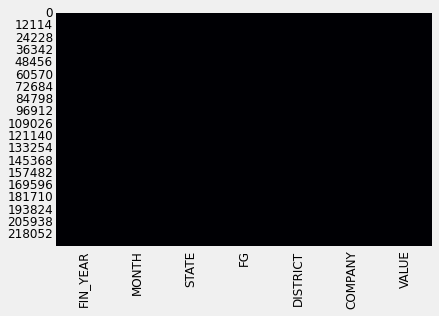

In [13]:
# Heatmap to check for any missing values

sns.heatmap(data_df.isnull(), cmap='magma',cbar=False)

In [14]:
# Dropping any duplicates present in the dataset (inplace helps to make the changes in the original dataset, and not create a copy)

data_df.drop_duplicates(inplace=True)

In [15]:
# Shape of the dataset after dropping duplicate records

data_df.shape

(218184, 7)

In [16]:
# Information about the dataset

data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218184 entries, 0 to 230151
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   FIN_YEAR  218184 non-null  object 
 1   MONTH     218184 non-null  object 
 2   STATE     218184 non-null  object 
 3   FG        218184 non-null  object 
 4   DISTRICT  218184 non-null  object 
 5   COMPANY   218184 non-null  object 
 6   VALUE     218184 non-null  float64
dtypes: float64(1), object(6)
memory usage: 13.3+ MB


In [17]:
# Check for any missing values in the dataset

data_df.isnull().sum()

FIN_YEAR    0
MONTH       0
STATE       0
FG          0
DISTRICT    0
COMPANY     0
VALUE       0
dtype: int64

# Preparing data according to financial year

In [18]:
# Creating a new column 'Date', combining financial year and its corresponding month

data_df['DATE'] = np.where(data_df['MONTH'].isin(['Jan','Feb','Mar']), data_df['MONTH']+data_df['FIN_YEAR'].str[5:], data_df['MONTH']+data_df['FIN_YEAR'].str[:4])

In [19]:
# Checking the tail, we can see that a new column 'Date' combining financial year and its corresponding month is created

data_df.tail(10)

FIN_YEAR MONTH          STATE            FG      DISTRICT  \
230142  2016-2017   Aug  Uttar Pradesh  Bactericides  Kanpur Dehat   
230143  2016-2017   Aug  Uttar Pradesh  Bactericides        Rampur   
230144  2016-2017   Dec  Uttar Pradesh  Bactericides      Faizabad   
230145  2016-2017   Dec  Uttar Pradesh  Bactericides         Basti   
230146  2016-2017   Dec  Uttar Pradesh  Bactericides        Ballia   
230147  2016-2017   Dec  Uttar Pradesh  Bactericides          Etah   
230148  2016-2017   Dec  Uttar Pradesh  Bactericides   Bulandshahr   
230149  2016-2017   Dec  Uttar Pradesh  Bactericides       Lucknow   
230150  2016-2017   Dec  Uttar Pradesh  Bactericides         Basti   
230151  2016-2017   Jan  Uttar Pradesh  Bactericides         Basti   

                  COMPANY   VALUE     DATE  
230142             agizu     0.00  Aug2016  
230143             trita     0.00  Aug2016  
230144  ABC Manufacturing    0.00  Dec2016  
230145  ABC Manufacturing    0.00  Dec2016  
230146  ABC Manufacturing    0.00  Dec2016  
230147  ABC Manufacturing    0.00  Dec2016  
230148         disescent     6.75  Dec2016  
230149         disescent     0.00  Dec2016  
230150         disescent   486.00  Dec2016  
230151           venible     0.00  Jan2017

In [20]:
# Description of the dataset, 'Date' is also an object/string

data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218184 entries, 0 to 230151
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   FIN_YEAR  218184 non-null  object 
 1   MONTH     218184 non-null  object 
 2   STATE     218184 non-null  object 
 3   FG        218184 non-null  object 
 4   DISTRICT  218184 non-null  object 
 5   COMPANY   218184 non-null  object 
 6   VALUE     218184 non-null  float64
 7   DATE      218184 non-null  object 
dtypes: float64(1), object(7)
memory usage: 15.0+ MB


In [21]:
# Create a new data frame with required features
sf_df=data_df[['DATE','STATE','FG','DISTRICT','COMPANY','VALUE']]
sf_df.head()

DATE    STATE            FG DISTRICT  COMPANY    VALUE
0  Nov2014  Haryana  Insecticides   Rohtak  monous    675.00
1  Nov2014  Haryana  Insecticides   Rewari  monous     73.71
2  Nov2014  Haryana  Insecticides  Gurgaon  monous    405.00
3  Nov2014  Haryana  Insecticides    Mewat  monous   1188.00
4  Nov2014  Haryana  Insecticides   Palwal  monous   5188.59

In [22]:
# sorting according to the date
sf_df=sf_df.sort_values(by='DATE')
sf_df.head()

DATE          STATE            FG           DISTRICT  \
12670  Apr2014        Haryana  Insecticides              Mewat   
10095  Apr2014  Uttar Pradesh  Insecticides          Shravasti   
10096  Apr2014  Uttar Pradesh  Insecticides              Gonda   
10097  Apr2014  Uttar Pradesh  Insecticides              Basti   
10098  Apr2014  Uttar Pradesh  Insecticides  Sant Kabeer Nagar   

                 COMPANY    VALUE  
12670  ABC Manufacturing   135.00  
10095            cynoid    540.00  
10096            cynoid   2345.22  
10097            cynoid   2109.24  
10098            cynoid    783.00

In [23]:
# change to date time format
sf_df['DATE']=pd.to_datetime(sf_df['DATE'])
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218184 entries, 12670 to 107969
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   DATE      218184 non-null  datetime64[ns]
 1   STATE     218184 non-null  object        
 2   FG        218184 non-null  object        
 3   DISTRICT  218184 non-null  object        
 4   COMPANY   218184 non-null  object        
 5   VALUE     218184 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 11.7+ MB


In [24]:
sf_df

DATE          STATE            FG           DISTRICT  \
12670  2014-04-01        Haryana  Insecticides              Mewat   
10095  2014-04-01  Uttar Pradesh  Insecticides          Shravasti   
10096  2014-04-01  Uttar Pradesh  Insecticides              Gonda   
10097  2014-04-01  Uttar Pradesh  Insecticides              Basti   
10098  2014-04-01  Uttar Pradesh  Insecticides  Sant Kabeer Nagar   
...           ...            ...           ...                ...   
225037 2017-09-01  Uttar Pradesh  Bactericides              Hapur   
225036 2017-09-01  Uttar Pradesh  Bactericides    Kanshiram Nagar   
225035 2017-09-01  Uttar Pradesh  Bactericides               Etah   
225033 2017-09-01  Uttar Pradesh  Bactericides           Mirzapur   
107969 2017-09-01  Uttar Pradesh    Herbicides        Farrukhabad   

                  COMPANY     VALUE  
12670   ABC Manufacturing   135.000  
10095             cynoid    540.000  
10096             cynoid   2345.220  
10097             cynoid   2109.240  
10098             cynoid    783.000  
...                   ...       ...  
225037          idiombee      0.000  
225036          idiombee      0.000  
225035          idiombee      0.000  
225033          idiombee      0.000  
107969  ABC Manufacturing   855.495  

[218184 rows x 6 columns]

In [25]:
# resetting the index
sf_df.set_index('DATE',inplace=True)

In [26]:
sf_df

STATE            FG           DISTRICT            COMPANY  \
DATE                                                                            
2014-04-01        Haryana  Insecticides              Mewat  ABC Manufacturing   
2014-04-01  Uttar Pradesh  Insecticides          Shravasti            cynoid    
2014-04-01  Uttar Pradesh  Insecticides              Gonda            cynoid    
2014-04-01  Uttar Pradesh  Insecticides              Basti            cynoid    
2014-04-01  Uttar Pradesh  Insecticides  Sant Kabeer Nagar            cynoid    
...                   ...           ...                ...                ...   
2017-09-01  Uttar Pradesh  Bactericides              Hapur          idiombee    
2017-09-01  Uttar Pradesh  Bactericides    Kanshiram Nagar          idiombee    
2017-09-01  Uttar Pradesh  Bactericides               Etah          idiombee    
2017-09-01  Uttar Pradesh  Bactericides           Mirzapur          idiombee    
2017-09-01  Uttar Pradesh    Herbicides        Farrukhabad  ABC Manufacturing   

               VALUE  
DATE                  
2014-04-01   135.000  
2014-04-01   540.000  
2014-04-01  2345.220  
2014-04-01  2109.240  
2014-04-01   783.000  
...              ...  
2017-09-01     0.000  
2017-09-01     0.000  
2017-09-01     0.000  
2017-09-01     0.000  
2017-09-01   855.495  

[218184 rows x 5 columns]

In [27]:
sf_df.describe(include='all')

STATE            FG DISTRICT            COMPANY          VALUE
count          218184        218184   218184             218184  218184.000000
unique              5             4      142                 47            NaN
top     Uttar Pradesh  Insecticides   Karnal  ABC Manufacturing            NaN
freq           122644         56298     3142              26443            NaN
mean              NaN           NaN      NaN                NaN     743.528548
std               NaN           NaN      NaN                NaN    2316.652667
min               NaN           NaN      NaN                NaN       0.000000
25%               NaN           NaN      NaN                NaN       0.000000
50%               NaN           NaN      NaN                NaN       0.000000
75%               NaN           NaN      NaN                NaN     310.500000
max               NaN           NaN      NaN                NaN   69828.750000

In [28]:
sf_df.index

DatetimeIndex(['2014-04-01', '2014-04-01', '2014-04-01', '2014-04-01',
               '2014-04-01', '2014-04-01', '2014-04-01', '2014-04-01',
               '2014-04-01', '2014-04-01',
               ...
               '2017-09-01', '2017-09-01', '2017-09-01', '2017-09-01',
               '2017-09-01', '2017-09-01', '2017-09-01', '2017-09-01',
               '2017-09-01', '2017-09-01'],
              dtype='datetime64[ns]', name='DATE', length=218184, freq=None)

In [29]:
# Changing the column name of 'Values' to 'Sales(tons)' for easier representation and understanding

sf_df=sf_df.rename(columns={'VALUE':'Sales(tons)'})

sf_df.head(10)

STATE            FG           DISTRICT            COMPANY  \
DATE                                                                            
2014-04-01        Haryana  Insecticides              Mewat  ABC Manufacturing   
2014-04-01  Uttar Pradesh  Insecticides          Shravasti            cynoid    
2014-04-01  Uttar Pradesh  Insecticides              Gonda            cynoid    
2014-04-01  Uttar Pradesh  Insecticides              Basti            cynoid    
2014-04-01  Uttar Pradesh  Insecticides  Sant Kabeer Nagar            cynoid    
2014-04-01  Uttar Pradesh  Insecticides        Maharajganj            cynoid    
2014-04-01  Uttar Pradesh  Insecticides          Gorakhpur            cynoid    
2014-04-01  Uttar Pradesh  Insecticides        Kushi Nagar            cynoid    
2014-04-01  Uttar Pradesh  Insecticides             Deoria            cynoid    
2014-04-01  Uttar Pradesh  Insecticides           Azamgarh            cynoid    

            Sales(tons)  
DATE                     
2014-04-01       135.00  
2014-04-01       540.00  
2014-04-01      2345.22  
2014-04-01      2109.24  
2014-04-01       783.00  
2014-04-01       162.00  
2014-04-01       270.00  
2014-04-01      1109.16  
2014-04-01      2160.00  
2014-04-01         0.00

In [30]:
sf_df.shape

(218184, 5)

In [31]:
#sns.set(font_scale=1)
sns.set()
sns.set_palette('Set1')

# Segmentation of data

**Statewise segmentation**

In [32]:
# sf_all--contains all variables (creating a new dataframe by below parameters, aggregating values for each state, company and fg and then taking mean)
sf_all=sf_df.groupby(['DATE','STATE','COMPANY','FG'])['Sales(tons)'].agg(np.mean).reset_index()
sf_all.DATE=pd.to_datetime(sf_all.DATE)
sf_all.set_index('DATE',inplace=True)
sf_all.head()

STATE            COMPANY            FG  Sales(tons)
DATE                                                             
2014-04-01  Haryana  ABC Manufacturing  Bactericides     0.000000
2014-04-01  Haryana  ABC Manufacturing    Herbicides    13.326429
2014-04-01  Haryana  ABC Manufacturing  Insecticides  1490.380714
2014-04-01  Haryana  ABC Manufacturing  Rodenticides    47.610000
2014-04-01  Haryana            cynoid   Bactericides     0.000000

In [33]:
sf_all.shape

(11492, 4)

In [34]:
#sf_state_df--contains only state, aggregating values by state, then creating new column 'sales', containing avg sales
sf_state_df=sf_df.groupby('STATE')['Sales(tons)'].agg(Sales=np.mean).reset_index()
sf_state_df.head()

STATE       Sales
0           Haryana  632.284511
1  Himachal Pradesh  205.449429
2            Punjab  935.040759
3     Uttar Pradesh  736.502825
4       Uttarakhand  916.171810

In [35]:
sf_state_df.shape

(5, 2)

# Data Visualization

**Overall State Sales**

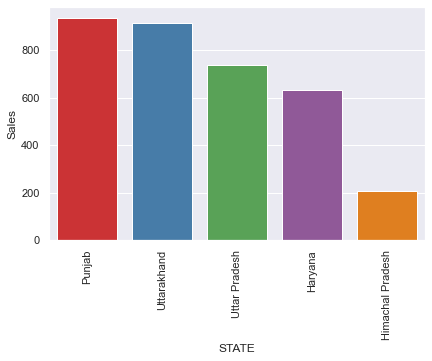

In [36]:
sns.barplot(data=sf_state_df.sort_values('Sales',ascending=False),x='STATE',y='Sales')
plt.xticks(rotation=90)
plt.show()

**State wise relationship between Products and Sales**

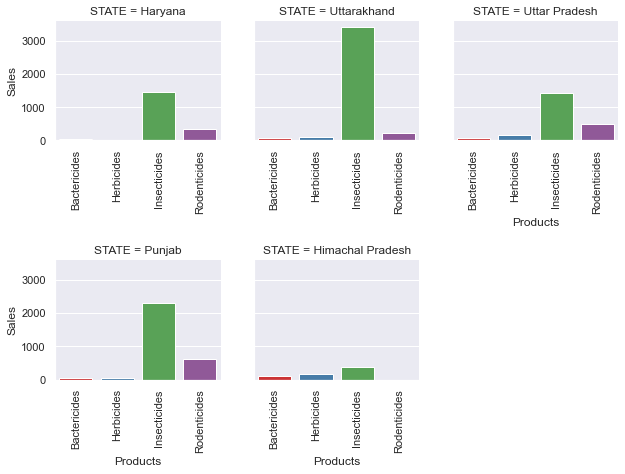

In [37]:
g=sns.FacetGrid(sf_all.sort_values('FG'),col='STATE',sharex=False,col_wrap=3)
g.map(sns.barplot,'FG','Sales(tons)',palette='Set1',ci=False)
g.figure.subplots_adjust(hspace=1)
g.set_xlabels('Products')
g.set_ylabels('Sales')
g.set_xticklabels(rotation=90)

**State wise relationship between Company and Sales**

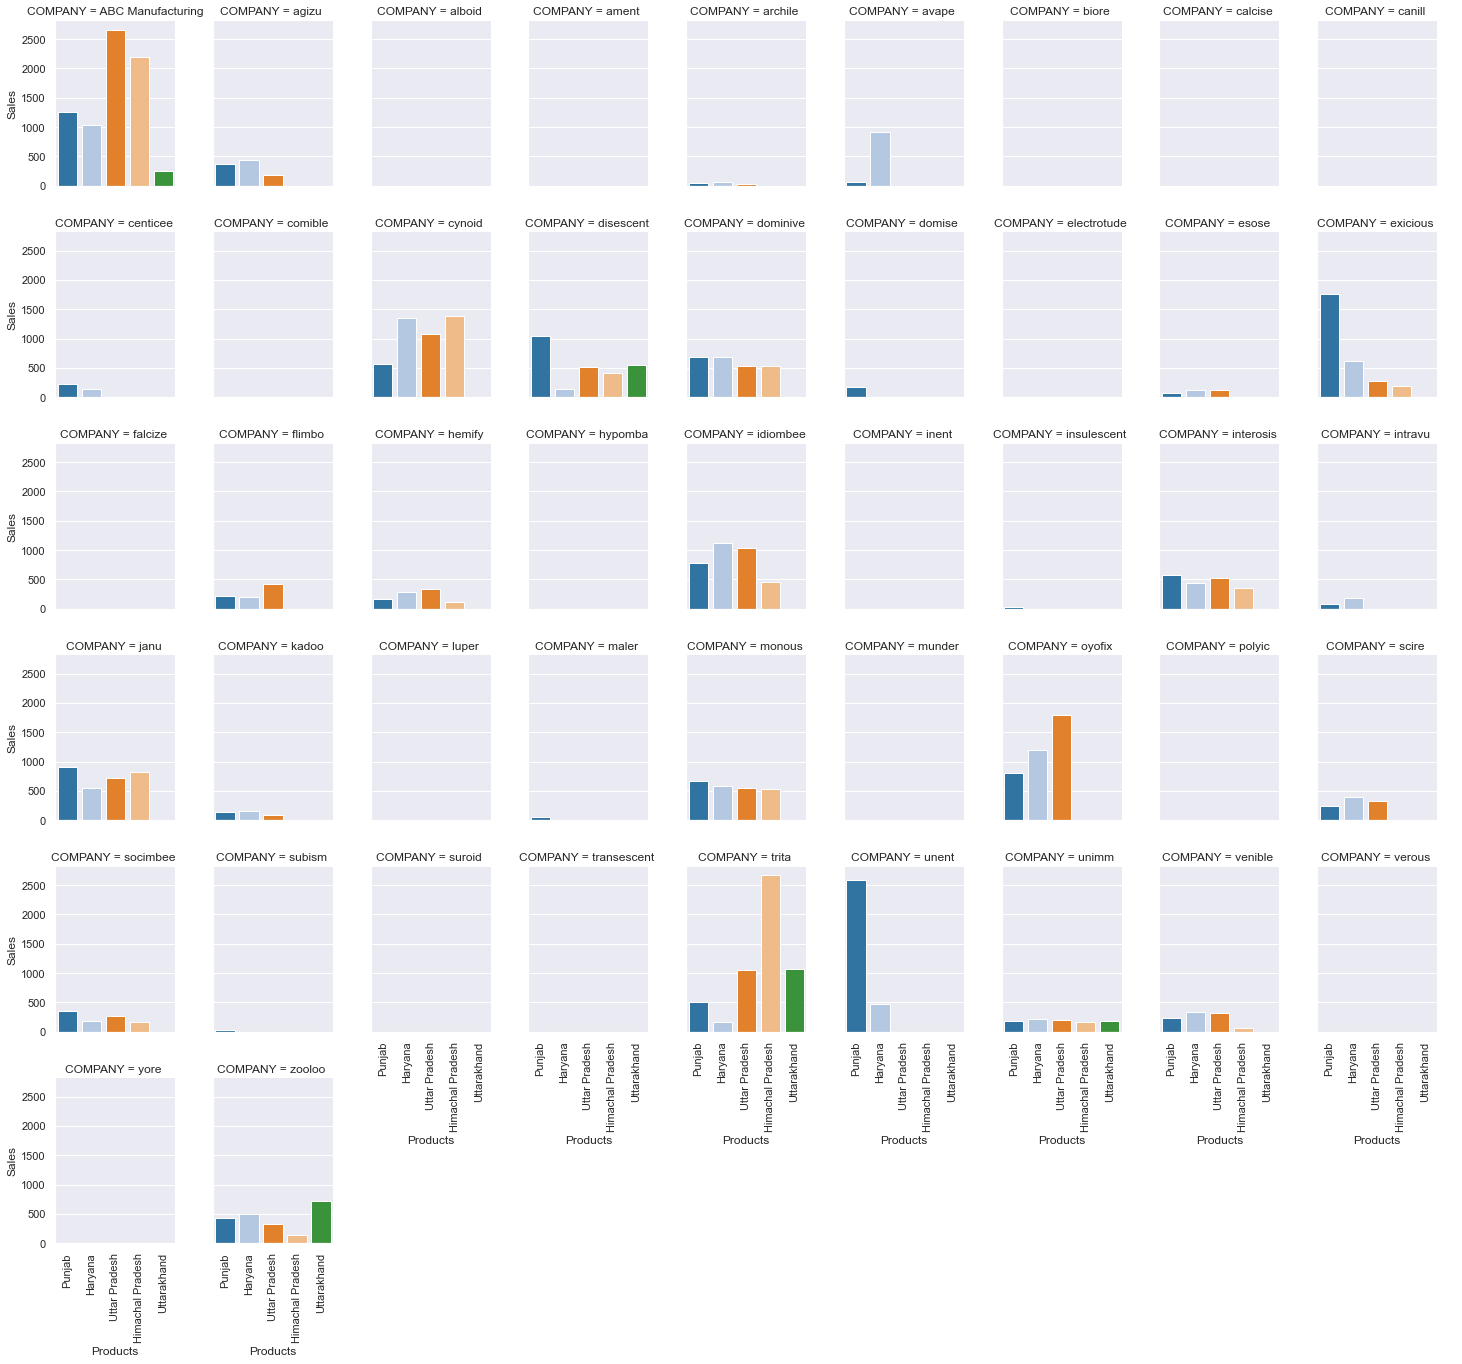

In [38]:
g=sns.FacetGrid(sf_all.sort_values('COMPANY'),col='COMPANY',col_wrap=9,aspect=.75)
g=(g.map(sns.barplot,'STATE','Sales(tons)',palette='tab20',ci=False)).add_legend()
g.set_xlabels('Products')
g.set_ylabels('Sales')
g.set_xticklabels(rotation=90)

**Sales acording to the year and month**

In [39]:
#sf_ts_df---datetime indexed for only Sales (Here, we're creating a new dataframe, grouping by 'date' and aggregating the vales and then taking mean)
sf_ts_df=sf_df.groupby('DATE')['Sales(tons)'].agg(np.mean).reset_index()

# Converting date to datetime, setting it as index 
sf_ts_df['DATE']=pd.to_datetime(sf_ts_df['DATE'])
sf_ts_df.set_index('DATE',inplace=True)
sf_ts_df.head()

Sales(tons)
DATE                   
2014-04-01   639.453642
2014-05-01   692.090660
2014-06-01   785.418228
2014-07-01   712.554243
2014-08-01   780.843419

<AxesSubplot:xlabel='DATE'>

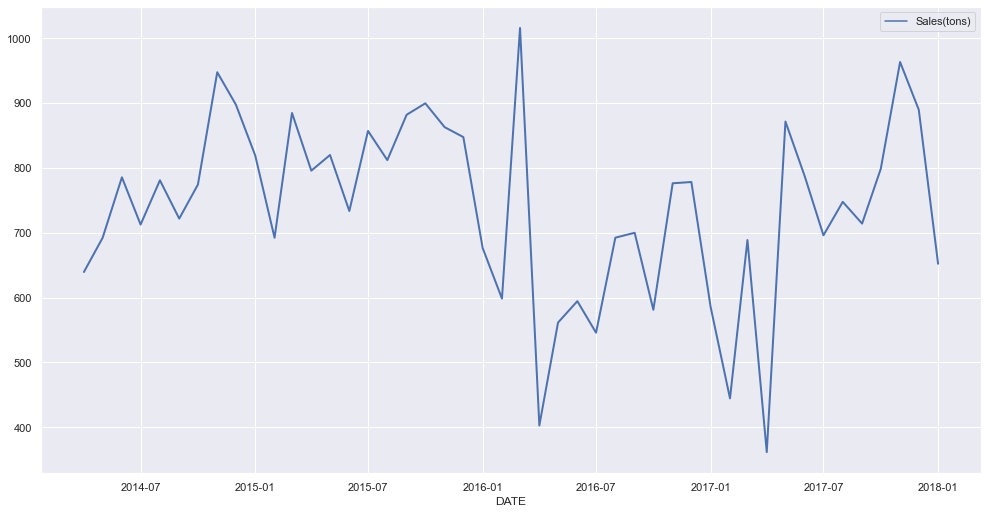

In [40]:
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(data=sf_ts_df,ci=False,linewidth=2)

**Sate wise sales according to the month**

In [41]:
#sf_ts_state_df---datetime indexed for all states 
# Creating a new dataframe grouping date, state, aggregating values and taking mean
sf_ts_state_df=sf_df.groupby(['DATE','STATE'])['Sales(tons)'].agg(np.mean).reset_index()

# Separate each state to each column (pd.pivot produces pivot table based on 3 columns of dataframe - index, columns, values)
sf_ts_state_df=pd.pivot(data=sf_ts_state_df,
    index='DATE',columns='STATE',values='Sales(tons)'
).reset_index()

# convert to datatime
sf_ts_state_df['DATE']=pd.to_datetime(sf_ts_state_df['DATE'])

# set index to date column
sf_ts_state_df.set_index('DATE',inplace=True)

# average sales for each month
sf_ts_state_df['avg_state_sales']=sf_ts_state_df.mean(axis=1)
sf_ts_state_df.head()

STATE          Haryana  Himachal Pradesh       Punjab  Uttar Pradesh  \
DATE                                                                   
2014-04-01  545.717526        195.262500  1296.189730     448.876956   
2014-05-01  711.438129        224.384211   981.670357     601.443988   
2014-06-01  837.562299        262.724063  1130.833750     644.344491   
2014-07-01  758.043750        440.845875   837.731818     654.329528   
2014-08-01  593.958261        187.396875   763.751979     860.313211   

STATE       Uttarakhand  avg_state_sales  
DATE                                      
2014-04-01   767.996250       650.808592  
2014-05-01   685.948500       640.977037  
2014-06-01  1169.879318       809.068784  
2014-07-01  1044.745312       747.139257  
2014-08-01   657.326683       612.549402

[]

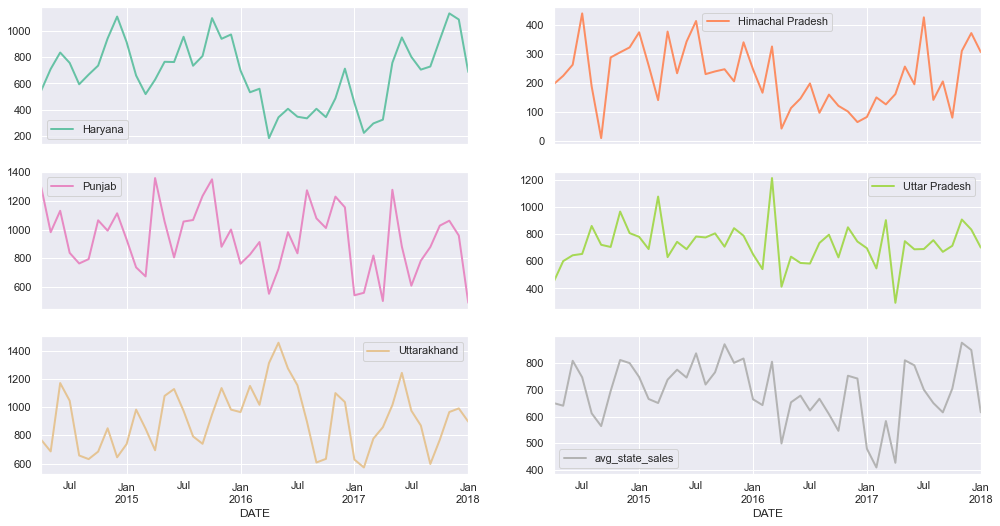

In [42]:
sf_ts_state_df.plot(
    subplots=True,
    layout=(3,2),
    colormap='Set2',
    linewidth=2 
)
plt.plot()

**Analysing quarterly year sales**

In [43]:
# Using the above created dataframe, we're resampling the dataset to '4M' (quarterly) and then taking mean to show avg quarter sales

q4_ts_df=sf_ts_state_df.resample('4M').mean()
q4_ts_df.head()

STATE          Haryana  Himachal Pradesh       Punjab  Uttar Pradesh  \
DATE                                                                   
2014-04-30  545.717526        195.262500  1296.189730     448.876956   
2014-08-31  725.250610        278.837756   928.496976     690.107804   
2014-12-31  866.214743        231.272352   991.182297     800.236564   
2015-04-30  681.758454        288.401862   925.016122     794.455327   
2015-08-31  806.448101        305.238209   996.371673     747.663132   

STATE       Uttarakhand  avg_state_sales  
DATE                                      
2014-04-30   767.996250       650.808592  
2014-08-31   889.474953       702.433620  
2014-12-31   702.617100       718.304611  
2015-04-30   815.201223       700.966598  
2015-08-31   992.982268       769.740677

<AxesSubplot:xlabel='DATE'>

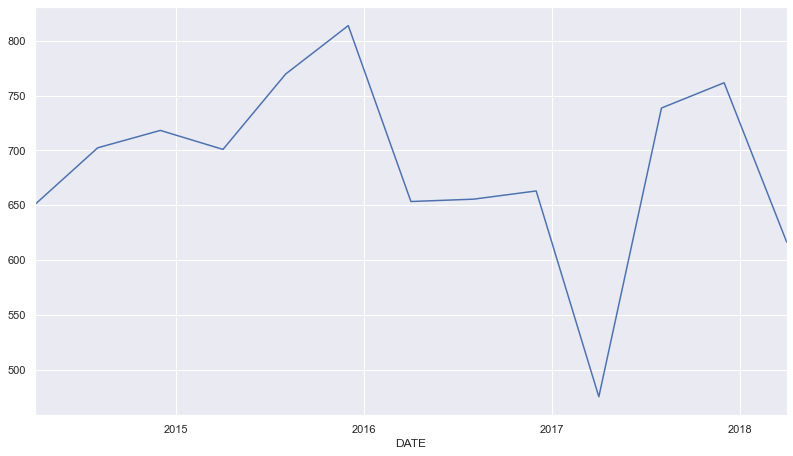

In [44]:
q4_ts_df.avg_state_sales.plot(figsize=(12,7))

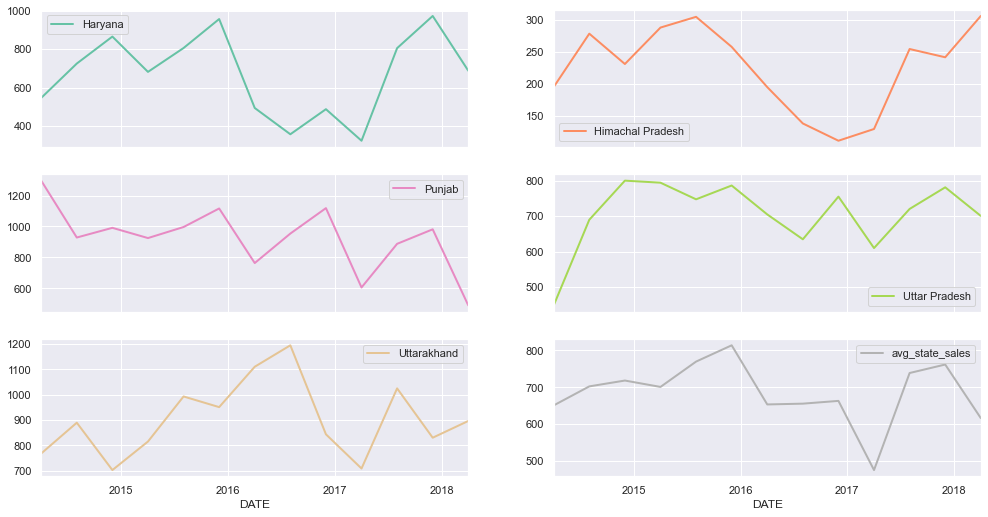

In [45]:
q4_ts_df.plot(
    subplots=True,
    layout=(3,2),
    colormap='Set2',
    linewidth=2             
)
plt.show()

**Checking Stationary**

In [46]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(sf_ts_df)

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key,value in result[4].items():
    print(key,value)

ADF Statistic: -5.349654
p-value: 0.000004
Critical Values:
1% -3.584828853223594
5% -2.9282991495198907
10% -2.6023438271604937


**Autocorrelation Function**

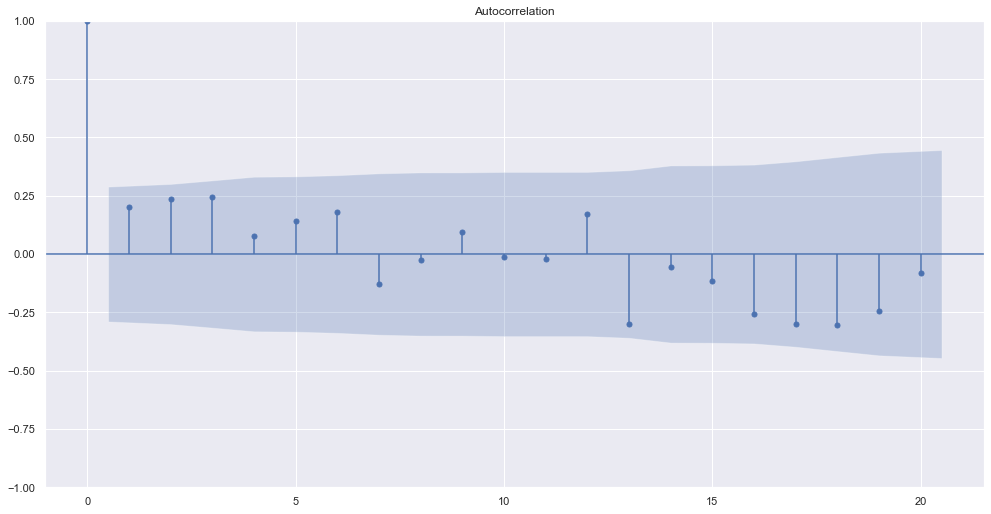

In [47]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(sf_ts_df,lags=20)
plt.show()

**Decomposing**

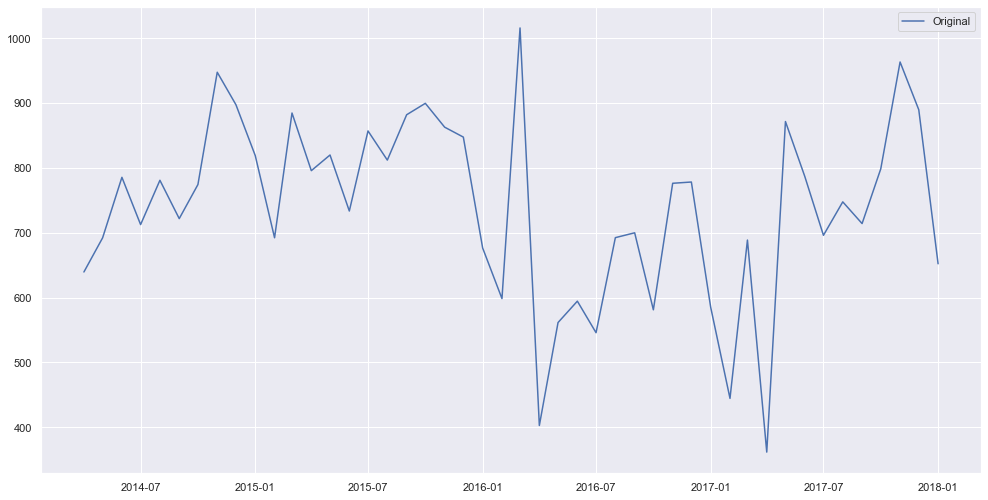

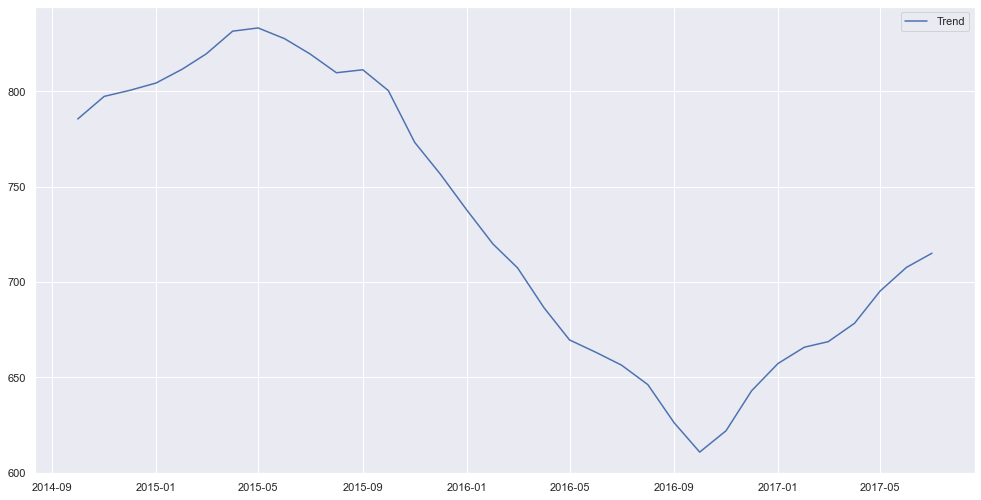

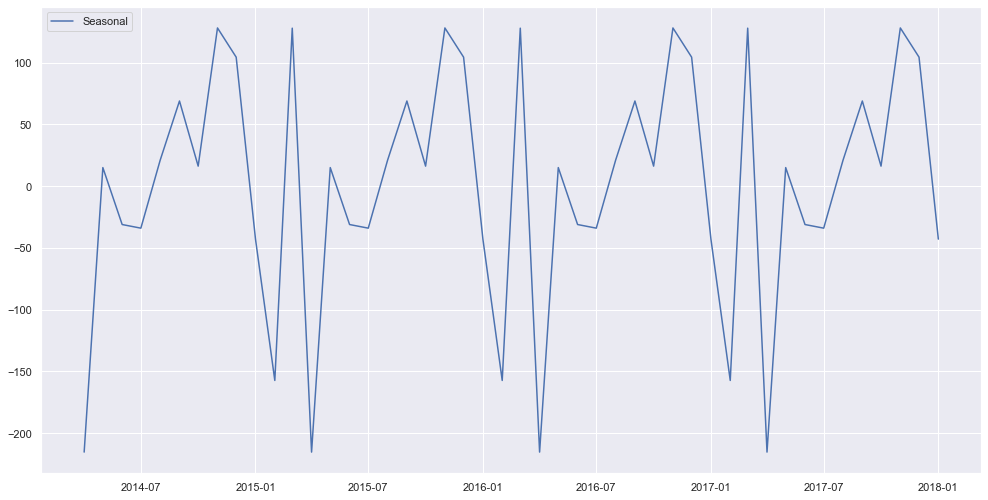

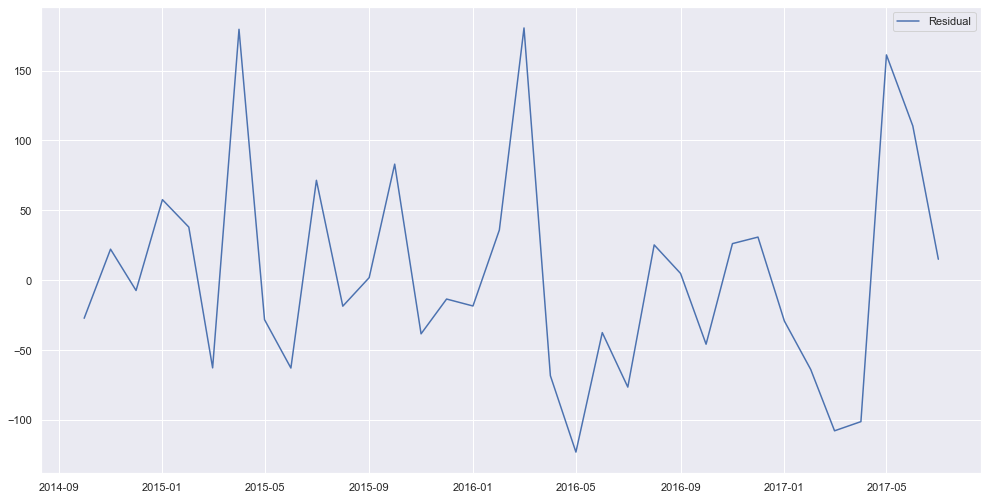

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sf_ts_df)

plt.plot(sf_ts_df,label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual,label='Residual')
plt.legend(loc='best')

# Additional Visualizations (Tableau)

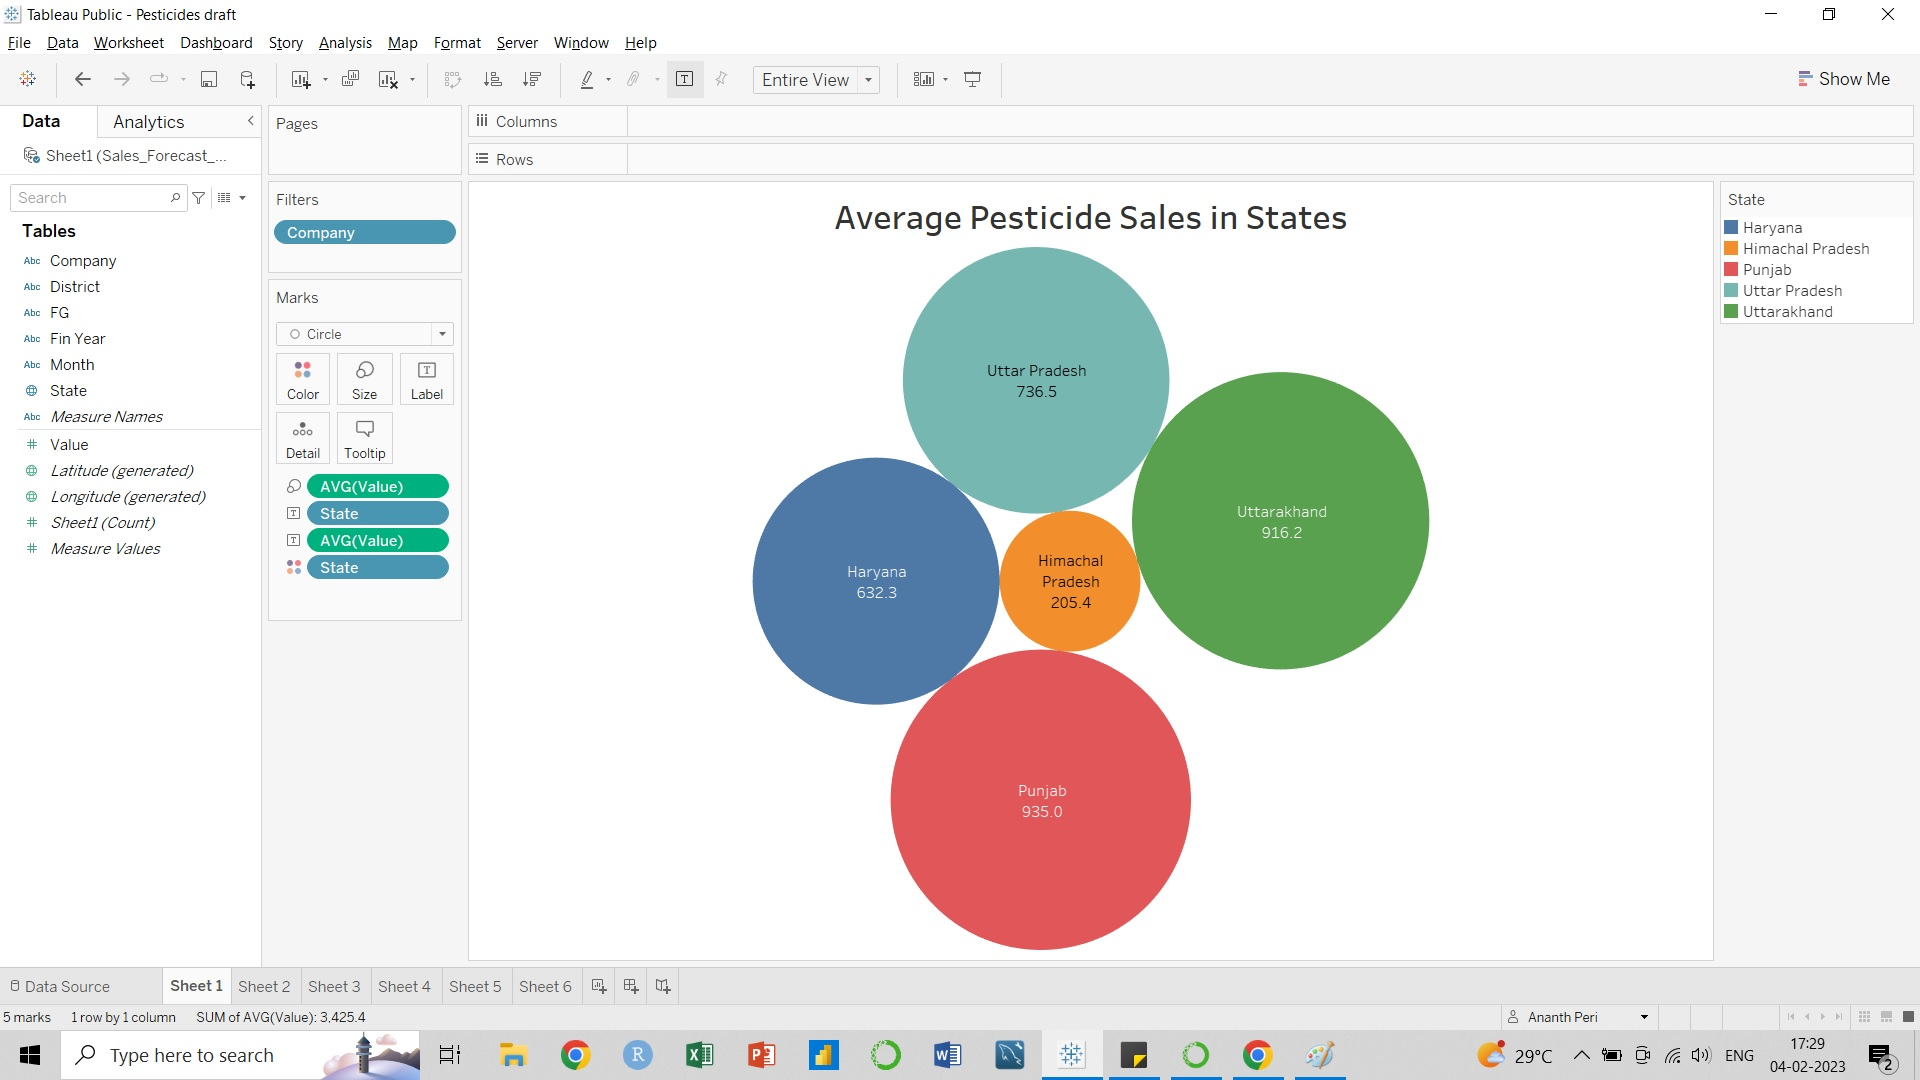

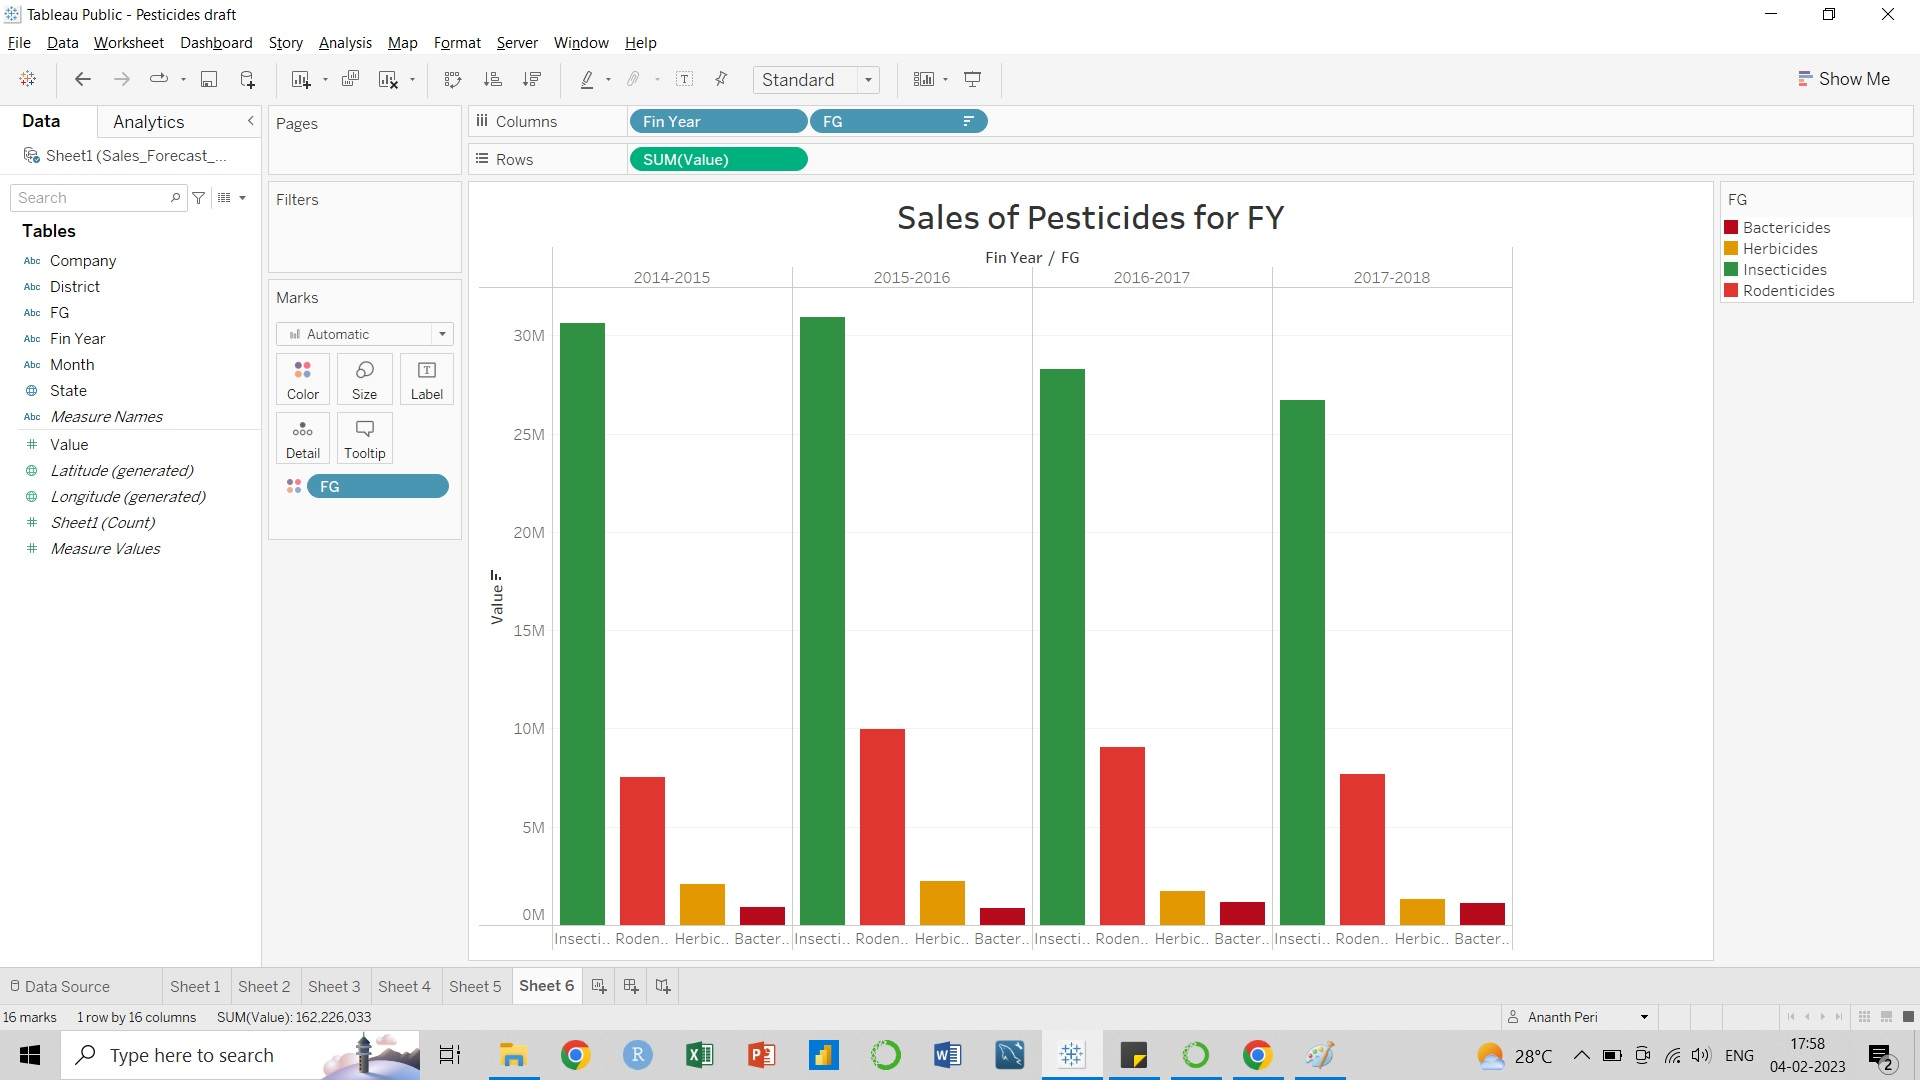

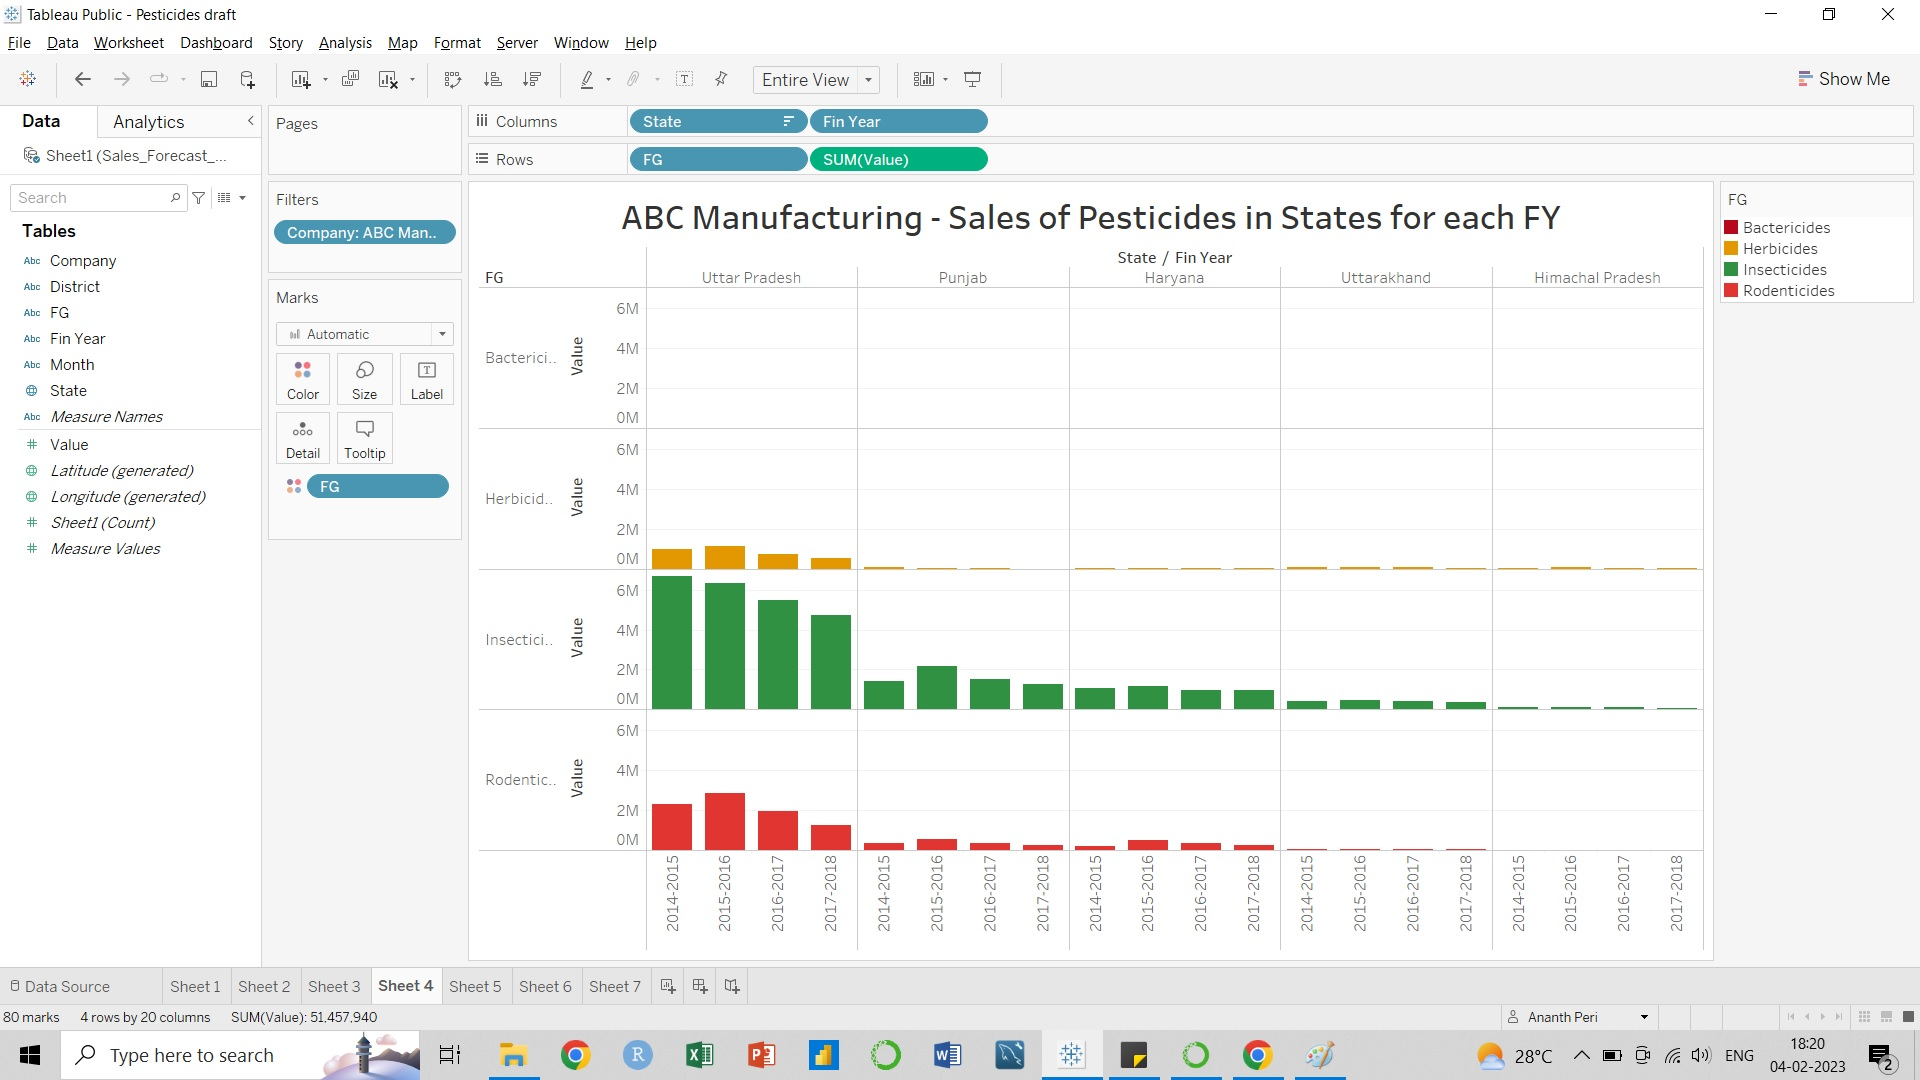

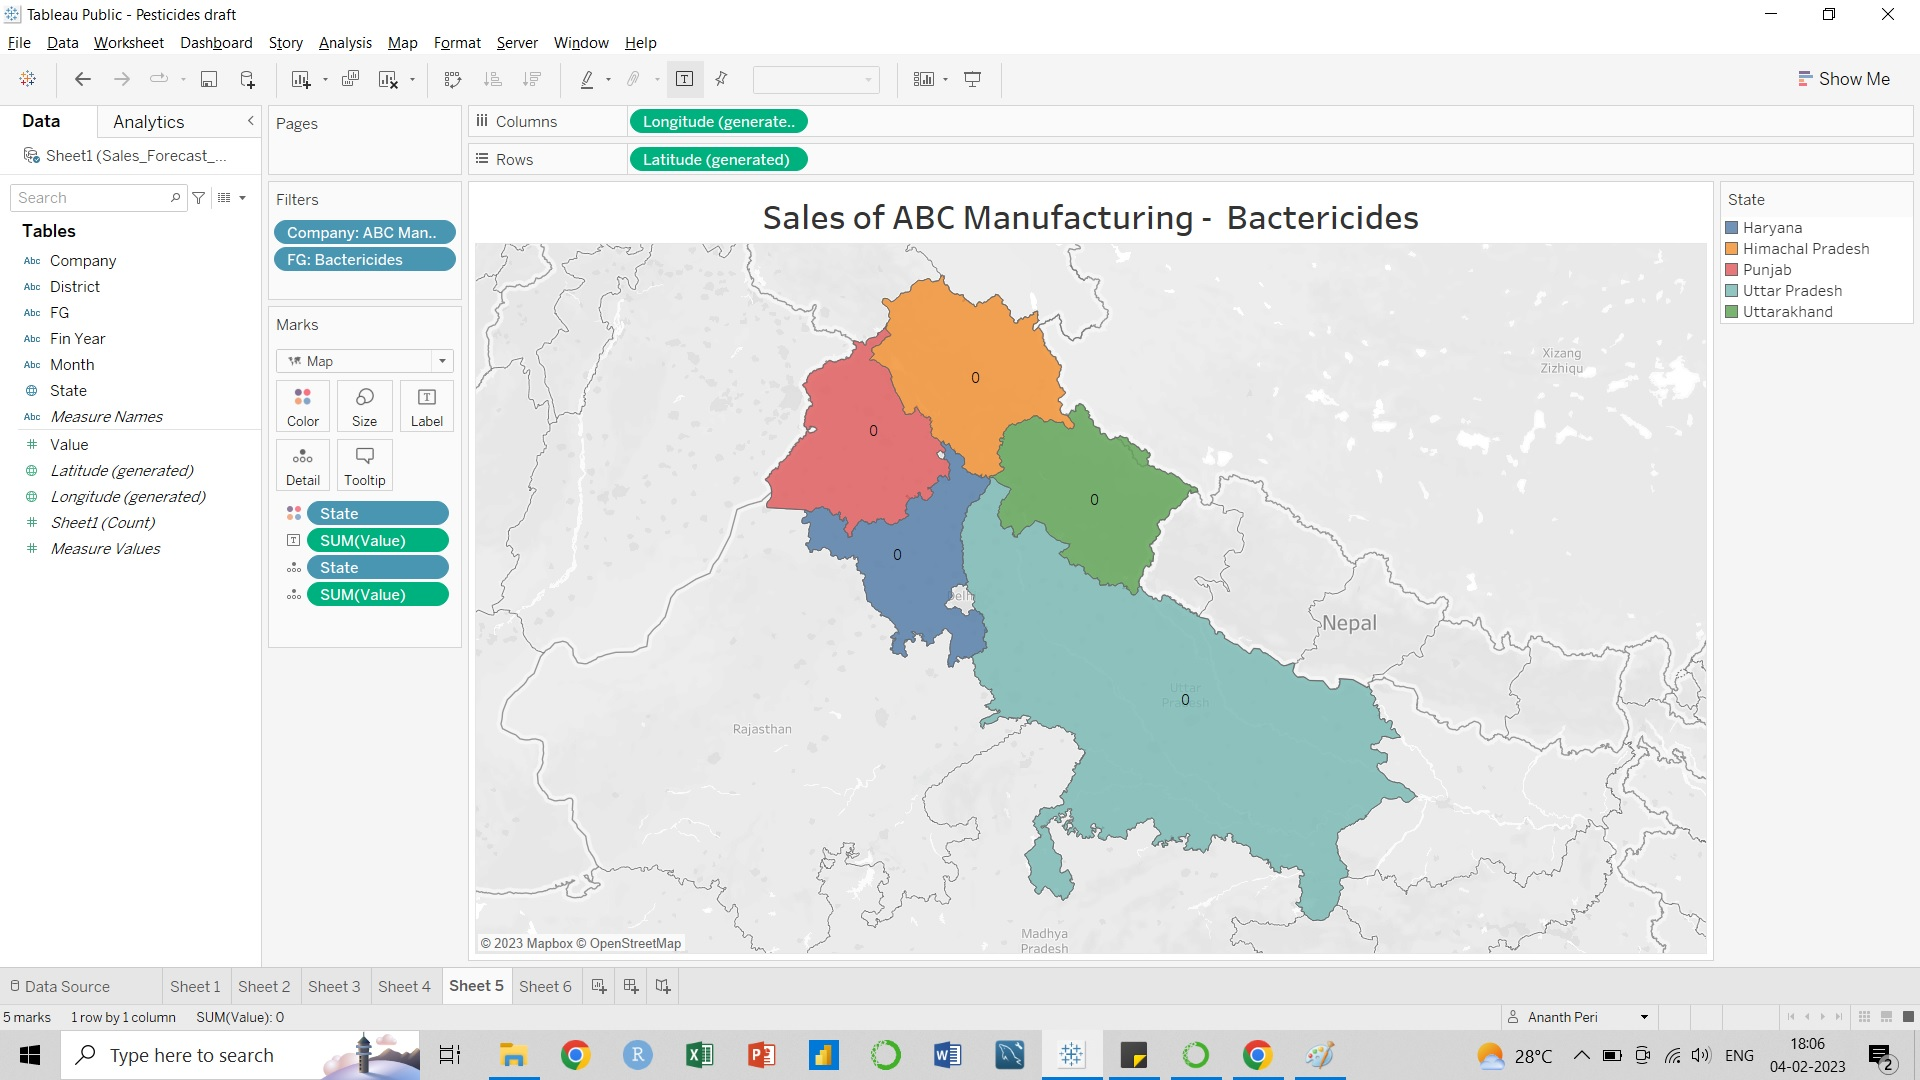

# Feature Engineering for ABC Manufacturing

In [49]:
# Dataframe containing only 'ABC Manufacturing'

ABC_df=sf_df[sf_df.COMPANY=="ABC Manufacturing"]

In [50]:
ABC_df

STATE            FG             DISTRICT  \
DATE                                                           
2014-04-01        Haryana  Insecticides                Mewat   
2014-04-01  Uttar Pradesh  Bactericides              Aligarh   
2014-04-01  Uttar Pradesh  Bactericides          Bulandshahr   
2014-04-01  Uttar Pradesh  Bactericides  Gautam Buddha Nagar   
2014-04-01  Uttar Pradesh  Bactericides            Ghaziabad   
...                   ...           ...                  ...   
2017-09-01  Uttar Pradesh  Insecticides               Jalaun   
2017-09-01  Uttar Pradesh  Insecticides         Kanpur Nagar   
2017-09-01        Haryana    Herbicides               Ambala   
2017-09-01        Haryana    Herbicides          Kurukshetra   
2017-09-01  Uttar Pradesh    Herbicides          Farrukhabad   

                      COMPANY  Sales(tons)  
DATE                                        
2014-04-01  ABC Manufacturing      135.000  
2014-04-01  ABC Manufacturing        0.000  
2014-04-01  ABC Manufacturing        0.000  
2014-04-01  ABC Manufacturing        0.000  
2014-04-01  ABC Manufacturing        0.000  
...                       ...          ...  
2017-09-01  ABC Manufacturing     5694.300  
2017-09-01  ABC Manufacturing     1150.470  
2017-09-01  ABC Manufacturing      124.605  
2017-09-01  ABC Manufacturing       82.080  
2017-09-01  ABC Manufacturing      855.495  

[26443 rows x 5 columns]

In [51]:
# Information of 'ABC Manufacturing' dataset

ABC_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26443 entries, 2014-04-01 to 2017-09-01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STATE        26443 non-null  object 
 1   FG           26443 non-null  object 
 2   DISTRICT     26443 non-null  object 
 3   COMPANY      26443 non-null  object 
 4   Sales(tons)  26443 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.2+ MB


In [52]:
ABC_df.index

DatetimeIndex(['2014-04-01', '2014-04-01', '2014-04-01', '2014-04-01',
               '2014-04-01', '2014-04-01', '2014-04-01', '2014-04-01',
               '2014-04-01', '2014-04-01',
               ...
               '2017-09-01', '2017-09-01', '2017-09-01', '2017-09-01',
               '2017-09-01', '2017-09-01', '2017-09-01', '2017-09-01',
               '2017-09-01', '2017-09-01'],
              dtype='datetime64[ns]', name='DATE', length=26443, freq=None)

In [53]:
# Dropping the below columns

ABC_df.drop(['FG','DISTRICT','COMPANY'], axis=1, inplace=True)

ABC_df.head(5)

STATE  Sales(tons)
DATE                                  
2014-04-01        Haryana        135.0
2014-04-01  Uttar Pradesh          0.0
2014-04-01  Uttar Pradesh          0.0
2014-04-01  Uttar Pradesh          0.0
2014-04-01  Uttar Pradesh          0.0

In [54]:
# Checking for stationarity by ADF test

from pandas import Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(ABC_df['Sales(tons)'])

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key,value in result[4].items():
    print(key,value)

ADF Statistic: -22.477523
p-value: 0.000000
Critical Values:
1% -3.4305975654138616
5% -2.861649416676116
10% -2.5668282392524904


**Autocorrelation Function**

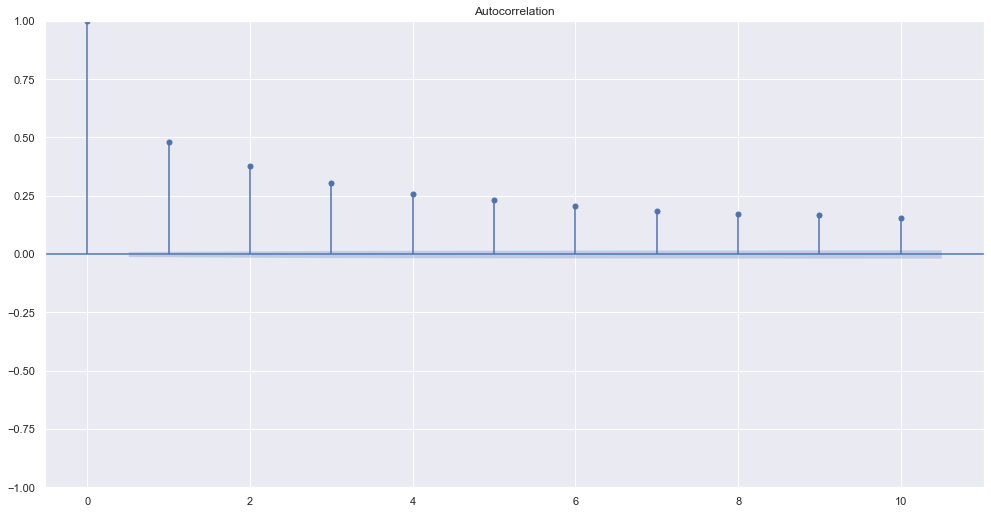

In [55]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ABC_df['Sales(tons)'],lags=10)
plt.show()

In [56]:
# We are creating new dataframes for respective states for 'ABC Manufacturing'

ABC_UP=ABC_df[ABC_df.STATE=='Uttar Pradesh']
ABC_PB=ABC_df[ABC_df.STATE=='Punjab']
ABC_HP=ABC_df[ABC_df.STATE=='Himachal Pradesh']
ABC_HA=ABC_df[ABC_df.STATE=='Haryana']
ABC_UT=ABC_df[ABC_df.STATE=='Uttarakhand']

In [57]:
# We are grouping the values by date and then resetting the index, this gives us total sales of all pesticides combined happening in that particular month

ABC_UP=ABC_UP.groupby('DATE')['Sales(tons)'].mean().reset_index()
ABC_PB=ABC_PB.groupby('DATE')['Sales(tons)'].mean().reset_index()
ABC_HP=ABC_HP.groupby('DATE')['Sales(tons)'].mean().reset_index()
ABC_HA=ABC_HA.groupby('DATE')['Sales(tons)'].mean().reset_index()
ABC_UT=ABC_UT.groupby('DATE')['Sales(tons)'].mean().reset_index()

In [58]:
# Setting the index by 'Date'

ABC_UP=ABC_UP.set_index('DATE')
ABC_PB=ABC_PB.set_index('DATE')
ABC_HP=ABC_HP.set_index('DATE')
ABC_HA=ABC_HA.set_index('DATE')
ABC_UT=ABC_UT.set_index('DATE')

In [59]:
# Sample display of subsetted dataset

ABC_UP

Sales(tons)
DATE                   
2014-04-01   660.625000
2014-05-01  1593.079476
2014-06-01  1978.078821
2014-07-01  2538.479155
2014-08-01  3830.933906
2014-09-01  2614.252500
2014-10-01  2458.408125
2014-11-01  4970.405625
2014-12-01  3644.532187
2015-01-01  2838.262500
2015-02-01  2332.428275
2015-03-01  5700.845625
2015-04-01  1851.711618
2015-05-01  2693.603352
2015-06-01  2537.732935
2015-07-01  3132.405925
2015-08-01  2864.210625
2015-09-01  2864.695781
2015-10-01  2294.491875
2015-11-01  3249.614063
2015-12-01  2935.531406
2016-01-01  2742.117656
2016-02-01  1879.643438
2016-03-01  7080.092344
2016-04-01   963.712742
2016-05-01  2167.770170
2016-06-01  2011.367045
2016-07-01  1969.149375
2016-08-01  2561.995313
2016-09-01  2075.745000
2016-10-01  1407.628594
2016-11-01  3151.923750
2016-12-01  2886.590250
2017-01-01  2874.163125
2017-02-01  2018.479219
2017-03-01  4912.333969
2017-04-01   519.129844
2017-05-01  1844.698821
2017-06-01  1610.297100
2017-07-01  1923.215929
2017-08-01  2018.469375
2017-09-01  1799.250300
2017-10-01  2400.986250
2017-11-01  4115.546550
2017-12-01  3303.355050
2018-01-01  2515.909932

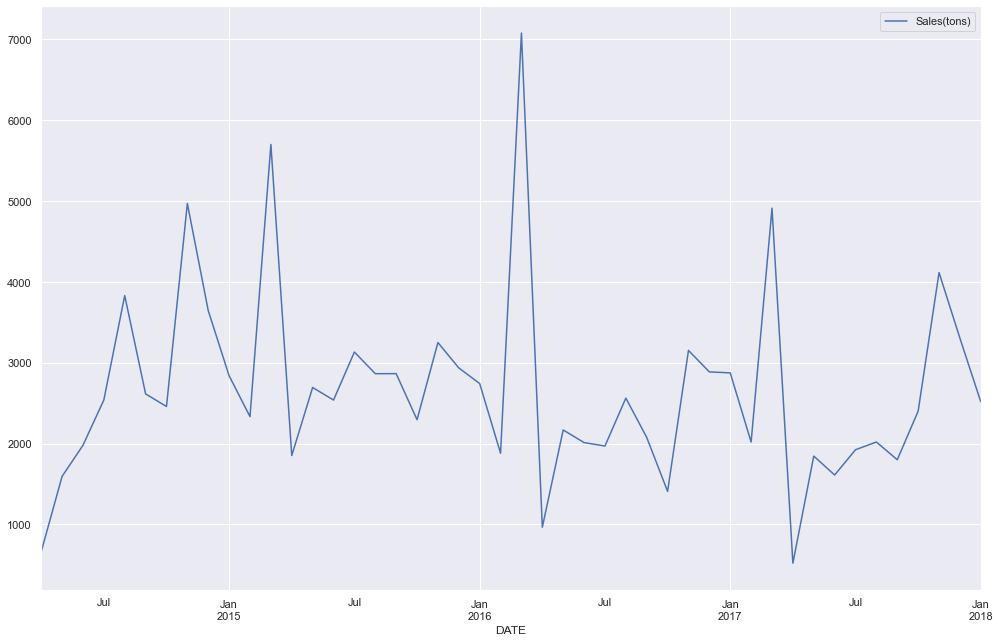

In [60]:
ABC_UP.plot(figsize=(15,10))
plt.show()

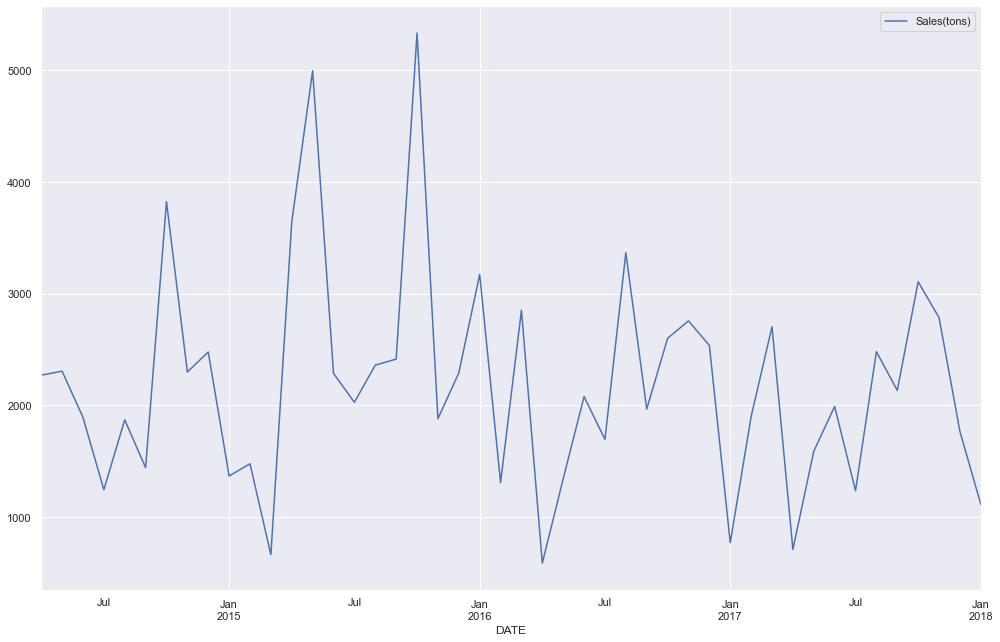

In [61]:
ABC_PB.plot(figsize=(15,10))
plt.show()

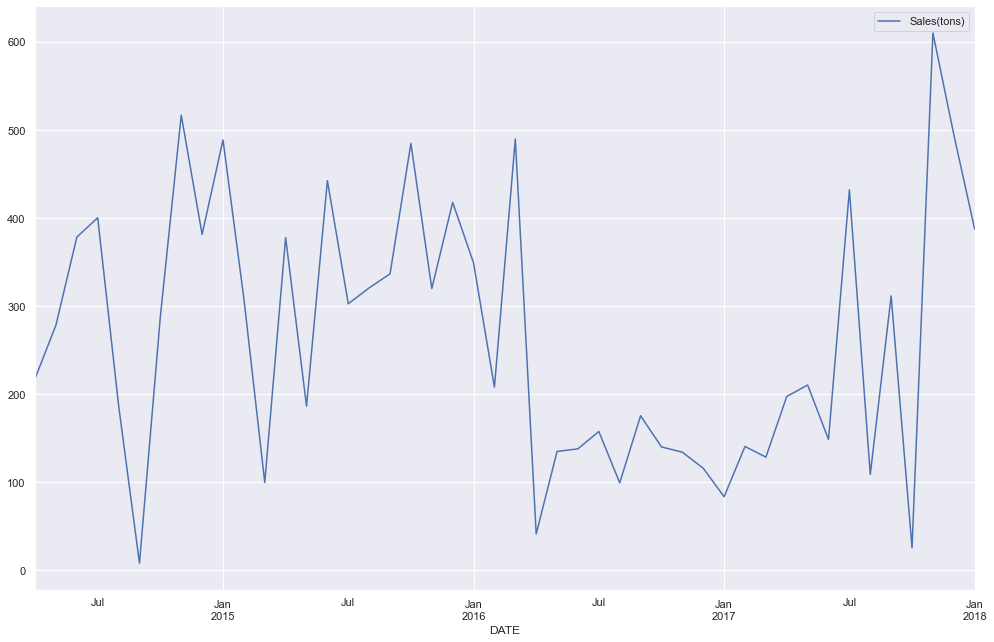

In [62]:
ABC_HP.plot(figsize=(15,10))
plt.show()

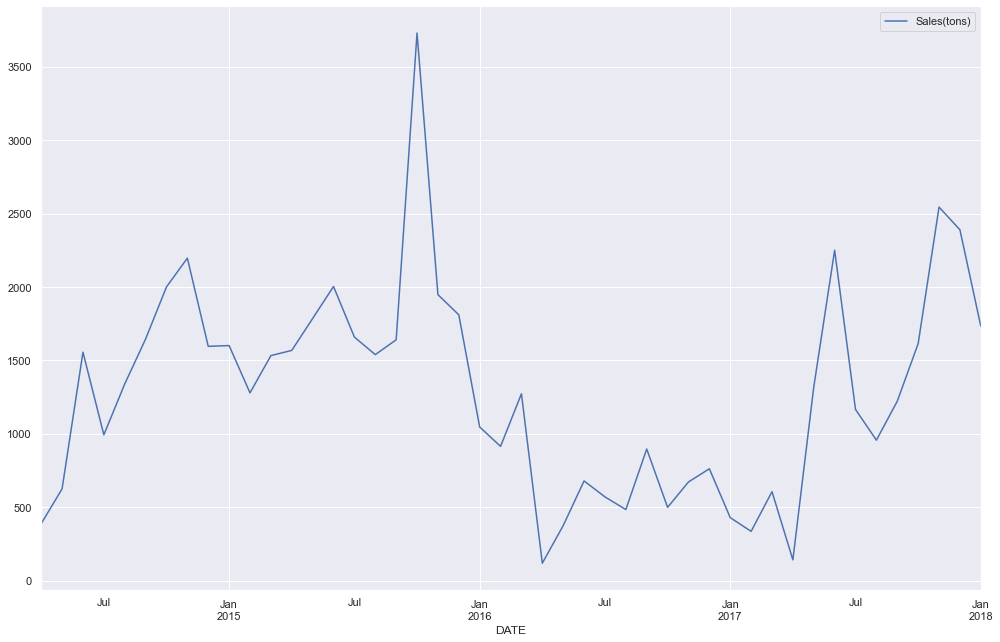

In [63]:
ABC_HA.plot(figsize=(15,10))
plt.show()

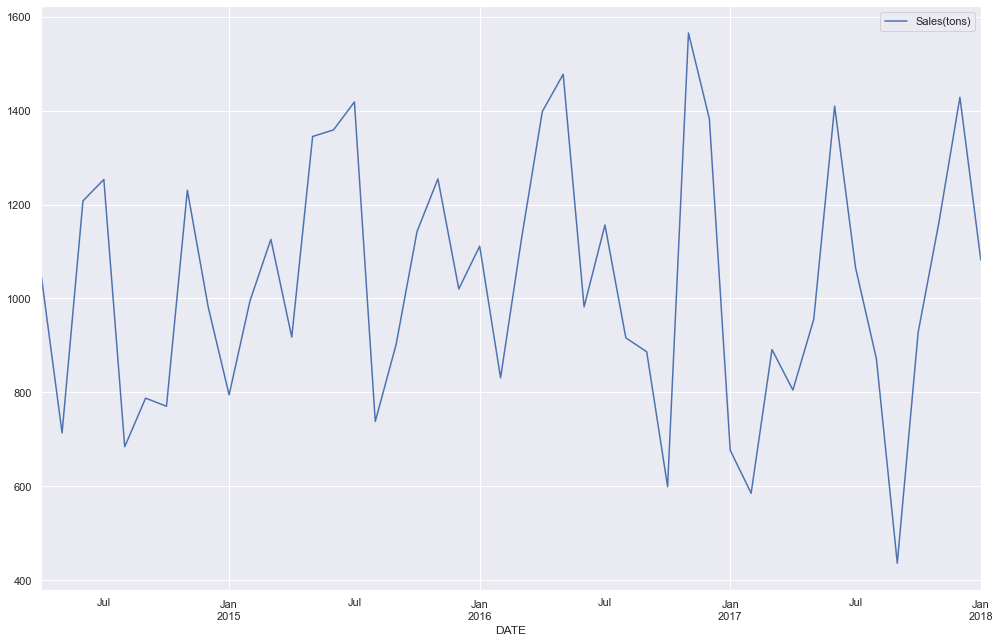

In [64]:
ABC_UT.plot(figsize=(15,10))
plt.show()

# Decomposing

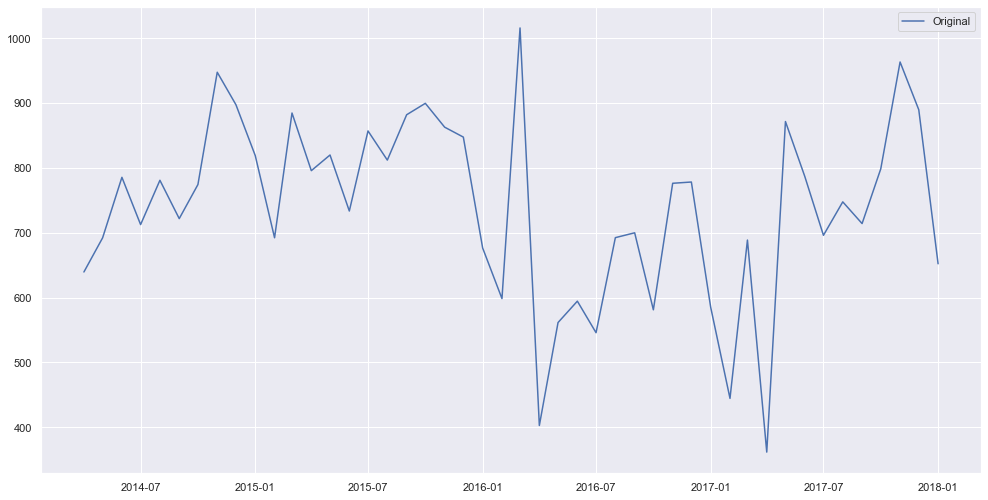

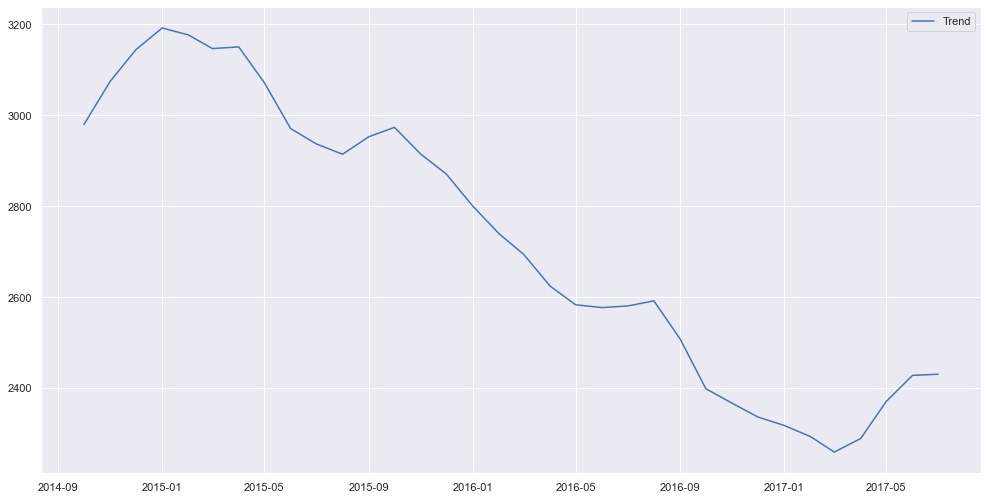

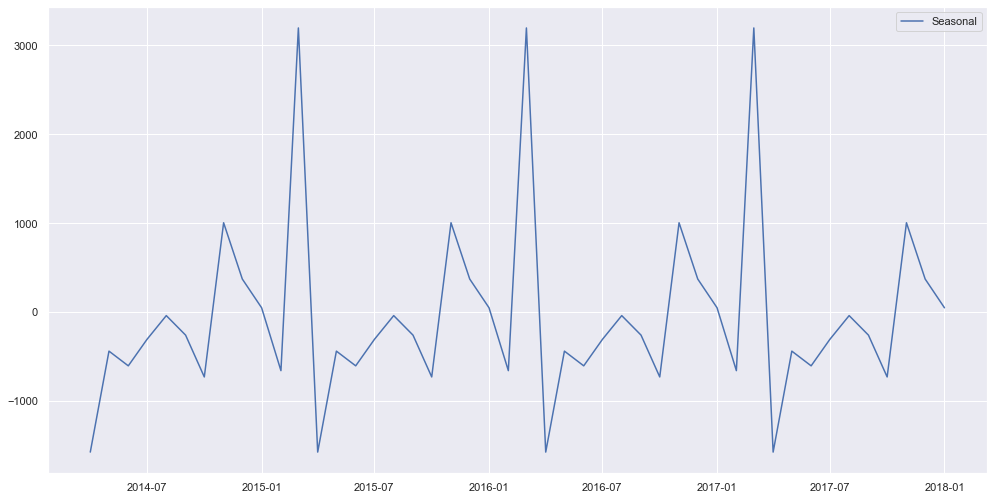

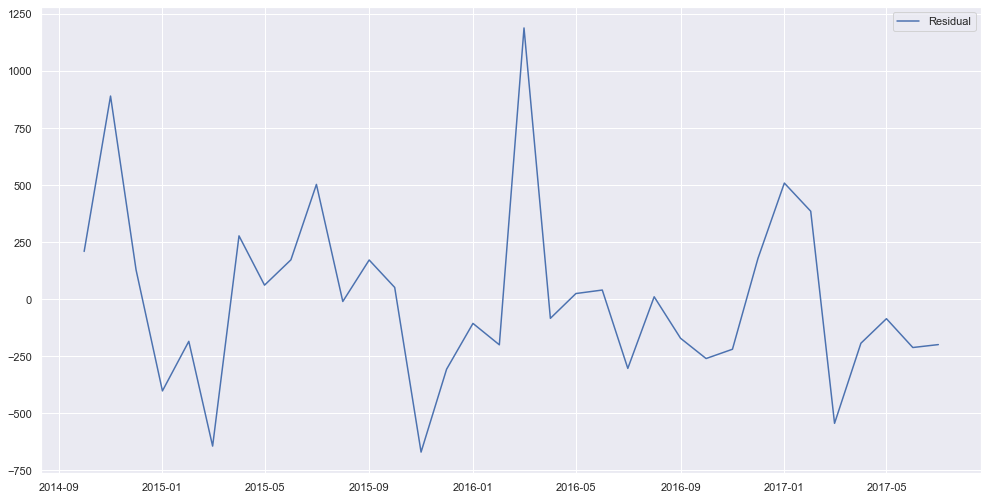

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ABC_UP)

plt.plot(sf_ts_df,label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual,label='Residual')
plt.legend(loc='best')

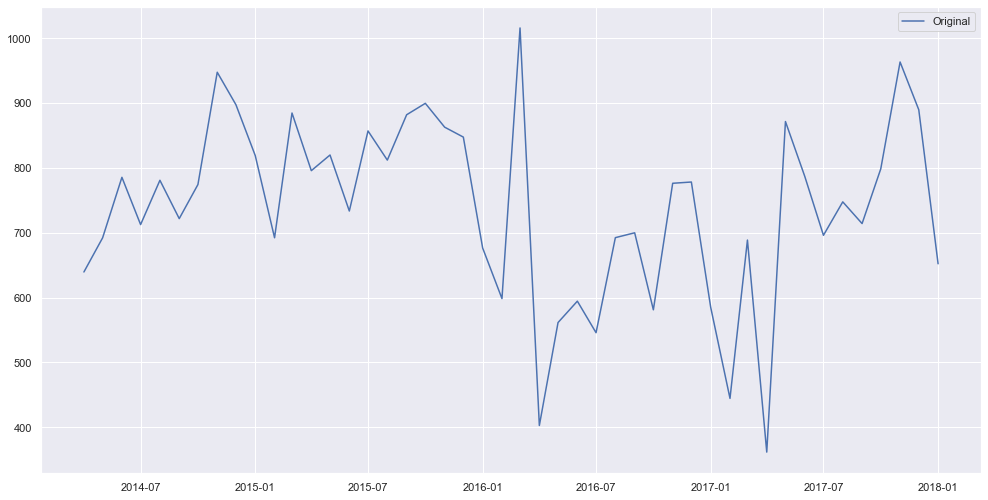

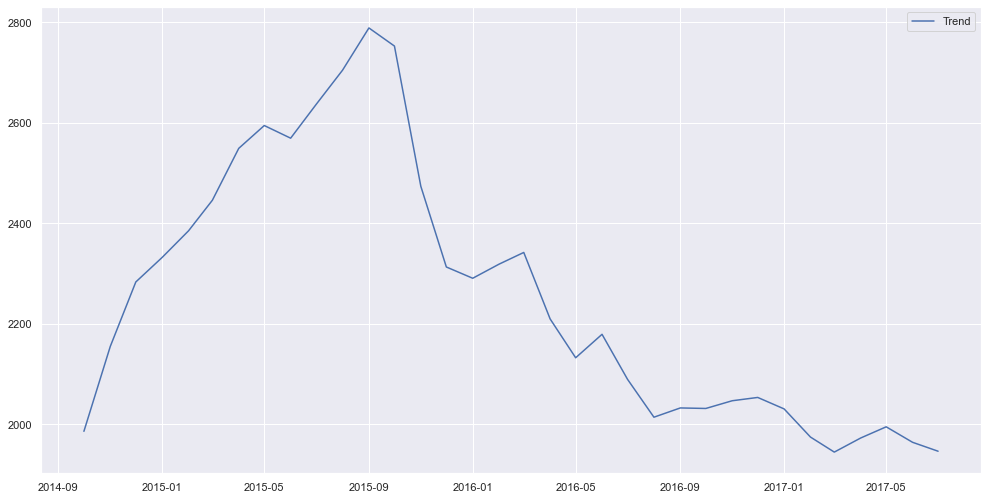

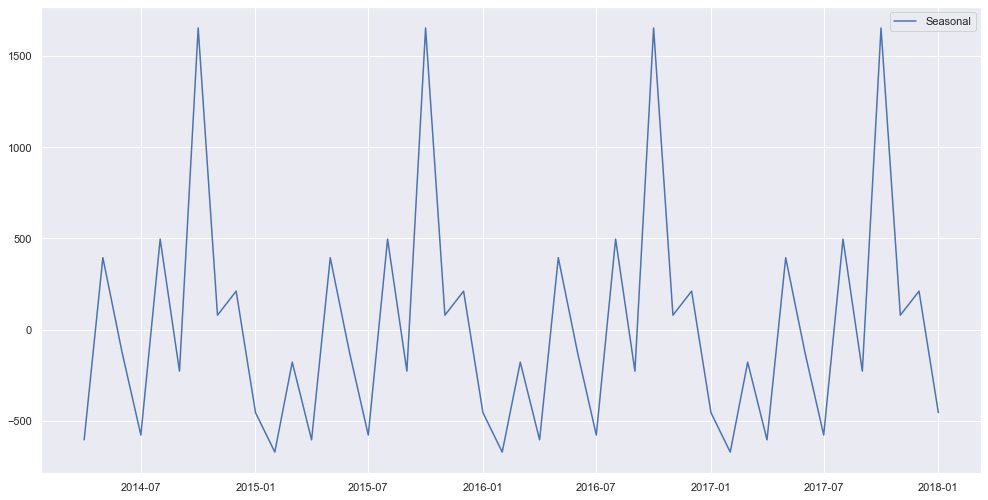

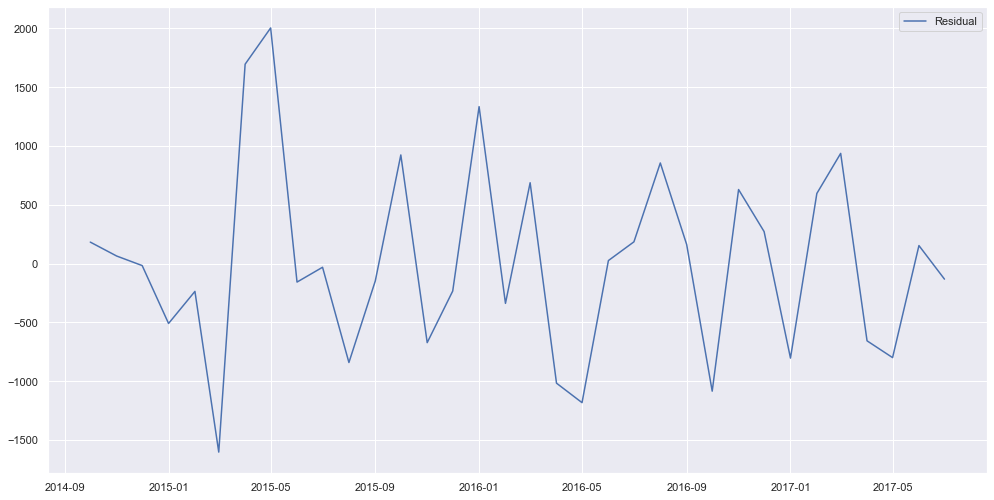

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ABC_PB)

plt.plot(sf_ts_df,label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual,label='Residual')
plt.legend(loc='best')

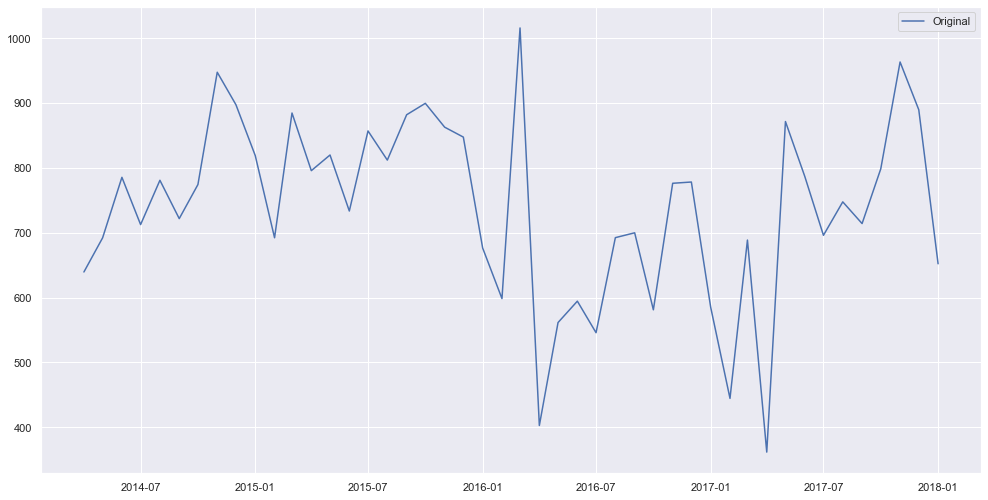

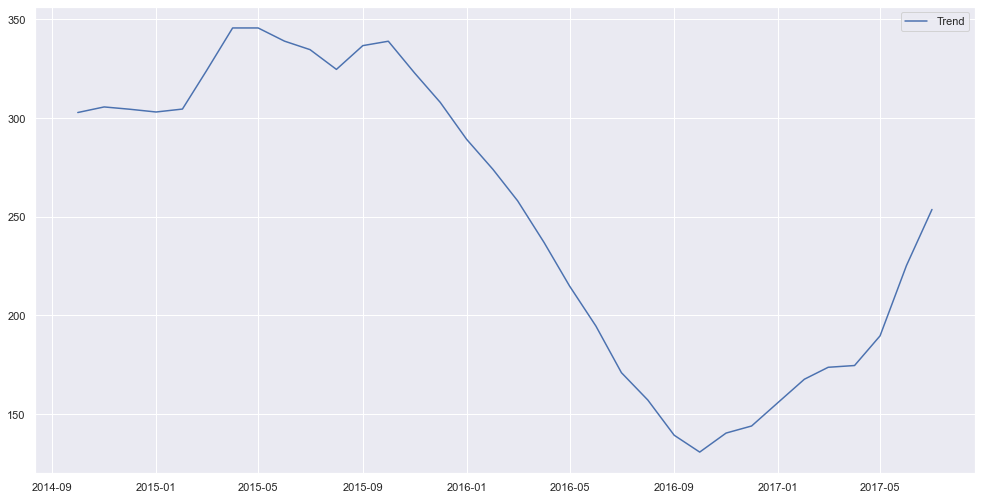

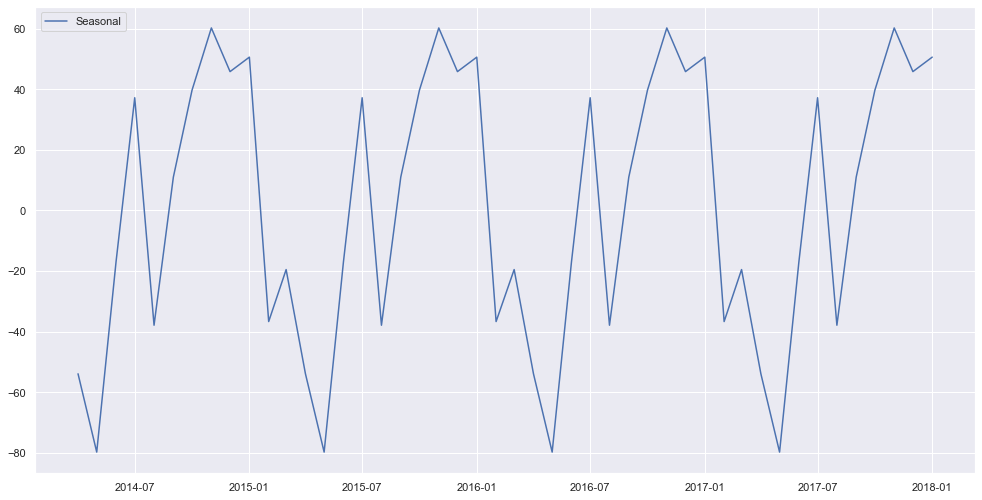

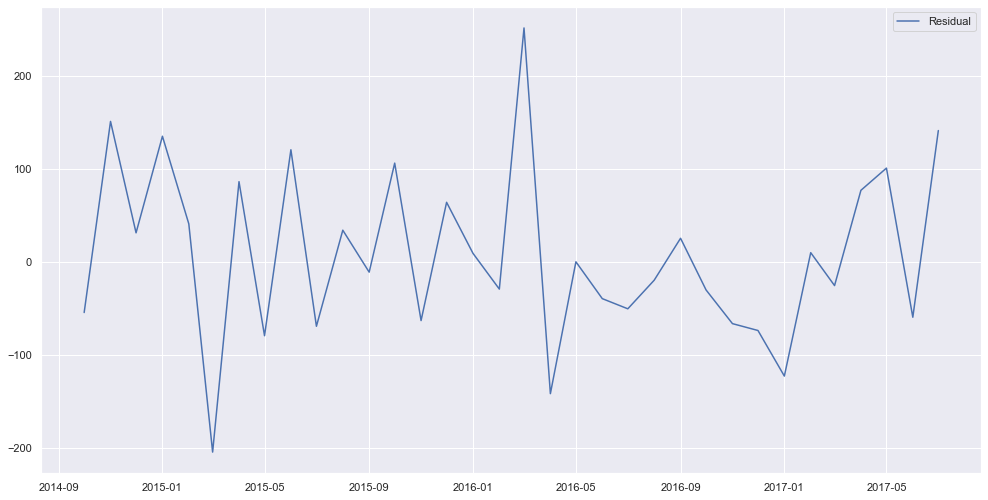

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ABC_HP)

plt.plot(sf_ts_df,label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual,label='Residual')
plt.legend(loc='best')

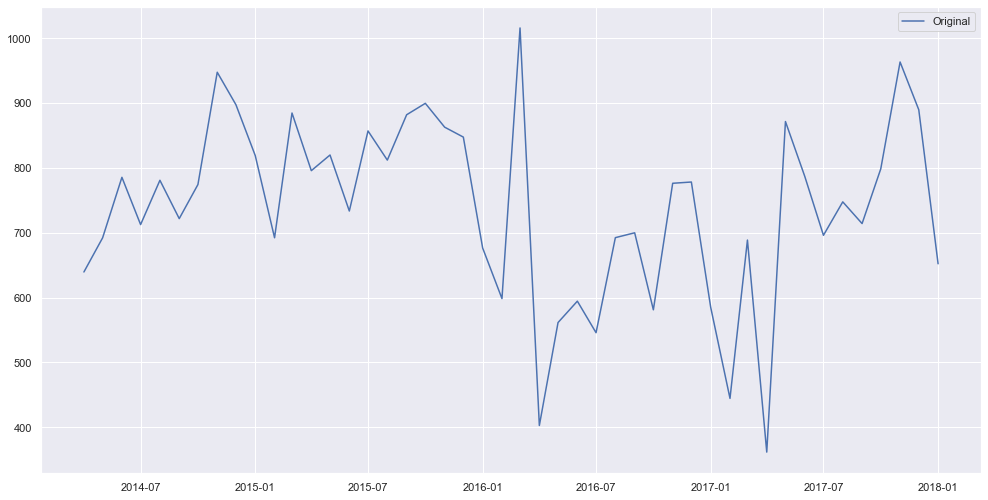

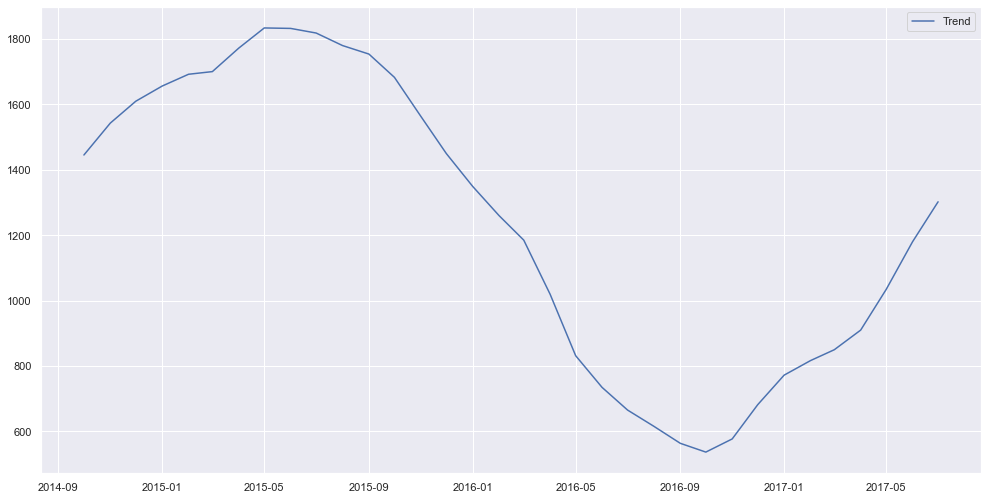

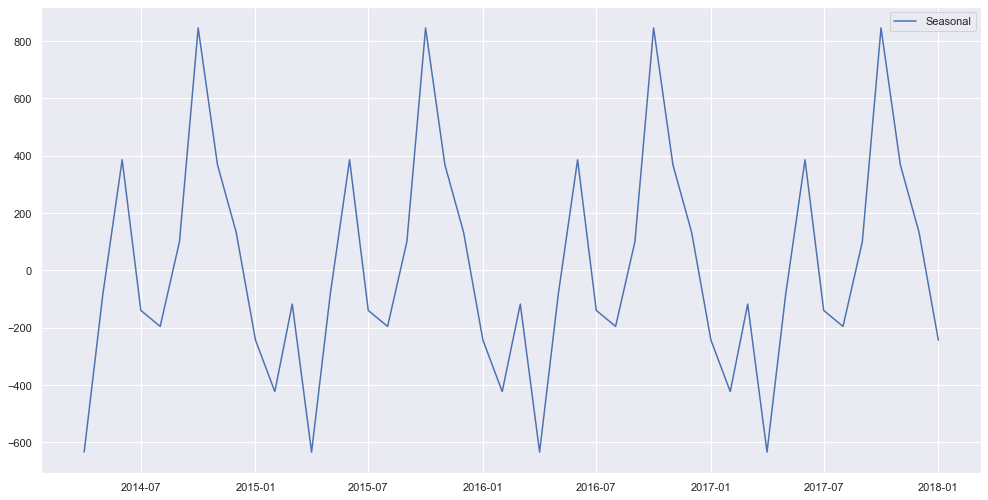

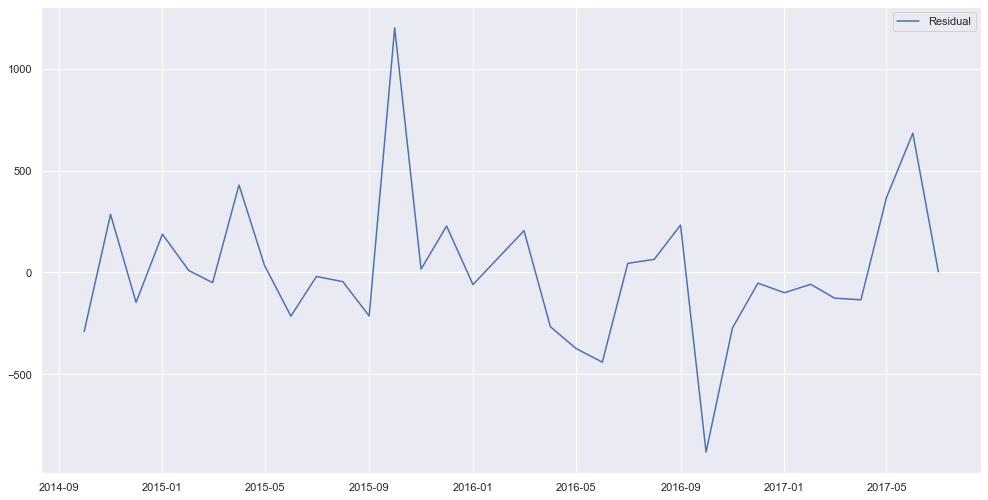

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ABC_HA)

plt.plot(sf_ts_df,label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual,label='Residual')
plt.legend(loc='best')

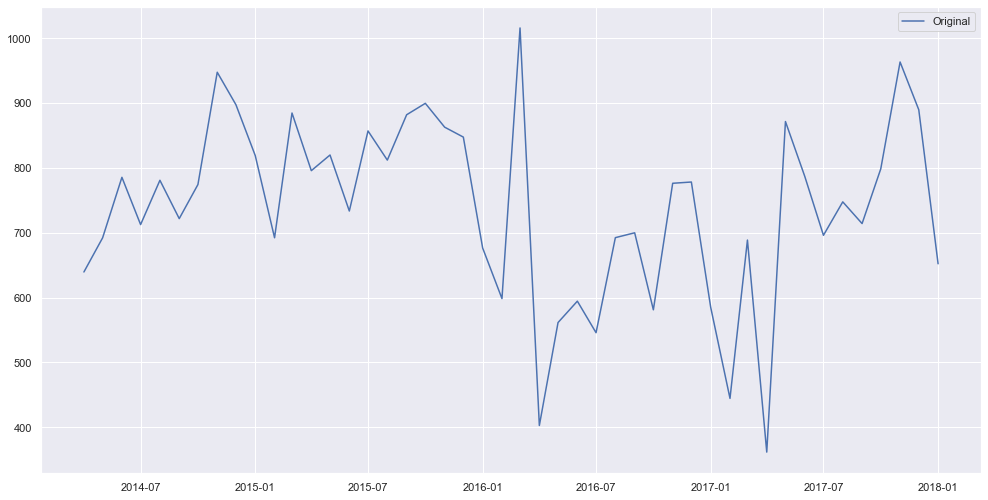

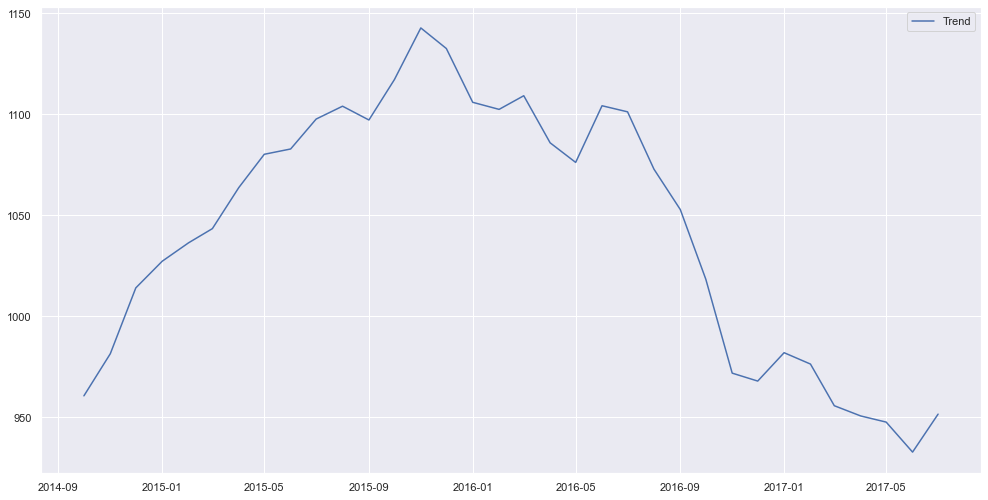

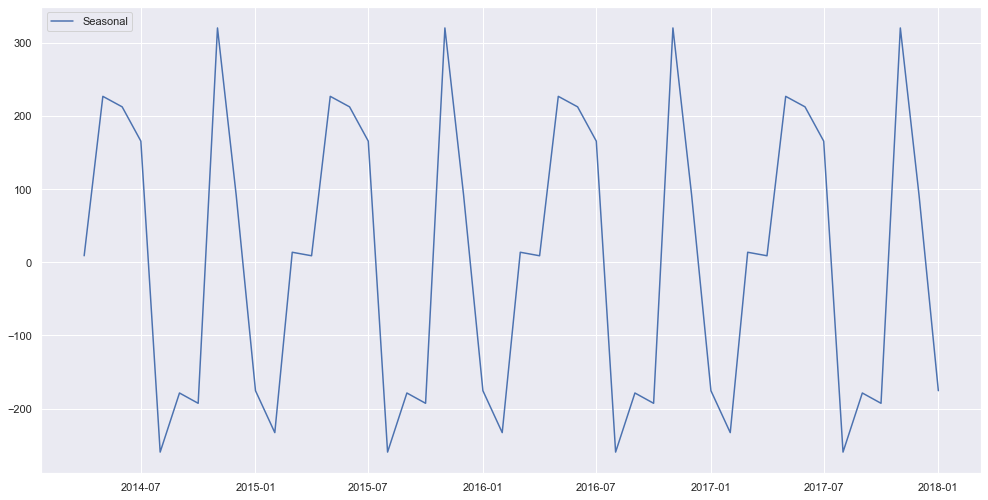

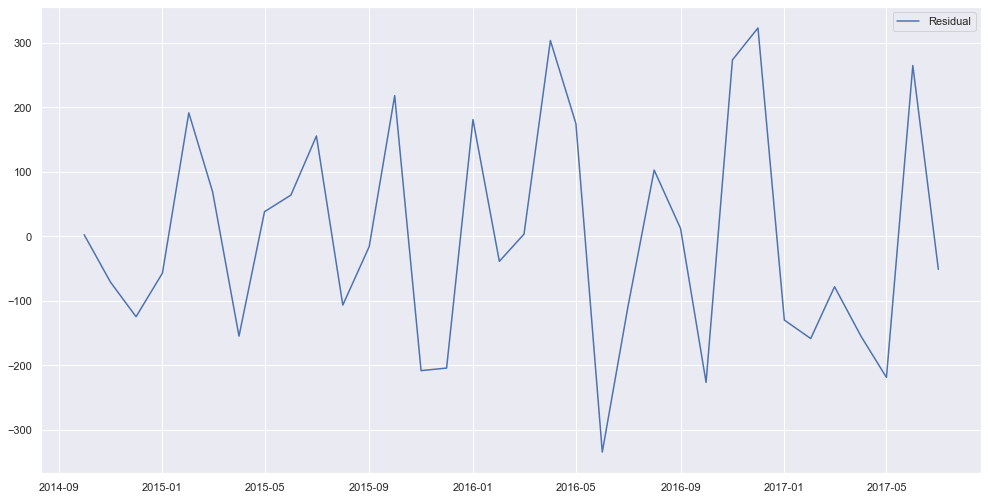

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ABC_UT)

plt.plot(sf_ts_df,label='Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

residual = decomposition.resid
plt.show()
plt.plot(residual,label='Residual')
plt.legend(loc='best')

In [70]:
ABC_UP.shape

(46, 1)

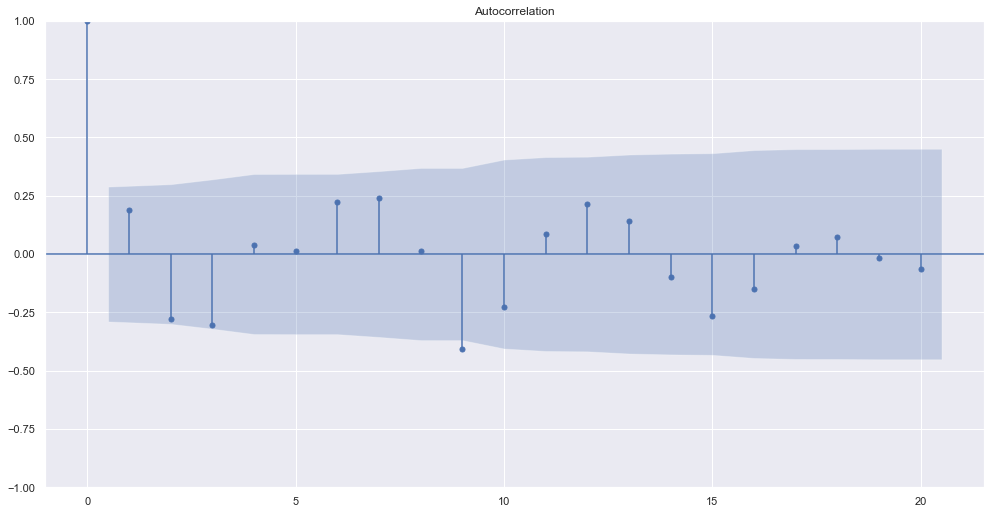

In [71]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ABC_UT,lags=20)
plt.show()

In [72]:
# Dividing the datasets into training and testing

train_UP=ABC_UP.iloc[0:34]
test_UP=ABC_UP.iloc[34:]

train_PB=ABC_PB.iloc[0:34]
test_PB=ABC_PB.iloc[34:]

train_HP=ABC_HP.iloc[0:34]
test_HP=ABC_HP.iloc[34:]

train_HA=ABC_HA.iloc[0:34]
test_HA=ABC_HA.iloc[34:]

train_UT=ABC_UT.iloc[0:34]
test_UT=ABC_UT.iloc[34:]

# Building ARIMA and SARIMA models for UP

In [73]:
train_UP

Sales(tons)
DATE                   
2014-04-01   660.625000
2014-05-01  1593.079476
2014-06-01  1978.078821
2014-07-01  2538.479155
2014-08-01  3830.933906
2014-09-01  2614.252500
2014-10-01  2458.408125
2014-11-01  4970.405625
2014-12-01  3644.532187
2015-01-01  2838.262500
2015-02-01  2332.428275
2015-03-01  5700.845625
2015-04-01  1851.711618
2015-05-01  2693.603352
2015-06-01  2537.732935
2015-07-01  3132.405925
2015-08-01  2864.210625
2015-09-01  2864.695781
2015-10-01  2294.491875
2015-11-01  3249.614063
2015-12-01  2935.531406
2016-01-01  2742.117656
2016-02-01  1879.643438
2016-03-01  7080.092344
2016-04-01   963.712742
2016-05-01  2167.770170
2016-06-01  2011.367045
2016-07-01  1969.149375
2016-08-01  2561.995313
2016-09-01  2075.745000
2016-10-01  1407.628594
2016-11-01  3151.923750
2016-12-01  2886.590250
2017-01-01  2874.163125

In [74]:
test_UP

Sales(tons)
DATE                   
2017-02-01  2018.479219
2017-03-01  4912.333969
2017-04-01   519.129844
2017-05-01  1844.698821
2017-06-01  1610.297100
2017-07-01  1923.215929
2017-08-01  2018.469375
2017-09-01  1799.250300
2017-10-01  2400.986250
2017-11-01  4115.546550
2017-12-01  3303.355050
2018-01-01  2515.909932

In [75]:
from pmdarima.arima import ARIMA

In [76]:
# d = 0 (since dataset is stationary), 12 = time period for seasonality

arimaModel_UP=ARIMA((2,0,2),(1,0,0,12)).fit(train_UP)

In [77]:
# Forecasting for the next 12 months using the trained arima model

Forecast_UP=pd.Series(arimaModel_UP.predict(12)).rename('Forecast_UP');Forecast_UP

2017-02-01    2487.434036
2017-03-01    5294.616445
2017-04-01    1853.566224
2017-05-01    2434.632268
2017-06-01    2021.168453
2017-07-01    2643.165999
2017-08-01    2437.518296
2017-09-01    2301.851473
2017-10-01    2196.744530
2017-11-01    2694.275851
2017-12-01    3101.184852
2018-01-01    2937.103719
Freq: MS, Name: Forecast_UP, dtype: float64

In [78]:
# Creating a new dataframe, by concatenating the original UP dataset and the forecasted values above

Actual_Forecast_Df_UP=pd.concat([ABC_UP,Forecast_UP],axis=1);Actual_Forecast_Df_UP

Sales(tons)  Forecast_UP
2014-04-01   660.625000          NaN
2014-05-01  1593.079476          NaN
2014-06-01  1978.078821          NaN
2014-07-01  2538.479155          NaN
2014-08-01  3830.933906          NaN
2014-09-01  2614.252500          NaN
2014-10-01  2458.408125          NaN
2014-11-01  4970.405625          NaN
2014-12-01  3644.532187          NaN
2015-01-01  2838.262500          NaN
2015-02-01  2332.428275          NaN
2015-03-01  5700.845625          NaN
2015-04-01  1851.711618          NaN
2015-05-01  2693.603352          NaN
2015-06-01  2537.732935          NaN
2015-07-01  3132.405925          NaN
2015-08-01  2864.210625          NaN
2015-09-01  2864.695781          NaN
2015-10-01  2294.491875          NaN
2015-11-01  3249.614063          NaN
2015-12-01  2935.531406          NaN
2016-01-01  2742.117656          NaN
2016-02-01  1879.643438          NaN
2016-03-01  7080.092344          NaN
2016-04-01   963.712742          NaN
2016-05-01  2167.770170          NaN
2016-06-01  2011.367045          NaN
2016-07-01  1969.149375          NaN
2016-08-01  2561.995313          NaN
2016-09-01  2075.745000          NaN
2016-10-01  1407.628594          NaN
2016-11-01  3151.923750          NaN
2016-12-01  2886.590250          NaN
2017-01-01  2874.163125          NaN
2017-02-01  2018.479219  2487.434036
2017-03-01  4912.333969  5294.616445
2017-04-01   519.129844  1853.566224
2017-05-01  1844.698821  2434.632268
2017-06-01  1610.297100  2021.168453
2017-07-01  1923.215929  2643.165999
2017-08-01  2018.469375  2437.518296
2017-09-01  1799.250300  2301.851473
2017-10-01  2400.986250  2196.744530
2017-11-01  4115.546550  2694.275851
2017-12-01  3303.355050  3101.184852
2018-01-01  2515.909932  2937.103719

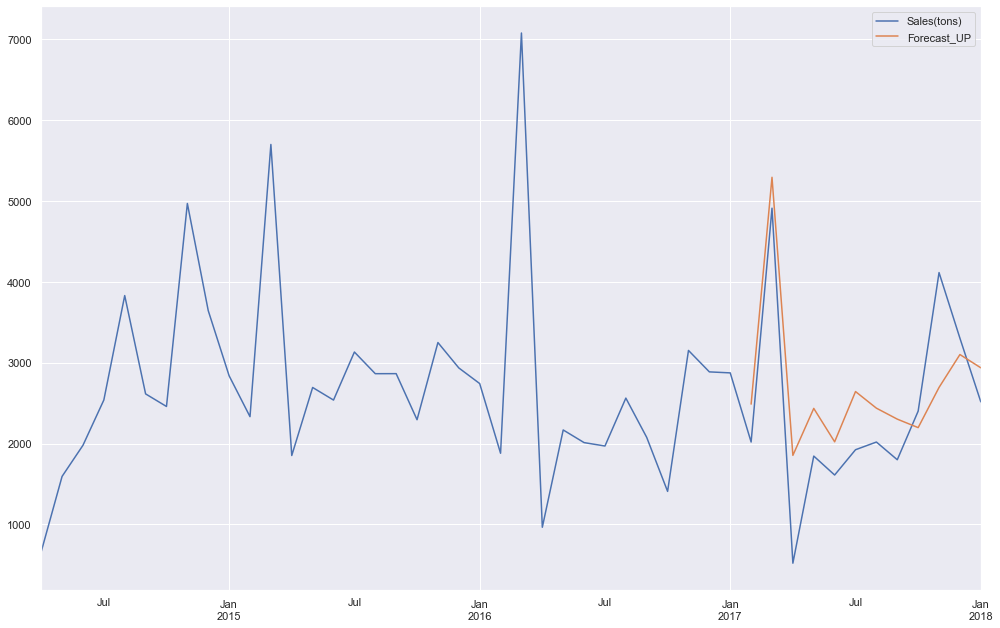

In [79]:
#plotting the actual versus forecast

Actual_Forecast_Df_UP.plot(figsize=(15, 10));plt.show()

In [80]:
# Checking the error (using negative indexing, separating the last 12 observations(forecasted values) and created a copy and stored as dataframe)

Validation_Df_UP=Actual_Forecast_Df_UP[-12:].copy()

# MAPE (original - forecast/original)*100 (%)

np.mean(abs(Validation_Df_UP['Sales(tons)']-Validation_Df_UP['Forecast_UP'])/Validation_Df_UP['Sales(tons)'])*100 

41.46619616405906

In [81]:
# RMSE ( root of mean of square of original - forecast)

np.sqrt(np.mean((Validation_Df_UP['Sales(tons)']-Validation_Df_UP['Forecast_UP'])**2))

700.6042523706187

In [82]:
from pmdarima import auto_arima

arimaModel_auto_UP=auto_arima(train_UP,m=12)

In [83]:
# p, d, q

arimaModel_auto_UP.get_params()['order']

(2, 0, 0)

In [84]:
# Seasonality (P, D, Q)

arimaModel_auto_UP.get_params()['seasonal_order']

(0, 1, 0, 12)

In [85]:
autoarima_Model2_UP=auto_arima(train_UP,trace=True,suppress_warnings=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=359.385, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=359.765, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=360.920, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=358.627, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=361.253, Time=0.09 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=361.163, Time=0.09 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=363.276, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=357.845, Time=0.10 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=359.736, Time=0.17 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=361.860, Time=0.12 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=357.495, Time=0.11 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=359.323, Time=0.22 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=359.294, Time=0.24 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

In [86]:
# Building a model using the above parameters 

arimaModel2_UP=ARIMA((2,0,0),(0,1,0,12)).fit(train_UP)

In [87]:
# Forecasting for next 12 months using above trained model

Forecast_Auto_UP=pd.Series(arimaModel2_UP.predict(12)).rename('Forecast_Auto_UP');Forecast_Auto_UP

2017-02-01    1736.586168
2017-03-01    6927.437745
2017-04-01     735.628889
2017-05-01    1921.252005
2017-06-01    1740.841700
2017-07-01    1688.652871
2017-08-01    2272.994301
2017-09-01    1782.293555
2017-10-01    1110.971221
2017-11-01    2853.404149
2017-12-01    2586.823279
2018-01-01    2573.636732
Freq: MS, Name: Forecast_Auto_UP, dtype: float64

In [88]:
# Creating a new dataframe by concatenating above forecast and original UP dataset

Actual_Forecast_Df_UP=pd.concat([ABC_UP,Forecast_Auto_UP],axis=1);Actual_Forecast_Df_UP

Sales(tons)  Forecast_Auto_UP
2014-04-01   660.625000               NaN
2014-05-01  1593.079476               NaN
2014-06-01  1978.078821               NaN
2014-07-01  2538.479155               NaN
2014-08-01  3830.933906               NaN
2014-09-01  2614.252500               NaN
2014-10-01  2458.408125               NaN
2014-11-01  4970.405625               NaN
2014-12-01  3644.532187               NaN
2015-01-01  2838.262500               NaN
2015-02-01  2332.428275               NaN
2015-03-01  5700.845625               NaN
2015-04-01  1851.711618               NaN
2015-05-01  2693.603352               NaN
2015-06-01  2537.732935               NaN
2015-07-01  3132.405925               NaN
2015-08-01  2864.210625               NaN
2015-09-01  2864.695781               NaN
2015-10-01  2294.491875               NaN
2015-11-01  3249.614063               NaN
2015-12-01  2935.531406               NaN
2016-01-01  2742.117656               NaN
2016-02-01  1879.643438               NaN
2016-03-01  7080.092344               NaN
2016-04-01   963.712742               NaN
2016-05-01  2167.770170               NaN
2016-06-01  2011.367045               NaN
2016-07-01  1969.149375               NaN
2016-08-01  2561.995313               NaN
2016-09-01  2075.745000               NaN
2016-10-01  1407.628594               NaN
2016-11-01  3151.923750               NaN
2016-12-01  2886.590250               NaN
2017-01-01  2874.163125               NaN
2017-02-01  2018.479219       1736.586168
2017-03-01  4912.333969       6927.437745
2017-04-01   519.129844        735.628889
2017-05-01  1844.698821       1921.252005
2017-06-01  1610.297100       1740.841700
2017-07-01  1923.215929       1688.652871
2017-08-01  2018.469375       2272.994301
2017-09-01  1799.250300       1782.293555
2017-10-01  2400.986250       1110.971221
2017-11-01  4115.546550       2853.404149
2017-12-01  3303.355050       2586.823279
2018-01-01  2515.909932       2573.636732

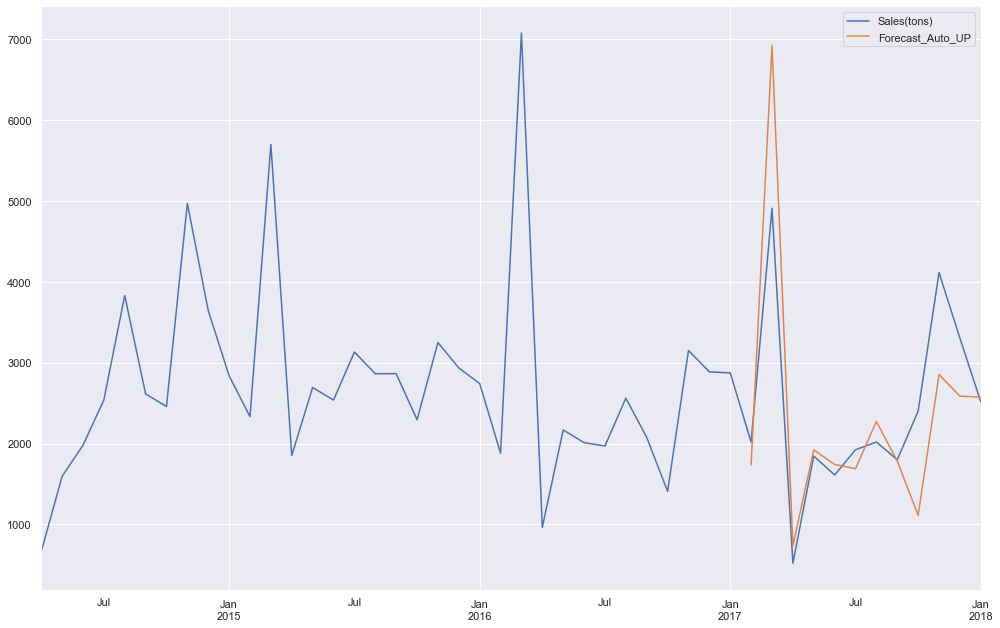

In [89]:
#plotting the actual versus forecasted

Actual_Forecast_Df_UP.plot(figsize=(15, 10));plt.show()

In [90]:
# Checking the error

Validation_Df_UP=Actual_Forecast_Df_UP[-12:].copy()

# MAPE

np.mean(abs(Validation_Df_UP['Sales(tons)']-Validation_Df_UP['Forecast_Auto_UP'])/Validation_Df_UP['Sales(tons)'])*100 

20.256521924968276

In [91]:
# RMSE

np.sqrt(np.mean((Validation_Df_UP['Sales(tons)']-Validation_Df_UP['Forecast_Auto_UP'])**2))

821.7797614825311

In [92]:
arimaModel2_UP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   34
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -174.747
Date:                            Sun, 12 Feb 2023   AIC                            357.495
Time:                                    12:59:36   BIC                            361.859
Sample:                                04-01-2014   HQIC                           358.523
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -157.7852    154.321     -1.022      0.307    -460.249     144.678
ar.L1          0.2104      0.220      0.955      0.339      -0.221       0.642
ar.L2          0.2668      0.237      1.124      0.261      -0.198       0.732
sigma2      4.893e+05   1.43e+05      3.420      0.001    2.09e+05     7.7e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.34   Prob(JB):                         0.80
Heteroskedasticity (H):               0.73   Skew:                            -0.17
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
from pmdarima.arima import ARIMA

In [94]:
# We are doing grid search to find the best optimized parameters to obtain the least MAPE and best fit for our time series model
# We are creating empty lists for each parameter, and using range means (n-1). For eg., if p = range (3), it means it uses values 0,1,2

p,d,q,P,D,Q=range(3),range(1),range(3),range(3),range(1),range(3)
pList,dList,qList,PList,DList,QList=[],[],[],[],[],[]

In [95]:
# For storing the MAPE values of the different model
mapeList=[]

In [96]:
for i in p:
    for j in d:
        for k in q:
            for l in P:
                for m in D:
                    for n in Q:
                        
                        print(i,j,k,l,m,n)
                        
                        temparima_model=ARIMA((i,j,k),(l,m,n,12)).fit(train_UP)
                        
                        Forecast=pd.Series(temparima_model.predict(12)).rename('Forecast')
                        Forecast.index=test_UP.index
                        Actual_Forecast_Df=pd.concat([ABC_UP,Forecast],axis=1)
                        Validation_df_UP=Actual_Forecast_Df[-12:].copy()
                        tempMAPE=np.mean(abs(Validation_df_UP['Sales(tons)']-Validation_df_UP['Forecast'])/Validation_df_UP['Sales(tons)'])*100
                        
                        pList.append(i)
                        dList.append(j)
                        qList.append(k)
                        PList.append(l)
                        DList.append(m)
                        QList.append(n)
                        mapeList.append(tempMAPE)
    

0 0 0 0 0 0
0 0 0 0 0 1
0 0 0 0 0 2
0 0 0 1 0 0
0 0 0 1 0 1
0 0 0 1 0 2
0 0 0 2 0 0
0 0 0 2 0 1
0 0 0 2 0 2
0 0 1 0 0 0
0 0 1 0 0 1
0 0 1 0 0 2
0 0 1 1 0 0
0 0 1 1 0 1
0 0 1 1 0 2
0 0 1 2 0 0
0 0 1 2 0 1
0 0 1 2 0 2
0 0 2 0 0 0
0 0 2 0 0 1
0 0 2 0 0 2
0 0 2 1 0 0
0 0 2 1 0 1
0 0 2 1 0 2
0 0 2 2 0 0
0 0 2 2 0 1
0 0 2 2 0 2
1 0 0 0 0 0
1 0 0 0 0 1
1 0 0 0 0 2
1 0 0 1 0 0
1 0 0 1 0 1
1 0 0 1 0 2
1 0 0 2 0 0
1 0 0 2 0 1
1 0 0 2 0 2
1 0 1 0 0 0
1 0 1 0 0 1
1 0 1 0 0 2
1 0 1 1 0 0
1 0 1 1 0 1
1 0 1 1 0 2
1 0 1 2 0 0
1 0 1 2 0 1
1 0 1 2 0 2
1 0 2 0 0 0
1 0 2 0 0 1
1 0 2 0 0 2
1 0 2 1 0 0
1 0 2 1 0 1
1 0 2 1 0 2
1 0 2 2 0 0
1 0 2 2 0 1
1 0 2 2 0 2
2 0 0 0 0 0
2 0 0 0 0 1
2 0 0 0 0 2
2 0 0 1 0 0
2 0 0 1 0 1
2 0 0 1 0 2
2 0 0 2 0 0
2 0 0 2 0 1
2 0 0 2 0 2
2 0 1 0 0 0
2 0 1 0 0 1
2 0 1 0 0 2
2 0 1 1 0 0
2 0 1 1 0 1
2 0 1 1 0 2
2 0 1 2 0 0
2 0 1 2 0 1
2 0 1 2 0 2
2 0 2 0 0 0
2 0 2 0 0 1
2 0 2 0 0 2
2 0 2 1 0 0
2 0 2 1 0 1
2 0 2 1 0 2
2 0 2 2 0 0
2 0 2 2 0 1
2 0 2 2 0 2


In [97]:
# We're creating a new dataframe, using the appended lists above (since lists are mutable)

arima_Eval_df_UP=pd.DataFrame({"p":pList,"d":dList,"q":qList,
                            "P":PList,"D":DList,"Q":QList,"MAPE":mapeList})

In [98]:
# Displaying the newly created dataframe

arima_Eval_df_UP

p  d  q  P  D  Q       MAPE
0   0  0  0  0  0  0  69.456792
1   0  0  0  0  0  1  29.946113
2   0  0  0  0  0  2  53.380145
3   0  0  0  1  0  0  73.383672
4   0  0  0  1  0  1  25.537604
.. .. .. .. .. .. ..        ...
76  2  0  2  1  0  1  31.879040
77  2  0  2  1  0  2  42.682259
78  2  0  2  2  0  0  41.813937
79  2  0  2  2  0  1  42.517702
80  2  0  2  2  0  2  39.781899

[81 rows x 7 columns]

In [99]:
# Searching for minimum MAPE

arima_Eval_df_UP['MAPE'].min()

25.53760373310005

In [100]:
# Searching for the parameters which gave the minimum MAPE

arima_Eval_df_UP[arima_Eval_df_UP['MAPE']==25.53760373310005]

p  d  q  P  D  Q       MAPE
4  0  0  0  1  0  1  25.537604

In [101]:
# Building the final SARIMA model

Final_arima_Model2_UP=ARIMA((0,0,0),(1,0,1,12)).fit(train_UP)

In [102]:
# Forecasting for next 24 months using the above trained model

Forecast_Final_UP=pd.Series(Final_arima_Model2_UP.predict(24)).rename('Forecast_Final_UP');Forecast_Final_UP

2017-02-01    2250.979544
2017-03-01    4901.589461
2017-04-01    1210.440267
2017-05-01    1993.680315
2017-06-01    2048.963671
2017-07-01    1835.857178
2017-08-01    2810.178383
2017-09-01    2089.836435
2017-10-01    1805.429123
2017-11-01    3386.291442
2017-12-01    2992.188566
2018-01-01    2877.430035
2018-02-01    2698.427309
2018-03-01    2941.997098
2018-04-01    2602.810097
2018-05-01    2674.783574
2018-06-01    2679.863671
2018-07-01    2660.280894
2018-08-01    2749.813197
2018-09-01    2683.619550
2018-10-01    2657.484800
2018-11-01    2802.753365
2018-12-01    2766.538473
2019-01-01    2755.993084
Freq: MS, Name: Forecast_Final_UP, dtype: float64

In [103]:
# Providing the index/dates for the forecasts to be done 2017 onwards

start="2017-02-01"
end="2019-01-01"

predixn_months_UP=pd.date_range(start,end,freq='MS')

Forecast_Final_UP.index=predixn_months_UP

Forecast_Final_UP

2017-02-01    2250.979544
2017-03-01    4901.589461
2017-04-01    1210.440267
2017-05-01    1993.680315
2017-06-01    2048.963671
2017-07-01    1835.857178
2017-08-01    2810.178383
2017-09-01    2089.836435
2017-10-01    1805.429123
2017-11-01    3386.291442
2017-12-01    2992.188566
2018-01-01    2877.430035
2018-02-01    2698.427309
2018-03-01    2941.997098
2018-04-01    2602.810097
2018-05-01    2674.783574
2018-06-01    2679.863671
2018-07-01    2660.280894
2018-08-01    2749.813197
2018-09-01    2683.619550
2018-10-01    2657.484800
2018-11-01    2802.753365
2018-12-01    2766.538473
2019-01-01    2755.993084
Freq: MS, Name: Forecast_Final_UP, dtype: float64

In [104]:
# Creating a newly concatenated dataframe of original ABC_UP and final forecast model

df_with_forecast_UP=pd.concat([ABC_UP,Forecast_Final_UP],axis=1);df_with_forecast_UP

Sales(tons)  Forecast_Final_UP
2014-04-01   660.625000                NaN
2014-05-01  1593.079476                NaN
2014-06-01  1978.078821                NaN
2014-07-01  2538.479155                NaN
2014-08-01  3830.933906                NaN
2014-09-01  2614.252500                NaN
2014-10-01  2458.408125                NaN
2014-11-01  4970.405625                NaN
2014-12-01  3644.532187                NaN
2015-01-01  2838.262500                NaN
2015-02-01  2332.428275                NaN
2015-03-01  5700.845625                NaN
2015-04-01  1851.711618                NaN
2015-05-01  2693.603352                NaN
2015-06-01  2537.732935                NaN
2015-07-01  3132.405925                NaN
2015-08-01  2864.210625                NaN
2015-09-01  2864.695781                NaN
2015-10-01  2294.491875                NaN
2015-11-01  3249.614063                NaN
2015-12-01  2935.531406                NaN
2016-01-01  2742.117656                NaN
2016-02-01  1879.643438                NaN
2016-03-01  7080.092344                NaN
2016-04-01   963.712742                NaN
2016-05-01  2167.770170                NaN
2016-06-01  2011.367045                NaN
2016-07-01  1969.149375                NaN
2016-08-01  2561.995313                NaN
2016-09-01  2075.745000                NaN
2016-10-01  1407.628594                NaN
2016-11-01  3151.923750                NaN
2016-12-01  2886.590250                NaN
2017-01-01  2874.163125                NaN
2017-02-01  2018.479219        2250.979544
2017-03-01  4912.333969        4901.589461
2017-04-01   519.129844        1210.440267
2017-05-01  1844.698821        1993.680315
2017-06-01  1610.297100        2048.963671
2017-07-01  1923.215929        1835.857178
2017-08-01  2018.469375        2810.178383
2017-09-01  1799.250300        2089.836435
2017-10-01  2400.986250        1805.429123
2017-11-01  4115.546550        3386.291442
2017-12-01  3303.355050        2992.188566
2018-01-01  2515.909932        2877.430035
2018-02-01          NaN        2698.427309
2018-03-01          NaN        2941.997098
2018-04-01          NaN        2602.810097
2018-05-01          NaN        2674.783574
2018-06-01          NaN        2679.863671
2018-07-01          NaN        2660.280894
2018-08-01          NaN        2749.813197
2018-09-01          NaN        2683.619550
2018-10-01          NaN        2657.484800
2018-11-01          NaN        2802.753365
2018-12-01          NaN        2766.538473
2019-01-01          NaN        2755.993084

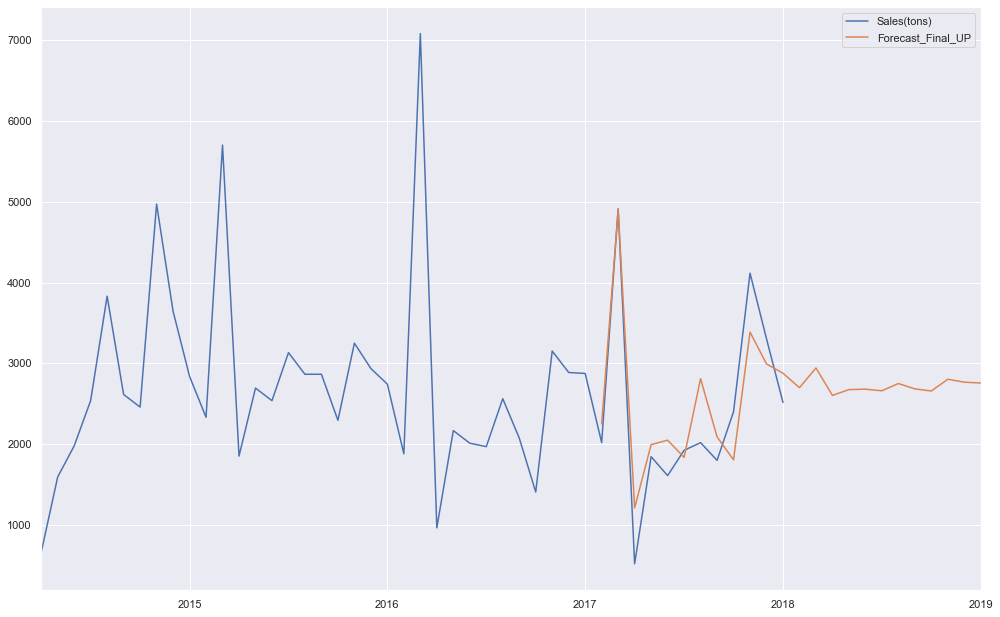

In [105]:
# Plotting the final forecasting

df_with_forecast_UP.plot(figsize=(15, 10));plt.show()

# Building ARIMA and SARIMA for PB

In [106]:
train_PB

Sales(tons)
DATE                   
2014-04-01  2270.414813
2014-05-01  2306.611687
2014-06-01  1893.663563
2014-07-01  1246.530938
2014-08-01  1871.148938
2014-09-01  1443.587063
2014-10-01  3822.322500
2014-11-01  2299.006125
2014-12-01  2477.803500
2015-01-01  1369.077188
2015-02-01  1478.214563
2015-03-01   665.287941
2015-04-01  3641.511938
2015-05-01  4993.488000
2015-06-01  2286.263813
2015-07-01  2028.376688
2015-08-01  2360.486813
2015-09-01  2414.680875
2015-10-01  5330.653875
2015-11-01  1881.221625
2015-12-01  2290.939875
2016-01-01  3171.522938
2016-02-01  1309.991062
2016-03-01  2851.934062
2016-04-01   589.259013
2016-05-01  1344.589875
2016-06-01  2078.736750
2016-07-01  1697.118750
2016-08-01  3366.474750
2016-09-01  1967.257125
2016-10-01  2600.339625
2016-11-01  2756.175187
2016-12-01  2536.984125
2017-01-01   772.770375

In [107]:
test_PB

Sales(tons)
DATE                   
2017-02-01  1900.319063
2017-03-01  2703.997688
2017-04-01   712.359474
2017-05-01  1590.158250
2017-06-01  1991.126813
2017-07-01  1236.814313
2017-08-01  2481.166688
2017-09-01  2134.445921
2017-10-01  3105.963563
2017-11-01  2785.726607
2017-12-01  1767.391071
2018-01-01  1116.022500

In [108]:
from pmdarima.arima import ARIMA

In [109]:
# d = 0 (since dataset is stationary), 12 = time period for seasonality

arimaModel_PB=ARIMA((2,0,2),(1,0,0,12)).fit(train_PB)

In [110]:
# Forecasting for the next 12 months using the trained arima model

Forecast_PB=pd.Series(arimaModel_PB.predict(12)).rename('Forecast_PB');Forecast_PB

2017-02-01    1604.243997
2017-03-01    1609.731875
2017-04-01    2369.753062
2017-05-01    2219.623553
2017-06-01    1790.488410
2017-07-01    2067.475010
2017-08-01    2483.763264
2017-09-01    2039.227446
2017-10-01    2102.602471
2017-11-01    2279.116222
2017-12-01    2208.394845
2018-01-01    1895.111536
Freq: MS, Name: Forecast_PB, dtype: float64

In [111]:
# Creating a new dataframe, by concatenating the original PB dataset and the forecasted values above

Actual_Forecast_Df_PB=pd.concat([ABC_PB,Forecast_PB],axis=1);Actual_Forecast_Df_PB

Sales(tons)  Forecast_PB
2014-04-01  2270.414813          NaN
2014-05-01  2306.611687          NaN
2014-06-01  1893.663563          NaN
2014-07-01  1246.530938          NaN
2014-08-01  1871.148938          NaN
2014-09-01  1443.587063          NaN
2014-10-01  3822.322500          NaN
2014-11-01  2299.006125          NaN
2014-12-01  2477.803500          NaN
2015-01-01  1369.077188          NaN
2015-02-01  1478.214563          NaN
2015-03-01   665.287941          NaN
2015-04-01  3641.511938          NaN
2015-05-01  4993.488000          NaN
2015-06-01  2286.263813          NaN
2015-07-01  2028.376688          NaN
2015-08-01  2360.486813          NaN
2015-09-01  2414.680875          NaN
2015-10-01  5330.653875          NaN
2015-11-01  1881.221625          NaN
2015-12-01  2290.939875          NaN
2016-01-01  3171.522938          NaN
2016-02-01  1309.991062          NaN
2016-03-01  2851.934062          NaN
2016-04-01   589.259013          NaN
2016-05-01  1344.589875          NaN
2016-06-01  2078.736750          NaN
2016-07-01  1697.118750          NaN
2016-08-01  3366.474750          NaN
2016-09-01  1967.257125          NaN
2016-10-01  2600.339625          NaN
2016-11-01  2756.175187          NaN
2016-12-01  2536.984125          NaN
2017-01-01   772.770375          NaN
2017-02-01  1900.319063  1604.243997
2017-03-01  2703.997688  1609.731875
2017-04-01   712.359474  2369.753062
2017-05-01  1590.158250  2219.623553
2017-06-01  1991.126813  1790.488410
2017-07-01  1236.814313  2067.475010
2017-08-01  2481.166688  2483.763264
2017-09-01  2134.445921  2039.227446
2017-10-01  3105.963563  2102.602471
2017-11-01  2785.726607  2279.116222
2017-12-01  1767.391071  2208.394845
2018-01-01  1116.022500  1895.111536

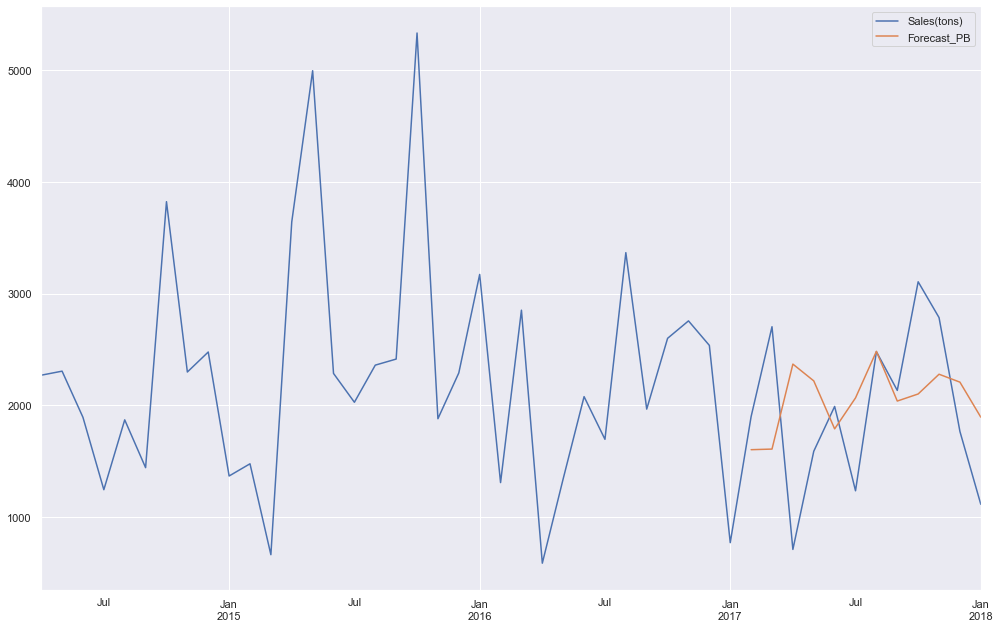

In [112]:
# Plotting the actual versus forecasted

Actual_Forecast_Df_PB.plot(figsize=(15, 10));plt.show()

In [113]:
# Checking the error (using negative indexing, separating the last 12 observations(forecasted values) and created a copy and stored as dataframe)

Validation_Df_PB=Actual_Forecast_Df_PB[-12:].copy()

# MAPE (original - forecast/original)*100 (%)

np.mean(abs(Validation_Df_PB['Sales(tons)']-Validation_Df_PB['Forecast_PB'])/Validation_Df_PB['Sales(tons)'])*100 

46.27932654696269

In [114]:
# RMSE ( root of mean of square of original - forecast)

np.sqrt(np.mean((Validation_Df_PB['Sales(tons)']-Validation_Df_PB['Forecast_PB'])**2))

776.3394912147721

In [115]:
from pmdarima import auto_arima

arimaModel_auto_PB=auto_arima(train_PB,m=12)

In [116]:
# p, d, q

arimaModel_auto_PB.get_params()['order']

(0, 0, 0)

In [117]:
# Seasonality (P, D, Q)

arimaModel_auto_PB.get_params()['seasonal_order']

(0, 0, 0, 12)

In [118]:
# Building a model using above parameters and fitting to our training dataset

arimaModel2_PB=ARIMA((0,0,0),(0,0,0,12)).fit(train_PB)

In [119]:
# Forecasting for next 12 months using above trained model

Forecast_Auto_PB=pd.Series(arimaModel2_PB.predict(12)).rename('Forecast_Auto_PB');Forecast_Auto_PB

2017-02-01    2276.895469
2017-03-01    2276.895469
2017-04-01    2276.895469
2017-05-01    2276.895469
2017-06-01    2276.895469
2017-07-01    2276.895469
2017-08-01    2276.895469
2017-09-01    2276.895469
2017-10-01    2276.895469
2017-11-01    2276.895469
2017-12-01    2276.895469
2018-01-01    2276.895469
Freq: MS, Name: Forecast_Auto_PB, dtype: float64

In [120]:
# Creating a new dataframe by concatenating above forecast and original PB dataset

Actual_Forecast_Df_PB=pd.concat([ABC_PB,Forecast_Auto_PB],axis=1);Actual_Forecast_Df_PB

Sales(tons)  Forecast_Auto_PB
2014-04-01  2270.414813               NaN
2014-05-01  2306.611687               NaN
2014-06-01  1893.663563               NaN
2014-07-01  1246.530938               NaN
2014-08-01  1871.148938               NaN
2014-09-01  1443.587063               NaN
2014-10-01  3822.322500               NaN
2014-11-01  2299.006125               NaN
2014-12-01  2477.803500               NaN
2015-01-01  1369.077188               NaN
2015-02-01  1478.214563               NaN
2015-03-01   665.287941               NaN
2015-04-01  3641.511938               NaN
2015-05-01  4993.488000               NaN
2015-06-01  2286.263813               NaN
2015-07-01  2028.376688               NaN
2015-08-01  2360.486813               NaN
2015-09-01  2414.680875               NaN
2015-10-01  5330.653875               NaN
2015-11-01  1881.221625               NaN
2015-12-01  2290.939875               NaN
2016-01-01  3171.522938               NaN
2016-02-01  1309.991062               NaN
2016-03-01  2851.934062               NaN
2016-04-01   589.259013               NaN
2016-05-01  1344.589875               NaN
2016-06-01  2078.736750               NaN
2016-07-01  1697.118750               NaN
2016-08-01  3366.474750               NaN
2016-09-01  1967.257125               NaN
2016-10-01  2600.339625               NaN
2016-11-01  2756.175187               NaN
2016-12-01  2536.984125               NaN
2017-01-01   772.770375               NaN
2017-02-01  1900.319063       2276.895469
2017-03-01  2703.997688       2276.895469
2017-04-01   712.359474       2276.895469
2017-05-01  1590.158250       2276.895469
2017-06-01  1991.126813       2276.895469
2017-07-01  1236.814313       2276.895469
2017-08-01  2481.166688       2276.895469
2017-09-01  2134.445921       2276.895469
2017-10-01  3105.963563       2276.895469
2017-11-01  2785.726607       2276.895469
2017-12-01  1767.391071       2276.895469
2018-01-01  1116.022500       2276.895469

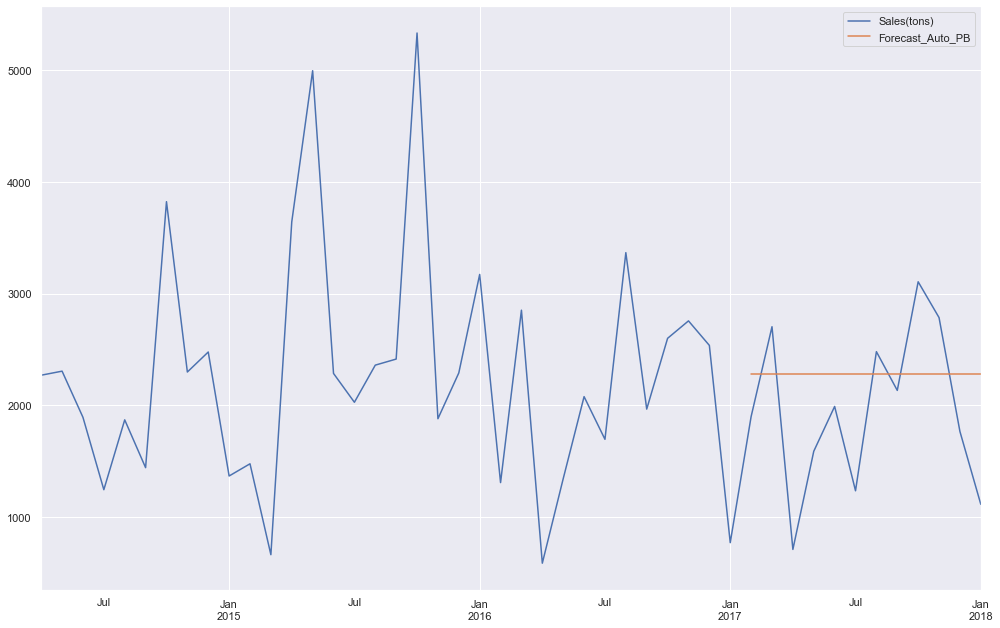

In [121]:
#plotting the actual versus forecasted

Actual_Forecast_Df_PB.plot(figsize=(15, 10));plt.show()

In [122]:
# Checking the error (using negative indexing, separating the last 12 observations(forecasted values) and created a copy and stored as dataframe)

Validation_Df_PB=Actual_Forecast_Df_PB[-12:].copy()

# MAPE (original - forecast/original)*100 (%)

np.mean(abs(Validation_Df_PB['Sales(tons)']-Validation_Df_PB['Forecast_Auto_PB'])/Validation_Df_PB['Sales(tons)'])*100 

49.131947971158134

In [123]:
# RMSE ( root of mean of square of original - forecast)

np.sqrt(np.mean((Validation_Df_PB['Sales(tons)']-Validation_Df_PB['Forecast_Auto_PB'])**2))

764.9913909703704

In [124]:
arimaModel2_PB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   34
Model:                        SARIMAX   Log Likelihood                -284.762
Date:                Sun, 12 Feb 2023   AIC                            573.524
Time:                        13:00:06   BIC                            576.577
Sample:                    04-01-2014   HQIC                           574.565
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2276.8955    216.524     10.516      0.000    1852.515    2701.276
sigma2      1.102e+06   2.51e+05      4.399      0.000    6.11e+05    1.59e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 8.13
Prob(Q):                              0.90   Prob(JB):                         0.02
Heteroskedasticity (H):               1.40   Skew:                             1.01
Prob(H) (two-sided):                  0.58   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
from pmdarima.arima import ARIMA

In [126]:
# We are doing grid search to find the best optimized parameters to obtain the least MAPE and best fit for our time series model
# We are creating empty lists for each parameter, and using range means (n-1). For eg., if p = range (3), it means it uses values 0,1,2

p,d,q,P,D,Q=range(3),range(1),range(3),range(3),range(1),range(3)
pList,dList,qList,PList,DList,QList=[],[],[],[],[],[]

In [127]:
# For storing the MAPE values of the different model
mapeList=[]

In [128]:
for i in p:
    for j in d:
        for k in q:
            for l in P:
                for m in D:
                    for n in Q:
                        
                        print(i,j,k,l,m,n)
                        
                        temparima_model=ARIMA((i,j,k),(l,m,n,12)).fit(train_PB)
                        
                        Forecast=pd.Series(temparima_model.predict(12)).rename('Forecast')
                        Forecast.index=test_PB.index
                        Actual_Forecast_Df=pd.concat([ABC_PB,Forecast],axis=1)
                        Validation_df_PB=Actual_Forecast_Df[-12:].copy()
                        tempMAPE=np.mean(abs(Validation_df_PB['Sales(tons)']-Validation_df_PB['Forecast'])/Validation_df_PB['Sales(tons)'])*100
                        
                        pList.append(i)
                        dList.append(j)
                        qList.append(k)
                        PList.append(l)
                        DList.append(m)
                        QList.append(n)
                        mapeList.append(tempMAPE)
    

0 0 0 0 0 0
0 0 0 0 0 1
0 0 0 0 0 2
0 0 0 1 0 0
0 0 0 1 0 1
0 0 0 1 0 2
0 0 0 2 0 0
0 0 0 2 0 1
0 0 0 2 0 2
0 0 1 0 0 0
0 0 1 0 0 1
0 0 1 0 0 2
0 0 1 1 0 0
0 0 1 1 0 1
0 0 1 1 0 2
0 0 1 2 0 0
0 0 1 2 0 1
0 0 1 2 0 2
0 0 2 0 0 0
0 0 2 0 0 1
0 0 2 0 0 2
0 0 2 1 0 0
0 0 2 1 0 1
0 0 2 1 0 2
0 0 2 2 0 0
0 0 2 2 0 1
0 0 2 2 0 2
1 0 0 0 0 0
1 0 0 0 0 1
1 0 0 0 0 2
1 0 0 1 0 0
1 0 0 1 0 1
1 0 0 1 0 2
1 0 0 2 0 0
1 0 0 2 0 1
1 0 0 2 0 2
1 0 1 0 0 0
1 0 1 0 0 1
1 0 1 0 0 2
1 0 1 1 0 0
1 0 1 1 0 1
1 0 1 1 0 2
1 0 1 2 0 0
1 0 1 2 0 1
1 0 1 2 0 2
1 0 2 0 0 0
1 0 2 0 0 1
1 0 2 0 0 2
1 0 2 1 0 0
1 0 2 1 0 1
1 0 2 1 0 2
1 0 2 2 0 0
1 0 2 2 0 1
1 0 2 2 0 2
2 0 0 0 0 0
2 0 0 0 0 1
2 0 0 0 0 2
2 0 0 1 0 0
2 0 0 1 0 1
2 0 0 1 0 2
2 0 0 2 0 0
2 0 0 2 0 1
2 0 0 2 0 2
2 0 1 0 0 0
2 0 1 0 0 1
2 0 1 0 0 2
2 0 1 1 0 0
2 0 1 1 0 1
2 0 1 1 0 2
2 0 1 2 0 0
2 0 1 2 0 1
2 0 1 2 0 2
2 0 2 0 0 0
2 0 2 0 0 1
2 0 2 0 0 2
2 0 2 1 0 0
2 0 2 1 0 1
2 0 2 1 0 2
2 0 2 2 0 0
2 0 2 2 0 1
2 0 2 2 0 2


In [129]:
# We're creating a new dataframe, using the appended lists above (since lists are mutable)

arima_Eval_df_PB=pd.DataFrame({"p":pList,"d":dList,"q":qList,
                            "P":PList,"D":DList,"Q":QList,"MAPE":mapeList})

In [130]:
# Displaying the newly created dataframe

arima_Eval_df_PB

p  d  q  P  D  Q       MAPE
0   0  0  0  0  0  0  49.131948
1   0  0  0  0  0  1  50.868789
2   0  0  0  0  0  2  71.247303
3   0  0  0  1  0  0  48.975967
4   0  0  0  1  0  1  51.169903
.. .. .. .. .. .. ..        ...
76  2  0  2  1  0  1  51.871505
77  2  0  2  1  0  2  57.817619
78  2  0  2  2  0  0  69.227266
79  2  0  2  2  0  1  61.805960
80  2  0  2  2  0  2  63.201893

[81 rows x 7 columns]

In [131]:
# Searching for minimum MAPE

arima_Eval_df_PB['MAPE'].min()

46.27932654696269

In [132]:
# Searching for the parameters which gave the minimum MAPE

arima_Eval_df_PB[arima_Eval_df_PB['MAPE']==46.27932654696269]

p  d  q  P  D  Q       MAPE
75  2  0  2  1  0  0  46.279327

In [133]:
# Building the final SARIMA model

Final_arima_Model2_PB=ARIMA((2,0,2),(1,0,0,12)).fit(train_PB)

In [134]:
# Forecasting for next 24 months using the above trained model

Forecast_Final_PB=pd.Series(Final_arima_Model2_PB.predict(24)).rename('Forecast_Final_PB');Forecast_Final_PB

2017-02-01    1604.243997
2017-03-01    1609.731875
2017-04-01    2369.753062
2017-05-01    2219.623553
2017-06-01    1790.488410
2017-07-01    2067.475010
2017-08-01    2483.763264
2017-09-01    2039.227446
2017-10-01    2102.602471
2017-11-01    2279.116222
2017-12-01    2208.394845
2018-01-01    1895.111536
2018-02-01    2057.111592
2018-03-01    2084.221934
2018-04-01    2148.609790
2018-05-01    2126.308174
2018-06-01    2091.171161
2018-07-01    2121.834178
2018-08-01    2167.120374
2018-09-01    2114.813820
2018-10-01    2126.965556
2018-11-01    2145.113112
2018-12-01    2135.448140
2019-01-01    2096.542584
Freq: MS, Name: Forecast_Final_PB, dtype: float64

In [135]:
# Providing the index/dates for the forecasts to be done 2017 onwards

start="2017-02-01"
end="2019-01-01"

predixn_months_PB=pd.date_range(start,end,freq='MS')

Forecast_Final_PB.index=predixn_months_PB

Forecast_Final_PB

2017-02-01    1604.243997
2017-03-01    1609.731875
2017-04-01    2369.753062
2017-05-01    2219.623553
2017-06-01    1790.488410
2017-07-01    2067.475010
2017-08-01    2483.763264
2017-09-01    2039.227446
2017-10-01    2102.602471
2017-11-01    2279.116222
2017-12-01    2208.394845
2018-01-01    1895.111536
2018-02-01    2057.111592
2018-03-01    2084.221934
2018-04-01    2148.609790
2018-05-01    2126.308174
2018-06-01    2091.171161
2018-07-01    2121.834178
2018-08-01    2167.120374
2018-09-01    2114.813820
2018-10-01    2126.965556
2018-11-01    2145.113112
2018-12-01    2135.448140
2019-01-01    2096.542584
Freq: MS, Name: Forecast_Final_PB, dtype: float64

In [136]:
# Creating a newly concatenated dataframe of original ABC_PB and final forecast model

df_with_forecast_PB=pd.concat([ABC_PB,Forecast_Final_PB],axis=1);df_with_forecast_PB

Sales(tons)  Forecast_Final_PB
2014-04-01  2270.414813                NaN
2014-05-01  2306.611687                NaN
2014-06-01  1893.663563                NaN
2014-07-01  1246.530938                NaN
2014-08-01  1871.148938                NaN
2014-09-01  1443.587063                NaN
2014-10-01  3822.322500                NaN
2014-11-01  2299.006125                NaN
2014-12-01  2477.803500                NaN
2015-01-01  1369.077188                NaN
2015-02-01  1478.214563                NaN
2015-03-01   665.287941                NaN
2015-04-01  3641.511938                NaN
2015-05-01  4993.488000                NaN
2015-06-01  2286.263813                NaN
2015-07-01  2028.376688                NaN
2015-08-01  2360.486813                NaN
2015-09-01  2414.680875                NaN
2015-10-01  5330.653875                NaN
2015-11-01  1881.221625                NaN
2015-12-01  2290.939875                NaN
2016-01-01  3171.522938                NaN
2016-02-01  1309.991062                NaN
2016-03-01  2851.934062                NaN
2016-04-01   589.259013                NaN
2016-05-01  1344.589875                NaN
2016-06-01  2078.736750                NaN
2016-07-01  1697.118750                NaN
2016-08-01  3366.474750                NaN
2016-09-01  1967.257125                NaN
2016-10-01  2600.339625                NaN
2016-11-01  2756.175187                NaN
2016-12-01  2536.984125                NaN
2017-01-01   772.770375                NaN
2017-02-01  1900.319063        1604.243997
2017-03-01  2703.997688        1609.731875
2017-04-01   712.359474        2369.753062
2017-05-01  1590.158250        2219.623553
2017-06-01  1991.126813        1790.488410
2017-07-01  1236.814313        2067.475010
2017-08-01  2481.166688        2483.763264
2017-09-01  2134.445921        2039.227446
2017-10-01  3105.963563        2102.602471
2017-11-01  2785.726607        2279.116222
2017-12-01  1767.391071        2208.394845
2018-01-01  1116.022500        1895.111536
2018-02-01          NaN        2057.111592
2018-03-01          NaN        2084.221934
2018-04-01          NaN        2148.609790
2018-05-01          NaN        2126.308174
2018-06-01          NaN        2091.171161
2018-07-01          NaN        2121.834178
2018-08-01          NaN        2167.120374
2018-09-01          NaN        2114.813820
2018-10-01          NaN        2126.965556
2018-11-01          NaN        2145.113112
2018-12-01          NaN        2135.448140
2019-01-01          NaN        2096.542584

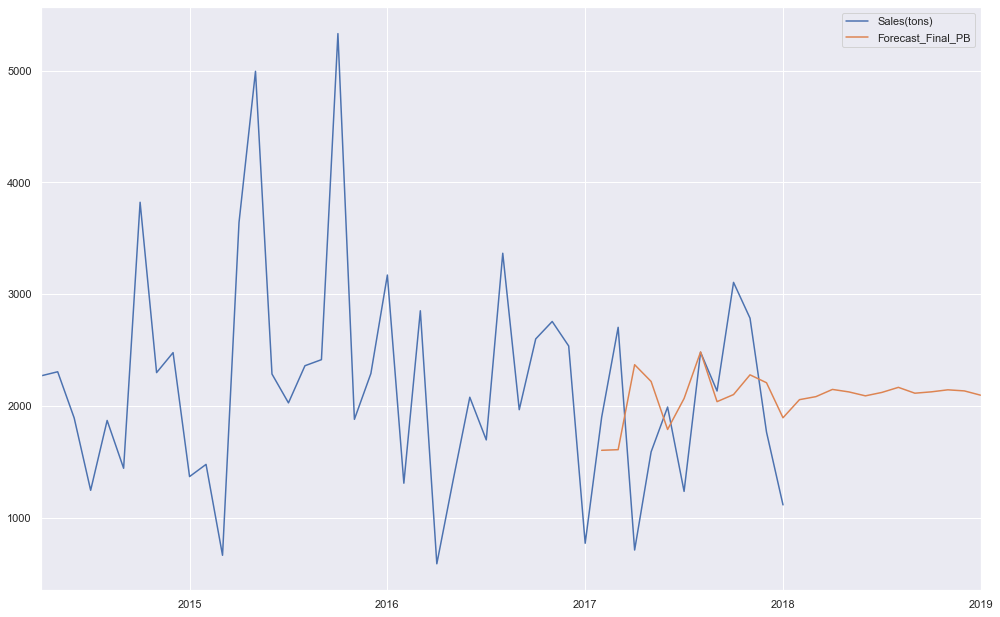

In [137]:
# Plotting the final forecasting

df_with_forecast_PB.plot(figsize=(15, 10));plt.show()

# ARIMA and SARIMA for HP 

In [138]:
train_HP

Sales(tons)
DATE                   
2014-04-01   217.805625
2014-05-01   278.430000
2014-06-01   378.320625
2014-07-01   400.267500
2014-08-01   187.396875
2014-09-01     8.268750
2014-10-01   288.059063
2014-11-01   516.706875
2014-12-01   381.448636
2015-01-01   488.583409
2015-02-01   308.613375
2015-03-01    99.866250
2015-04-01   377.791364
2015-05-01   186.435000
2015-06-01   442.344375
2015-07-01   302.639063
2015-08-01   320.692500
2015-09-01   336.600000
2015-10-01   484.680682
2015-11-01   319.928523
2015-12-01   417.730500
2016-01-01   349.005682
2016-02-01   207.957375
2016-03-01   489.706364
2016-04-01    41.405294
2016-05-01   135.080270
2016-06-01   138.039955
2016-07-01   157.706379
2016-08-01    99.414375
2016-09-01   175.549632
2016-10-01   140.204198
2016-11-01   134.227969
2016-12-01   116.022447
2017-01-01    83.703214

In [139]:
test_HP

Sales(tons)
DATE                   
2017-02-01   140.747655
2017-03-01   128.620086
2017-04-01   197.427375
2017-05-01   210.467813
2017-06-01   148.714773
2017-07-01   431.871750
2017-08-01   108.894375
2017-09-01   311.568750
2017-10-01    25.629750
2017-11-01   609.917727
2017-12-01   494.744318
2018-01-01   387.261000

In [140]:
from pmdarima.arima import ARIMA

In [141]:
# d = 0 (since dataset is stationary), 12 = time period for seasonality

arimaModel_HP=ARIMA((2,0,2),(1,0,0,12)).fit(train_HP)

In [142]:
# Forecasting for the next 12 months using the trained arima model

Forecast_HP=pd.Series(arimaModel_HP.predict(12)).rename('Forecast_HP');Forecast_HP

2017-02-01    208.547867
2017-03-01    157.892385
2017-04-01    277.120763
2017-05-01    269.117350
2017-06-01    266.926504
2017-07-01    273.455277
2017-08-01    287.601916
2017-09-01    275.356717
2017-10-01    283.457041
2017-11-01    290.721113
2017-12-01    294.408908
2018-01-01    307.010130
Freq: MS, Name: Forecast_HP, dtype: float64

In [143]:
# Creating a new dataframe, by concatenating the original HP dataset and the forecasted values above

Actual_Forecast_Df_HP=pd.concat([ABC_HP,Forecast_HP],axis=1);Actual_Forecast_Df_HP

Sales(tons)  Forecast_HP
2014-04-01   217.805625          NaN
2014-05-01   278.430000          NaN
2014-06-01   378.320625          NaN
2014-07-01   400.267500          NaN
2014-08-01   187.396875          NaN
2014-09-01     8.268750          NaN
2014-10-01   288.059063          NaN
2014-11-01   516.706875          NaN
2014-12-01   381.448636          NaN
2015-01-01   488.583409          NaN
2015-02-01   308.613375          NaN
2015-03-01    99.866250          NaN
2015-04-01   377.791364          NaN
2015-05-01   186.435000          NaN
2015-06-01   442.344375          NaN
2015-07-01   302.639063          NaN
2015-08-01   320.692500          NaN
2015-09-01   336.600000          NaN
2015-10-01   484.680682          NaN
2015-11-01   319.928523          NaN
2015-12-01   417.730500          NaN
2016-01-01   349.005682          NaN
2016-02-01   207.957375          NaN
2016-03-01   489.706364          NaN
2016-04-01    41.405294          NaN
2016-05-01   135.080270          NaN
2016-06-01   138.039955          NaN
2016-07-01   157.706379          NaN
2016-08-01    99.414375          NaN
2016-09-01   175.549632          NaN
2016-10-01   140.204198          NaN
2016-11-01   134.227969          NaN
2016-12-01   116.022447          NaN
2017-01-01    83.703214          NaN
2017-02-01   140.747655   208.547867
2017-03-01   128.620086   157.892385
2017-04-01   197.427375   277.120763
2017-05-01   210.467813   269.117350
2017-06-01   148.714773   266.926504
2017-07-01   431.871750   273.455277
2017-08-01   108.894375   287.601916
2017-09-01   311.568750   275.356717
2017-10-01    25.629750   283.457041
2017-11-01   609.917727   290.721113
2017-12-01   494.744318   294.408908
2018-01-01   387.261000   307.010130

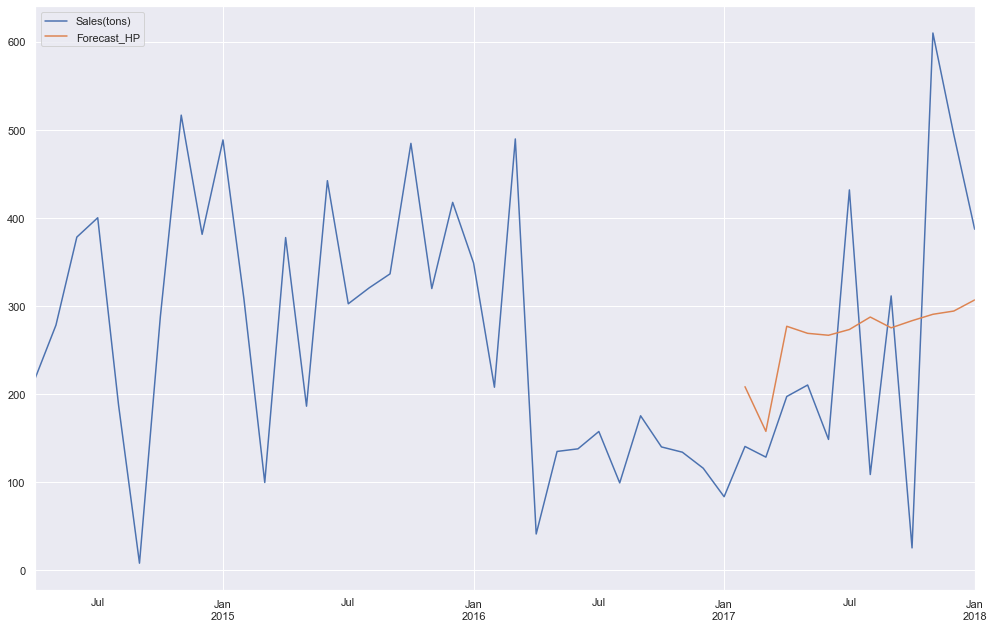

In [144]:
#plotting the actual versus forecasted

Actual_Forecast_Df_HP.plot(figsize=(15, 10));plt.show()

In [145]:
# Checking the error (using negative indexing, separating the last 12 observations(forecasted values) and created a copy and stored as dataframe)

Validation_Df_HP=Actual_Forecast_Df_HP[-12:].copy()

# MAPE (original - forecast/original)*100 (%)

np.mean(abs(Validation_Df_HP['Sales(tons)']-Validation_Df_HP['Forecast_HP'])/Validation_Df_HP['Sales(tons)'])*100 

129.21538609117573

In [146]:
# RMSE ( root of mean of square of original - forecast)

np.sqrt(np.mean((Validation_Df_HP['Sales(tons)']-Validation_Df_HP['Forecast_HP'])**2))

158.77077264344507

In [147]:
from pmdarima import auto_arima

arimaModel_auto_HP=auto_arima(train_HP,m=12)

In [148]:
# p, d, q

arimaModel_auto_HP.get_params()['order']

(1, 0, 0)

In [149]:
# Seasonality (P, D, Q)

arimaModel_auto_HP.get_params()['seasonal_order']

(0, 0, 1, 12)

In [150]:
# Building a model using above parameters and fitting to our training dataset

arimaModel2_HP=ARIMA((1,0,0),(0,0,1,12)).fit(train_HP)

In [151]:
# Forecasting for next 12 months using above trained model

Forecast_Auto_HP=pd.Series(arimaModel2_HP.predict(12)).rename('Forecast_Auto_HP');Forecast_Auto_HP

2017-02-01    257.821631
2017-03-01    190.627372
2017-04-01    355.221348
2017-05-01    349.214454
2017-06-01    285.560568
2017-07-01    304.540265
2017-08-01    345.691365
2017-09-01    321.368403
2017-10-01    283.232494
2017-11-01    302.336917
2017-12-01    301.181240
2018-01-01    322.211107
Freq: MS, Name: Forecast_Auto_HP, dtype: float64

In [152]:
# Creating a new dataframe by concatenating above forecast and original HP dataset

Actual_Forecast_Df_HP=pd.concat([ABC_HP,Forecast_Auto_HP],axis=1);Actual_Forecast_Df_HP

Sales(tons)  Forecast_Auto_HP
2014-04-01   217.805625               NaN
2014-05-01   278.430000               NaN
2014-06-01   378.320625               NaN
2014-07-01   400.267500               NaN
2014-08-01   187.396875               NaN
2014-09-01     8.268750               NaN
2014-10-01   288.059063               NaN
2014-11-01   516.706875               NaN
2014-12-01   381.448636               NaN
2015-01-01   488.583409               NaN
2015-02-01   308.613375               NaN
2015-03-01    99.866250               NaN
2015-04-01   377.791364               NaN
2015-05-01   186.435000               NaN
2015-06-01   442.344375               NaN
2015-07-01   302.639063               NaN
2015-08-01   320.692500               NaN
2015-09-01   336.600000               NaN
2015-10-01   484.680682               NaN
2015-11-01   319.928523               NaN
2015-12-01   417.730500               NaN
2016-01-01   349.005682               NaN
2016-02-01   207.957375               NaN
2016-03-01   489.706364               NaN
2016-04-01    41.405294               NaN
2016-05-01   135.080270               NaN
2016-06-01   138.039955               NaN
2016-07-01   157.706379               NaN
2016-08-01    99.414375               NaN
2016-09-01   175.549632               NaN
2016-10-01   140.204198               NaN
2016-11-01   134.227969               NaN
2016-12-01   116.022447               NaN
2017-01-01    83.703214               NaN
2017-02-01   140.747655        257.821631
2017-03-01   128.620086        190.627372
2017-04-01   197.427375        355.221348
2017-05-01   210.467813        349.214454
2017-06-01   148.714773        285.560568
2017-07-01   431.871750        304.540265
2017-08-01   108.894375        345.691365
2017-09-01   311.568750        321.368403
2017-10-01    25.629750        283.232494
2017-11-01   609.917727        302.336917
2017-12-01   494.744318        301.181240
2018-01-01   387.261000        322.211107

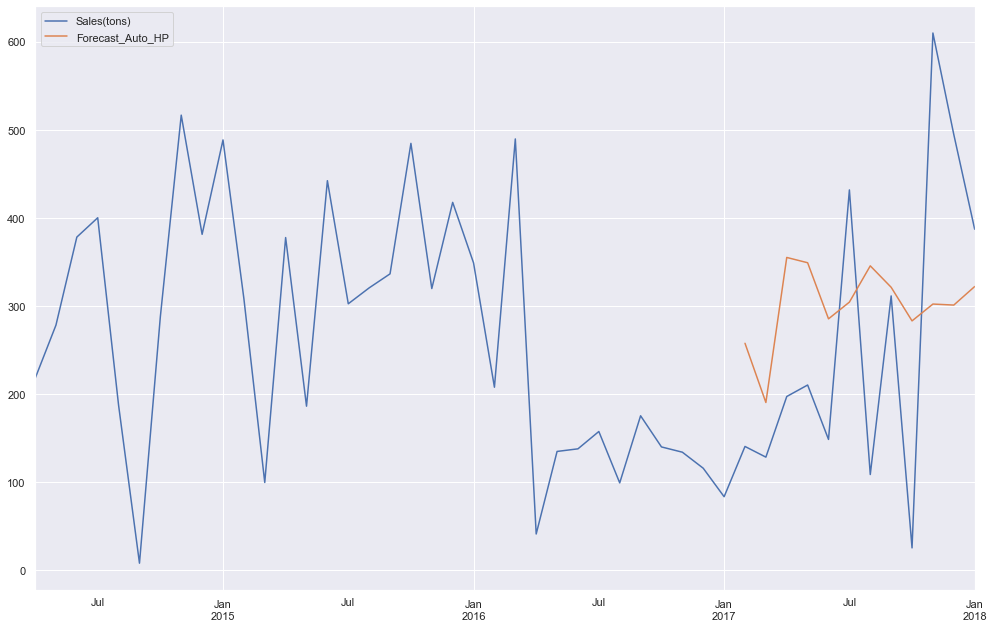

In [153]:
# Plotting the actual versus forecasted

Actual_Forecast_Df_HP.plot(figsize=(15, 10));plt.show()

In [154]:
# Checking the error (using negative indexing, separating the last 12 observations(forecasted values) and created a copy and stored as dataframe)

Validation_Df_HP=Actual_Forecast_Df_HP[-12:].copy()

#  MAPE (original - forecast/original)*100 (%)

np.mean(abs(Validation_Df_HP['Sales(tons)']-Validation_Df_HP['Forecast_Auto_HP'])/Validation_Df_HP['Sales(tons)'])*100

144.23209504668853

In [155]:
# RMSE ( root of mean of square of original - forecast)

np.sqrt(np.mean((Validation_Df_HP['Sales(tons)']-Validation_Df_HP['Forecast_Auto_HP'])**2))

172.11260770212849

In [156]:
arimaModel2_HP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   34
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -213.235
Date:                              Sun, 12 Feb 2023   AIC                            434.469
Time:                                      13:00:33   BIC                            440.575
Sample:                                  04-01-2014   HQIC                           436.551
                                       - 01-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    188.6156     60.870      3.099      0.002      69.312     307.919
ar.L1          0.3009      0.214      1.409      0.159      -0.118       0.719
ma.S.L12      -0.4736      0.411     -1.152      0.249      -1.279       0.332
sigma2      1.498e+04   5550.316      2.699      0.007    4099.699    2.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.97   Prob(JB):                         0.65
Heteroskedasticity (H):               0.83   Skew:                             0.11
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [157]:
from pmdarima.arima import ARIMA

In [158]:
# We are doing grid search to find the best optimized parameters to obtain the least MAPE and best fit for our time series model
# We are creating empty lists for each parameter, and using range means (n-1). For eg., if p = range (3), it means it uses values 0,1,2

p,d,q,P,D,Q=range(3),range(1),range(3),range(3),range(1),range(3)
pList,dList,qList,PList,DList,QList=[],[],[],[],[],[]

In [159]:
# For storing the MAPE values of the different model
mapeList=[]

In [160]:
for i in p:
    for j in d:
        for k in q:
            for l in P:
                for m in D:
                    for n in Q:
                        
                        print(i,j,k,l,m,n)
                        
                        temparima_model=ARIMA((i,j,k),(l,m,n,12)).fit(train_HP)
                        
                        Forecast=pd.Series(temparima_model.predict(12)).rename('Forecast')
                        Forecast.index=test_HP.index
                        Actual_Forecast_Df=pd.concat([ABC_HP,Forecast],axis=1)
                        Validation_df_HP=Actual_Forecast_Df[-12:].copy()
                        tempMAPE=np.mean(abs(Validation_df_HP['Sales(tons)']-Validation_df_HP['Forecast'])/Validation_df_HP['Sales(tons)'])*100
                        
                        pList.append(i)
                        dList.append(j)
                        qList.append(k)
                        PList.append(l)
                        DList.append(m)
                        QList.append(n)
                        mapeList.append(tempMAPE)
    

0 0 0 0 0 0
0 0 0 0 0 1
0 0 0 0 0 2
0 0 0 1 0 0
0 0 0 1 0 1
0 0 0 1 0 2
0 0 0 2 0 0
0 0 0 2 0 1
0 0 0 2 0 2
0 0 1 0 0 0
0 0 1 0 0 1
0 0 1 0 0 2
0 0 1 1 0 0
0 0 1 1 0 1
0 0 1 1 0 2
0 0 1 2 0 0
0 0 1 2 0 1
0 0 1 2 0 2
0 0 2 0 0 0
0 0 2 0 0 1
0 0 2 0 0 2
0 0 2 1 0 0
0 0 2 1 0 1
0 0 2 1 0 2
0 0 2 2 0 0
0 0 2 2 0 1
0 0 2 2 0 2
1 0 0 0 0 0
1 0 0 0 0 1
1 0 0 0 0 2
1 0 0 1 0 0
1 0 0 1 0 1
1 0 0 1 0 2
1 0 0 2 0 0
1 0 0 2 0 1
1 0 0 2 0 2
1 0 1 0 0 0
1 0 1 0 0 1
1 0 1 0 0 2
1 0 1 1 0 0
1 0 1 1 0 1
1 0 1 1 0 2
1 0 1 2 0 0
1 0 1 2 0 1
1 0 1 2 0 2
1 0 2 0 0 0
1 0 2 0 0 1
1 0 2 0 0 2
1 0 2 1 0 0
1 0 2 1 0 1
1 0 2 1 0 2
1 0 2 2 0 0
1 0 2 2 0 1
1 0 2 2 0 2
2 0 0 0 0 0
2 0 0 0 0 1
2 0 0 0 0 2
2 0 0 1 0 0
2 0 0 1 0 1
2 0 0 1 0 2
2 0 0 2 0 0
2 0 0 2 0 1
2 0 0 2 0 2
2 0 1 0 0 0
2 0 1 0 0 1
2 0 1 0 0 2
2 0 1 1 0 0
2 0 1 1 0 1
2 0 1 1 0 2
2 0 1 2 0 0
2 0 1 2 0 1
2 0 1 2 0 2
2 0 2 0 0 0
2 0 2 0 0 1
2 0 2 0 0 2
2 0 2 1 0 0
2 0 2 1 0 1
2 0 2 1 0 2
2 0 2 2 0 0
2 0 2 2 0 1
2 0 2 2 0 2


In [161]:
# We're creating a new dataframe, using the appended lists above (since lists are mutable)

arima_Eval_df_HP=pd.DataFrame({"p":pList,"d":dList,"q":qList,
                            "P":PList,"D":DList,"Q":QList,"MAPE":mapeList})

In [162]:
# Displaying the newly created dataframe

arima_Eval_df_HP

p  d  q  P  D  Q        MAPE
0   0  0  0  0  0  0  133.185353
1   0  0  0  0  0  1  149.443472
2   0  0  0  0  0  2  131.895469
3   0  0  0  1  0  0  156.217588
4   0  0  0  1  0  1  140.164467
.. .. .. .. .. .. ..         ...
76  2  0  2  1  0  1  124.819601
77  2  0  2  1  0  2  125.435783
78  2  0  2  2  0  0  113.442642
79  2  0  2  2  0  1  123.968569
80  2  0  2  2  0  2  127.306709

[81 rows x 7 columns]

In [163]:
# Searching for minimum MAPE

arima_Eval_df_HP['MAPE'].min()

107.08250340603307

In [164]:
# Searching for the parameters which gave the minimum MAPE

arima_Eval_df_HP[arima_Eval_df_HP['MAPE']==107.08250340603307]

p  d  q  P  D  Q        MAPE
72  2  0  2  0  0  0  107.082503

In [165]:
# Building the final SARIMA model

Final_arima_Model2_HP=ARIMA((2,0,2),(0,0,0,12)).fit(train_HP)

In [166]:
# Forecasting for next 24 months using the above trained model

Forecast_Final_HP=pd.Series(Final_arima_Model2_HP.predict(24)).rename('Forecast_Final_HP');Forecast_Final_HP

2017-02-01    182.441366
2017-03-01    184.539702
2017-04-01    203.662908
2017-05-01    204.442975
2017-06-01    218.565587
2017-07-01    218.572071
2017-08-01    229.024737
2017-09-01    228.607002
2017-10-01    236.360485
2017-11-01    235.737873
2017-12-01    241.501824
2018-01-01    240.807995
2018-02-01    245.102261
2018-03-01    244.415131
2018-04-01    247.621331
2018-05-01    246.983142
2018-06-01    249.382026
2018-07-01    248.812695
2018-08-01    250.611257
2018-09-01    250.117160
2018-10-01    251.468348
2018-11-01    251.048019
2018-12-01    252.065100
2019-01-01    251.712877
Freq: MS, Name: Forecast_Final_HP, dtype: float64

In [167]:
# Providing the index/dates for the forecasts to be done 2017 onwards

start="2017-02-01"
end="2019-01-01"

predixn_months_HP=pd.date_range(start,end,freq='MS')

Forecast_Final_HP.index=predixn_months_HP

Forecast_Final_HP

2017-02-01    182.441366
2017-03-01    184.539702
2017-04-01    203.662908
2017-05-01    204.442975
2017-06-01    218.565587
2017-07-01    218.572071
2017-08-01    229.024737
2017-09-01    228.607002
2017-10-01    236.360485
2017-11-01    235.737873
2017-12-01    241.501824
2018-01-01    240.807995
2018-02-01    245.102261
2018-03-01    244.415131
2018-04-01    247.621331
2018-05-01    246.983142
2018-06-01    249.382026
2018-07-01    248.812695
2018-08-01    250.611257
2018-09-01    250.117160
2018-10-01    251.468348
2018-11-01    251.048019
2018-12-01    252.065100
2019-01-01    251.712877
Freq: MS, Name: Forecast_Final_HP, dtype: float64

In [168]:
# Creating a newly concatenated dataframe of original ABC_HP and final forecast model

df_with_forecast_HP=pd.concat([ABC_HP,Forecast_Final_HP],axis=1);df_with_forecast_HP

Sales(tons)  Forecast_Final_HP
2014-04-01   217.805625                NaN
2014-05-01   278.430000                NaN
2014-06-01   378.320625                NaN
2014-07-01   400.267500                NaN
2014-08-01   187.396875                NaN
2014-09-01     8.268750                NaN
2014-10-01   288.059063                NaN
2014-11-01   516.706875                NaN
2014-12-01   381.448636                NaN
2015-01-01   488.583409                NaN
2015-02-01   308.613375                NaN
2015-03-01    99.866250                NaN
2015-04-01   377.791364                NaN
2015-05-01   186.435000                NaN
2015-06-01   442.344375                NaN
2015-07-01   302.639063                NaN
2015-08-01   320.692500                NaN
2015-09-01   336.600000                NaN
2015-10-01   484.680682                NaN
2015-11-01   319.928523                NaN
2015-12-01   417.730500                NaN
2016-01-01   349.005682                NaN
2016-02-01   207.957375                NaN
2016-03-01   489.706364                NaN
2016-04-01    41.405294                NaN
2016-05-01   135.080270                NaN
2016-06-01   138.039955                NaN
2016-07-01   157.706379                NaN
2016-08-01    99.414375                NaN
2016-09-01   175.549632                NaN
2016-10-01   140.204198                NaN
2016-11-01   134.227969                NaN
2016-12-01   116.022447                NaN
2017-01-01    83.703214                NaN
2017-02-01   140.747655         182.441366
2017-03-01   128.620086         184.539702
2017-04-01   197.427375         203.662908
2017-05-01   210.467813         204.442975
2017-06-01   148.714773         218.565587
2017-07-01   431.871750         218.572071
2017-08-01   108.894375         229.024737
2017-09-01   311.568750         228.607002
2017-10-01    25.629750         236.360485
2017-11-01   609.917727         235.737873
2017-12-01   494.744318         241.501824
2018-01-01   387.261000         240.807995
2018-02-01          NaN         245.102261
2018-03-01          NaN         244.415131
2018-04-01          NaN         247.621331
2018-05-01          NaN         246.983142
2018-06-01          NaN         249.382026
2018-07-01          NaN         248.812695
2018-08-01          NaN         250.611257
2018-09-01          NaN         250.117160
2018-10-01          NaN         251.468348
2018-11-01          NaN         251.048019
2018-12-01          NaN         252.065100
2019-01-01          NaN         251.712877

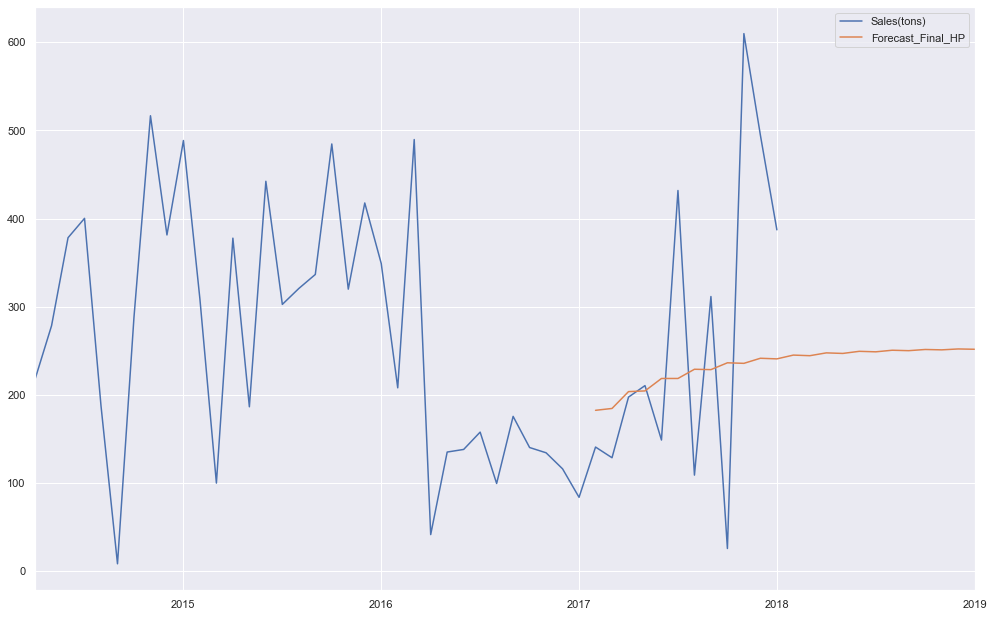

In [169]:
# Plotting the final forecasting

df_with_forecast_HP.plot(figsize=(15, 10));plt.show()

# ARIMA and SARIMA for HA

In [170]:
train_HA

Sales(tons)
DATE                   
2014-04-01   387.829286
2014-05-01   624.772895
2014-06-01  1555.764107
2014-07-01   993.040461
2014-08-01  1339.331625
2014-09-01  1645.627500
2014-10-01  2000.536071
2014-11-01  2196.385875
2014-12-01  1595.711813
2015-01-01  1600.985250
2015-02-01  1278.893571
2015-03-01  1532.540625
2015-04-01  1568.102143
2015-05-01  1785.338036
2015-06-01  2003.322375
2015-07-01  1658.670750
2015-08-01  1539.306964
2015-09-01  1640.168036
2015-10-01  3730.017857
2015-11-01  1947.858750
2015-12-01  1810.382143
2016-01-01  1046.415000
2016-02-01   914.247000
2016-03-01  1272.651429
2016-04-01   118.612390
2016-05-01   374.675325
2016-06-01   679.084859
2016-07-01   570.141269
2016-08-01   484.073654
2016-09-01   896.271000
2016-10-01   498.891660
2016-11-01   671.978348
2016-12-01   761.779442
2017-01-01   428.895000

In [171]:
test_HA

Sales(tons)
DATE                   
2017-02-01   335.354741
2017-03-01   605.702592
2017-04-01   141.363563
2017-05-01  1318.154464
2017-06-01  2250.231513
2017-07-01  1165.892143
2017-08-01   956.632500
2017-09-01  1222.170987
2017-10-01  1613.817321
2017-11-01  2544.181071
2017-12-01  2389.684821
2018-01-01  1733.121964

In [172]:
from pmdarima.arima import ARIMA

In [173]:
# d = 0 (since dataset is stationary), 12 = time period for seasonality

arimaModel_HA=ARIMA((1,0,1),(1,0,1,12)).fit(train_HA)

In [174]:
# Forecasting for the next 12 months using the trained arima model

Forecast_HA=pd.Series(arimaModel_HA.predict(12)).rename('Forecast_HA');Forecast_HA

2017-02-01     669.639041
2017-03-01     761.184880
2017-04-01     760.395243
2017-05-01     824.330867
2017-06-01     889.299351
2017-07-01     920.762321
2017-08-01     952.066591
2017-09-01     998.531604
2017-10-01     947.532686
2017-11-01    1020.123829
2017-12-01    1034.065497
2018-01-01    1046.414670
Freq: MS, Name: Forecast_HA, dtype: float64

In [175]:
# Creating a new dataframe, by concatenating the original HP dataset and the forecasted values above

Actual_Forecast_Df_HA=pd.concat([ABC_HA,Forecast_HA],axis=1);Actual_Forecast_Df_HA

Sales(tons)  Forecast_HA
2014-04-01   387.829286          NaN
2014-05-01   624.772895          NaN
2014-06-01  1555.764107          NaN
2014-07-01   993.040461          NaN
2014-08-01  1339.331625          NaN
2014-09-01  1645.627500          NaN
2014-10-01  2000.536071          NaN
2014-11-01  2196.385875          NaN
2014-12-01  1595.711813          NaN
2015-01-01  1600.985250          NaN
2015-02-01  1278.893571          NaN
2015-03-01  1532.540625          NaN
2015-04-01  1568.102143          NaN
2015-05-01  1785.338036          NaN
2015-06-01  2003.322375          NaN
2015-07-01  1658.670750          NaN
2015-08-01  1539.306964          NaN
2015-09-01  1640.168036          NaN
2015-10-01  3730.017857          NaN
2015-11-01  1947.858750          NaN
2015-12-01  1810.382143          NaN
2016-01-01  1046.415000          NaN
2016-02-01   914.247000          NaN
2016-03-01  1272.651429          NaN
2016-04-01   118.612390          NaN
2016-05-01   374.675325          NaN
2016-06-01   679.084859          NaN
2016-07-01   570.141269          NaN
2016-08-01   484.073654          NaN
2016-09-01   896.271000          NaN
2016-10-01   498.891660          NaN
2016-11-01   671.978348          NaN
2016-12-01   761.779442          NaN
2017-01-01   428.895000          NaN
2017-02-01   335.354741   669.639041
2017-03-01   605.702592   761.184880
2017-04-01   141.363563   760.395243
2017-05-01  1318.154464   824.330867
2017-06-01  2250.231513   889.299351
2017-07-01  1165.892143   920.762321
2017-08-01   956.632500   952.066591
2017-09-01  1222.170987   998.531604
2017-10-01  1613.817321   947.532686
2017-11-01  2544.181071  1020.123829
2017-12-01  2389.684821  1034.065497
2018-01-01  1733.121964  1046.414670

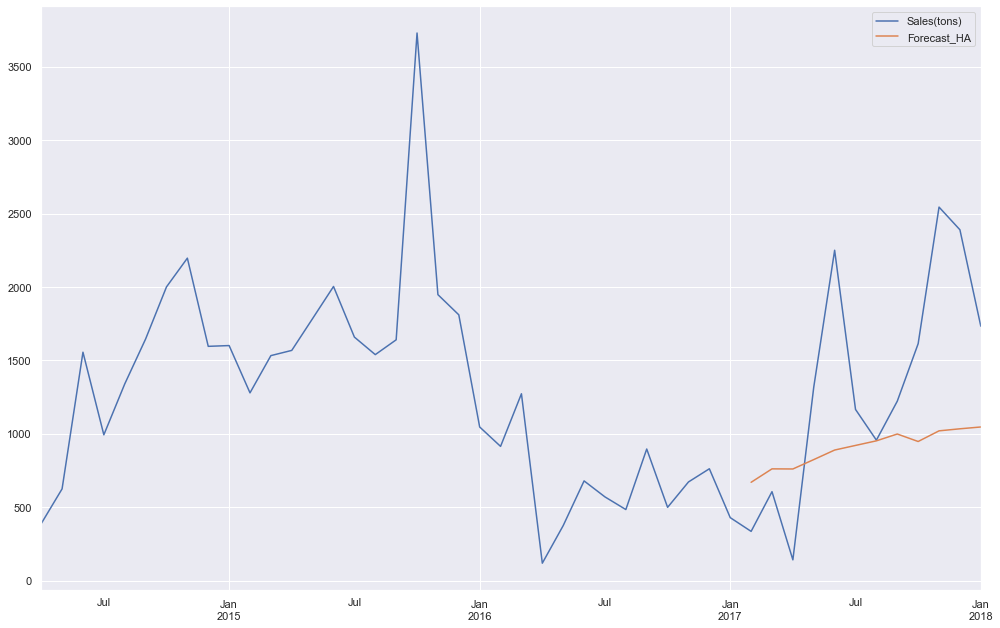

In [176]:
# Plotting the actual versus forecasted

Actual_Forecast_Df_HA.plot(figsize=(15, 10));plt.show()

In [177]:
# Checking the error (using negative indexing, separating the last 12 observations(forecasted values) and created a copy and stored as dataframe)

Validation_Df_HA=Actual_Forecast_Df_HA[-12:].copy()

#  MAPE (original - forecast/original)*100 (%)

np.mean(abs(Validation_Df_HA['Sales(tons)']-Validation_Df_HA['Forecast_HA'])/Validation_Df_HA['Sales(tons)'])*100

74.87793551478696

In [178]:
# RMSE ( root of mean of square of original - forecast)

np.sqrt(np.mean((Validation_Df_HA['Sales(tons)']-Validation_Df_HA['Forecast_HA'])**2))

806.2877617117191

In [179]:
from pmdarima import auto_arima

arimaModel_auto_HA=auto_arima(train_HA,m=12)

In [180]:
# p, d, q

arimaModel_auto_HA.get_params()['order']

(1, 0, 0)

In [181]:
# Seasonality (P, D, Q)

arimaModel_auto_HA.get_params()['seasonal_order']

(0, 0, 0, 12)

In [182]:
# Building a model using above parameters and fitting to our training dataset

arimaModel2_HA=ARIMA((1,0,0),(0,0,0,12)).fit(train_HA)

In [183]:
# Forecasting for next 12 months using above trained model

Forecast_Auto_HA=pd.Series(arimaModel2_HA.predict(12)).rename('Forecast_Auto_HA');Forecast_Auto_HA

2017-02-01     758.889180
2017-03-01     953.180351
2017-04-01    1067.573456
2017-05-01    1134.924857
2017-06-01    1174.579443
2017-07-01    1197.926933
2017-08-01    1211.673270
2017-09-01    1219.766722
2017-10-01    1224.531915
2017-11-01    1227.337526
2017-12-01    1228.989389
2018-01-01    1229.961959
Freq: MS, Name: Forecast_Auto_HA, dtype: float64

In [184]:
# Creating a new dataframe by concatenating above forecast and original HA dataset

Actual_Forecast_Df_HA=pd.concat([ABC_HA,Forecast_Auto_HA],axis=1);Actual_Forecast_Df_HA

Sales(tons)  Forecast_Auto_HA
2014-04-01   387.829286               NaN
2014-05-01   624.772895               NaN
2014-06-01  1555.764107               NaN
2014-07-01   993.040461               NaN
2014-08-01  1339.331625               NaN
2014-09-01  1645.627500               NaN
2014-10-01  2000.536071               NaN
2014-11-01  2196.385875               NaN
2014-12-01  1595.711813               NaN
2015-01-01  1600.985250               NaN
2015-02-01  1278.893571               NaN
2015-03-01  1532.540625               NaN
2015-04-01  1568.102143               NaN
2015-05-01  1785.338036               NaN
2015-06-01  2003.322375               NaN
2015-07-01  1658.670750               NaN
2015-08-01  1539.306964               NaN
2015-09-01  1640.168036               NaN
2015-10-01  3730.017857               NaN
2015-11-01  1947.858750               NaN
2015-12-01  1810.382143               NaN
2016-01-01  1046.415000               NaN
2016-02-01   914.247000               NaN
2016-03-01  1272.651429               NaN
2016-04-01   118.612390               NaN
2016-05-01   374.675325               NaN
2016-06-01   679.084859               NaN
2016-07-01   570.141269               NaN
2016-08-01   484.073654               NaN
2016-09-01   896.271000               NaN
2016-10-01   498.891660               NaN
2016-11-01   671.978348               NaN
2016-12-01   761.779442               NaN
2017-01-01   428.895000               NaN
2017-02-01   335.354741        758.889180
2017-03-01   605.702592        953.180351
2017-04-01   141.363563       1067.573456
2017-05-01  1318.154464       1134.924857
2017-06-01  2250.231513       1174.579443
2017-07-01  1165.892143       1197.926933
2017-08-01   956.632500       1211.673270
2017-09-01  1222.170987       1219.766722
2017-10-01  1613.817321       1224.531915
2017-11-01  2544.181071       1227.337526
2017-12-01  2389.684821       1228.989389
2018-01-01  1733.121964       1229.961959

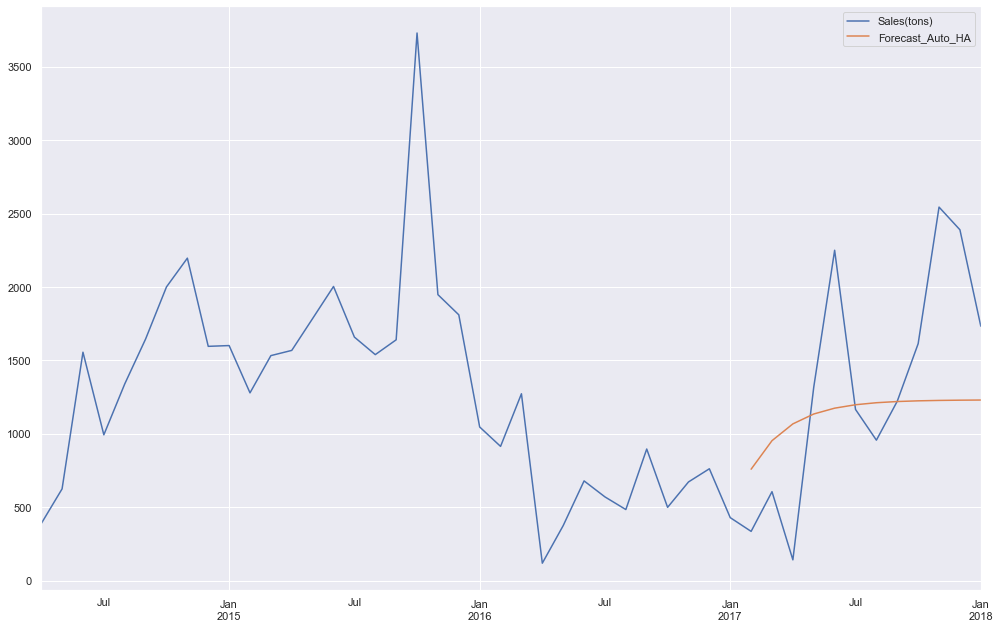

In [185]:
# Plotting the actual versus forecasted

Actual_Forecast_Df_HA.plot(figsize=(15, 10));plt.show()

In [186]:
# Checking the error (using negative indexing, separating the last 12 observations(forecasted values) and created a copy and stored as dataframe)

Validation_Df_HA=Actual_Forecast_Df_HA[-12:].copy()

#  MAPE (original - forecast/original)*100 (%)

np.mean(abs(Validation_Df_HA['Sales(tons)']-Validation_Df_HA['Forecast_Auto_HA'])/Validation_Df_HA['Sales(tons)'])*100

90.30419235444556

In [187]:
# RMSE ( root of mean of square of original - forecast)

np.sqrt(np.mean((Validation_Df_HA['Sales(tons)']-Validation_Df_HA['Forecast_Auto_HA'])**2))

701.2292289977378

In [188]:
arimaModel2_HA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   34
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -263.630
Date:                Sun, 12 Feb 2023   AIC                            533.261
Time:                        13:01:00   BIC                            537.840
Sample:                    04-01-2014   HQIC                           534.822
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    506.3680    242.659      2.087      0.037      30.766     981.970
ar.L1          0.5888      0.148      3.970      0.000       0.298       0.879
sigma2      3.085e+05   4.47e+04      6.908      0.000    2.21e+05    3.96e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                57.62
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             1.55
Prob(H) (two-sided):                  0.82   Kurtosis:                         8.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [189]:
from pmdarima.arima import ARIMA

In [190]:
# We are doing grid search to find the best optimized parameters to obtain the least MAPE and best fit for our time series model
# We are creating empty lists for each parameter, and using range means (n-1). For eg., if p = range (3), it means it uses values 0,1,2

p,d,q,P,D,Q=range(3),range(1),range(3),range(3),range(1),range(3)
pList,dList,qList,PList,DList,QList=[],[],[],[],[],[]

In [191]:
# For storing the MAPE values of the different model
mapeList=[]

In [192]:
for i in p:
    for j in d:
        for k in q:
            for l in P:
                for m in D:
                    for n in Q:
                        
                        print(i,j,k,l,m,n)
                        
                        temparima_model=ARIMA((i,j,k),(l,m,n,12)).fit(train_HA)
                        
                        Forecast=pd.Series(temparima_model.predict(12)).rename('Forecast')
                        Forecast.index=test_HA.index
                        Actual_Forecast_Df=pd.concat([ABC_HA,Forecast],axis=1)
                        Validation_df_HA=Actual_Forecast_Df[-12:].copy()
                        tempMAPE=np.mean(abs(Validation_df_HA['Sales(tons)']-Validation_df_HA['Forecast'])/Validation_df_HA['Sales(tons)'])*100
                        
                        pList.append(i)
                        dList.append(j)
                        qList.append(k)
                        PList.append(l)
                        DList.append(m)
                        QList.append(n)
                        mapeList.append(tempMAPE)
    

0 0 0 0 0 0
0 0 0 0 0 1
0 0 0 0 0 2
0 0 0 1 0 0
0 0 0 1 0 1
0 0 0 1 0 2
0 0 0 2 0 0
0 0 0 2 0 1
0 0 0 2 0 2
0 0 1 0 0 0
0 0 1 0 0 1
0 0 1 0 0 2
0 0 1 1 0 0
0 0 1 1 0 1
0 0 1 1 0 2
0 0 1 2 0 0
0 0 1 2 0 1
0 0 1 2 0 2
0 0 2 0 0 0
0 0 2 0 0 1
0 0 2 0 0 2
0 0 2 1 0 0
0 0 2 1 0 1
0 0 2 1 0 2
0 0 2 2 0 0
0 0 2 2 0 1
0 0 2 2 0 2
1 0 0 0 0 0
1 0 0 0 0 1
1 0 0 0 0 2
1 0 0 1 0 0
1 0 0 1 0 1
1 0 0 1 0 2
1 0 0 2 0 0
1 0 0 2 0 1
1 0 0 2 0 2
1 0 1 0 0 0
1 0 1 0 0 1
1 0 1 0 0 2
1 0 1 1 0 0
1 0 1 1 0 1
1 0 1 1 0 2
1 0 1 2 0 0
1 0 1 2 0 1
1 0 1 2 0 2
1 0 2 0 0 0
1 0 2 0 0 1
1 0 2 0 0 2
1 0 2 1 0 0
1 0 2 1 0 1
1 0 2 1 0 2
1 0 2 2 0 0
1 0 2 2 0 1
1 0 2 2 0 2
2 0 0 0 0 0
2 0 0 0 0 1
2 0 0 0 0 2
2 0 0 1 0 0
2 0 0 1 0 1
2 0 0 1 0 2
2 0 0 2 0 0
2 0 0 2 0 1
2 0 0 2 0 2
2 0 1 0 0 0
2 0 1 0 0 1
2 0 1 0 0 2
2 0 1 1 0 0
2 0 1 1 0 1
2 0 1 1 0 2
2 0 1 2 0 0
2 0 1 2 0 1
2 0 1 2 0 2
2 0 2 0 0 0
2 0 2 0 0 1
2 0 2 0 0 2
2 0 2 1 0 0
2 0 2 1 0 1
2 0 2 1 0 2
2 0 2 2 0 0
2 0 2 2 0 1
2 0 2 2 0 2


In [193]:
# We're creating a new dataframe, using the appended lists above (since lists are mutable)

arima_Eval_df_HA=pd.DataFrame({"p":pList,"d":dList,"q":qList,
                            "P":PList,"D":DList,"Q":QList,"MAPE":mapeList})

In [194]:
# Displaying the newly created dataframe

arima_Eval_df_HA

p  d  q  P  D  Q        MAPE
0   0  0  0  0  0  0  118.636218
1   0  0  0  0  0  1  130.388422
2   0  0  0  0  0  2  130.835109
3   0  0  0  1  0  0  117.464784
4   0  0  0  1  0  1  134.106782
.. .. .. .. .. .. ..         ...
76  2  0  2  1  0  1   74.797883
77  2  0  2  1  0  2   76.818929
78  2  0  2  2  0  0   77.459711
79  2  0  2  2  0  1   77.501412
80  2  0  2  2  0  2   71.217438

[81 rows x 7 columns]

In [195]:
# Searching for minimum MAPE

arima_Eval_df_HA['MAPE'].min()

71.21743838870692

In [196]:
# Searching for the parameters which gave the minimum MAPE

arima_Eval_df_HA[arima_Eval_df_HA['MAPE']==71.21743838870692]

p  d  q  P  D  Q       MAPE
80  2  0  2  2  0  2  71.217438

In [197]:
# Building the final SARIMA model

Final_arima_Model2_HA=ARIMA((2,0,2),(2,0,2,12)).fit(train_HA)

In [198]:
# Forecasting for next 24 months using the above trained model

Forecast_Final_HA=pd.Series(Final_arima_Model2_HA.predict(24)).rename('Forecast_Final_HA');Forecast_Final_HA

2017-02-01     631.620108
2017-03-01     803.856522
2017-04-01     845.770394
2017-05-01     991.271472
2017-06-01    1160.055905
2017-07-01    1091.813980
2017-08-01    1110.513597
2017-09-01    1198.949554
2017-10-01    1754.052985
2017-11-01    1337.266755
2017-12-01    1301.866957
2018-01-01    1108.824034
2018-02-01    1088.098639
2018-03-01    1212.720886
2018-04-01     951.272369
2018-05-01    1018.796054
2018-06-01    1019.345730
2018-07-01    1038.679187
2018-08-01     972.391840
2018-09-01    1065.849380
2018-10-01    1035.877952
2018-11-01     963.664941
2018-12-01    1054.178926
2019-01-01     917.494976
Freq: MS, Name: Forecast_Final_HA, dtype: float64

In [199]:
# Providing the index/dates for the forecasts to be done 2017 onwards

start="2017-02-01"
end="2019-01-01"

predixn_months_HA=pd.date_range(start,end,freq='MS')

Forecast_Final_HA.index=predixn_months_HA

Forecast_Final_HA

2017-02-01     631.620108
2017-03-01     803.856522
2017-04-01     845.770394
2017-05-01     991.271472
2017-06-01    1160.055905
2017-07-01    1091.813980
2017-08-01    1110.513597
2017-09-01    1198.949554
2017-10-01    1754.052985
2017-11-01    1337.266755
2017-12-01    1301.866957
2018-01-01    1108.824034
2018-02-01    1088.098639
2018-03-01    1212.720886
2018-04-01     951.272369
2018-05-01    1018.796054
2018-06-01    1019.345730
2018-07-01    1038.679187
2018-08-01     972.391840
2018-09-01    1065.849380
2018-10-01    1035.877952
2018-11-01     963.664941
2018-12-01    1054.178926
2019-01-01     917.494976
Freq: MS, Name: Forecast_Final_HA, dtype: float64

In [200]:
# Creating a newly concatenated dataframe of original ABC_HP and final forecast model

df_with_forecast_HA=pd.concat([ABC_HA,Forecast_Final_HA],axis=1);df_with_forecast_HA

Sales(tons)  Forecast_Final_HA
2014-04-01   387.829286                NaN
2014-05-01   624.772895                NaN
2014-06-01  1555.764107                NaN
2014-07-01   993.040461                NaN
2014-08-01  1339.331625                NaN
2014-09-01  1645.627500                NaN
2014-10-01  2000.536071                NaN
2014-11-01  2196.385875                NaN
2014-12-01  1595.711813                NaN
2015-01-01  1600.985250                NaN
2015-02-01  1278.893571                NaN
2015-03-01  1532.540625                NaN
2015-04-01  1568.102143                NaN
2015-05-01  1785.338036                NaN
2015-06-01  2003.322375                NaN
2015-07-01  1658.670750                NaN
2015-08-01  1539.306964                NaN
2015-09-01  1640.168036                NaN
2015-10-01  3730.017857                NaN
2015-11-01  1947.858750                NaN
2015-12-01  1810.382143                NaN
2016-01-01  1046.415000                NaN
2016-02-01   914.247000                NaN
2016-03-01  1272.651429                NaN
2016-04-01   118.612390                NaN
2016-05-01   374.675325                NaN
2016-06-01   679.084859                NaN
2016-07-01   570.141269                NaN
2016-08-01   484.073654                NaN
2016-09-01   896.271000                NaN
2016-10-01   498.891660                NaN
2016-11-01   671.978348                NaN
2016-12-01   761.779442                NaN
2017-01-01   428.895000                NaN
2017-02-01   335.354741         631.620108
2017-03-01   605.702592         803.856522
2017-04-01   141.363563         845.770394
2017-05-01  1318.154464         991.271472
2017-06-01  2250.231513        1160.055905
2017-07-01  1165.892143        1091.813980
2017-08-01   956.632500        1110.513597
2017-09-01  1222.170987        1198.949554
2017-10-01  1613.817321        1754.052985
2017-11-01  2544.181071        1337.266755
2017-12-01  2389.684821        1301.866957
2018-01-01  1733.121964        1108.824034
2018-02-01          NaN        1088.098639
2018-03-01          NaN        1212.720886
2018-04-01          NaN         951.272369
2018-05-01          NaN        1018.796054
2018-06-01          NaN        1019.345730
2018-07-01          NaN        1038.679187
2018-08-01          NaN         972.391840
2018-09-01          NaN        1065.849380
2018-10-01          NaN        1035.877952
2018-11-01          NaN         963.664941
2018-12-01          NaN        1054.178926
2019-01-01          NaN         917.494976

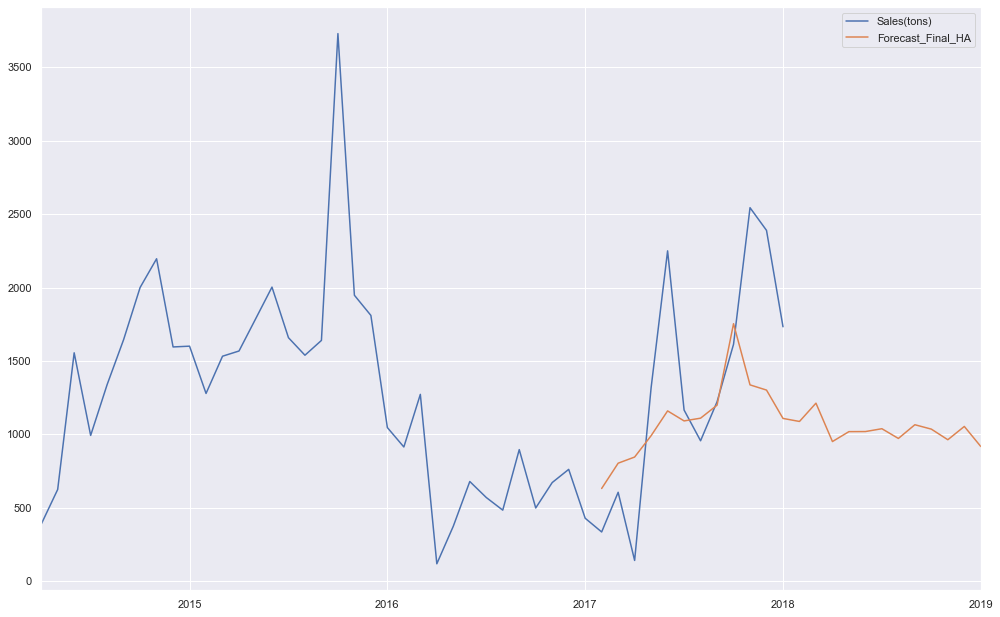

In [201]:
# Plotting the final forecasting

df_with_forecast_HA.plot(figsize=(15, 10));plt.show()

# ARIMA and SARIMA for UT

In [202]:
train_UT

Sales(tons)
DATE                   
2014-04-01  1049.397187
2014-05-01   713.480625
2014-06-01  1207.712813
2014-07-01  1253.363365
2014-08-01   684.125481
2014-09-01   787.587404
2014-10-01   770.273654
2014-11-01  1230.454904
2014-12-01   981.230625
2015-01-01   794.576250
2015-02-01   994.902187
2015-03-01  1125.859500
2015-04-01   917.746875
2015-05-01  1345.011136
2015-06-01  1358.988750
2015-07-01  1418.570795
2015-08-01   737.928409
2015-09-01   902.347500
2015-10-01  1142.476875
2015-11-01  1254.677727
2015-12-01  1020.119063
2016-01-01  1111.353750
2016-02-01   830.739375
2016-03-01  1126.196250
2016-04-01  1398.155625
2016-05-01  1477.495227
2016-06-01   982.082812
2016-07-01  1156.410000
2016-08-01   916.039432
2016-09-01   886.286250
2016-10-01   599.065313
2016-11-01  1565.392500
2016-12-01  1382.633438
2017-01-01   676.537159

In [203]:
test_UT

Sales(tons)
DATE                   
2017-02-01   584.979545
2017-03-01   891.149063
2017-04-01   804.850714
2017-05-01   955.569886
2017-06-01  1409.762813
2017-07-01  1065.879000
2017-08-01   871.495875
2017-09-01   436.002187
2017-10-01   927.842727
2017-11-01  1163.289375
2017-12-01  1428.468750
2018-01-01  1081.715625

In [204]:
from pmdarima.arima import ARIMA

In [205]:
# d = 0 (since dataset is stationary), 12 = time period for seasonality

arimaModel_UT=ARIMA((1,0,1),(1,0,1,12)).fit(train_UT)

In [206]:
# Forecasting for the next 12 months using the trained arima model

Forecast_UT=pd.Series(arimaModel_UT.predict(12)).rename('Forecast_UT');Forecast_UT

2017-02-01     958.748269
2017-03-01    1084.909292
2017-04-01    1134.578899
2017-05-01    1150.573517
2017-06-01    1017.339940
2017-07-01    1064.306555
2017-08-01    1024.355071
2017-09-01    1011.739936
2017-10-01     927.118295
2017-11-01    1175.086888
2017-12-01    1135.790503
2018-01-01     948.756063
Freq: MS, Name: Forecast_UT, dtype: float64

In [207]:
# Creating a new dataframe, by concatenating the original HP dataset and the forecasted values above

Actual_Forecast_Df_UT=pd.concat([ABC_UT,Forecast_UT],axis=1);Actual_Forecast_Df_UT

Sales(tons)  Forecast_UT
2014-04-01  1049.397187          NaN
2014-05-01   713.480625          NaN
2014-06-01  1207.712813          NaN
2014-07-01  1253.363365          NaN
2014-08-01   684.125481          NaN
2014-09-01   787.587404          NaN
2014-10-01   770.273654          NaN
2014-11-01  1230.454904          NaN
2014-12-01   981.230625          NaN
2015-01-01   794.576250          NaN
2015-02-01   994.902187          NaN
2015-03-01  1125.859500          NaN
2015-04-01   917.746875          NaN
2015-05-01  1345.011136          NaN
2015-06-01  1358.988750          NaN
2015-07-01  1418.570795          NaN
2015-08-01   737.928409          NaN
2015-09-01   902.347500          NaN
2015-10-01  1142.476875          NaN
2015-11-01  1254.677727          NaN
2015-12-01  1020.119063          NaN
2016-01-01  1111.353750          NaN
2016-02-01   830.739375          NaN
2016-03-01  1126.196250          NaN
2016-04-01  1398.155625          NaN
2016-05-01  1477.495227          NaN
2016-06-01   982.082812          NaN
2016-07-01  1156.410000          NaN
2016-08-01   916.039432          NaN
2016-09-01   886.286250          NaN
2016-10-01   599.065313          NaN
2016-11-01  1565.392500          NaN
2016-12-01  1382.633438          NaN
2017-01-01   676.537159          NaN
2017-02-01   584.979545   958.748269
2017-03-01   891.149063  1084.909292
2017-04-01   804.850714  1134.578899
2017-05-01   955.569886  1150.573517
2017-06-01  1409.762813  1017.339940
2017-07-01  1065.879000  1064.306555
2017-08-01   871.495875  1024.355071
2017-09-01   436.002187  1011.739936
2017-10-01   927.842727   927.118295
2017-11-01  1163.289375  1175.086888
2017-12-01  1428.468750  1135.790503
2018-01-01  1081.715625   948.756063

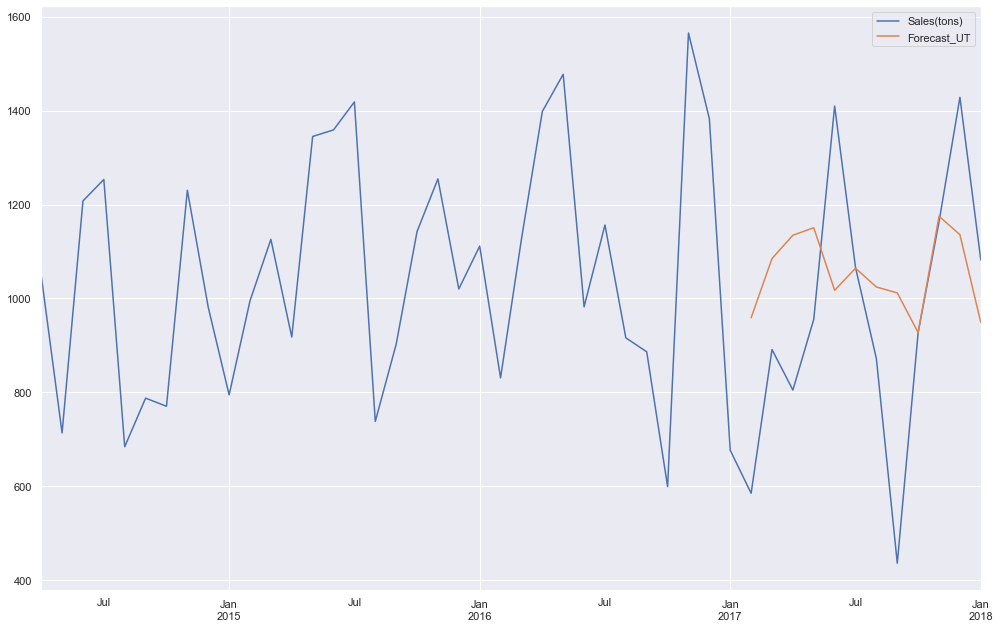

In [208]:
# Plotting the actual versus forecasted

Actual_Forecast_Df_UT.plot(figsize=(15, 10));plt.show()

In [209]:
# Checking the error (using negative indexing, separating the last 12 observations(forecasted values) and created a copy and stored as dataframe)

Validation_Df_UT=Actual_Forecast_Df_UT[-12:].copy()

#  MAPE (original - forecast/original)*100 (%)

np.mean(abs(Validation_Df_UT['Sales(tons)']-Validation_Df_UT['Forecast_UT'])/Validation_Df_UT['Sales(tons)'])*100

29.871435002705798

In [210]:
# RMSE ( root of mean of square of original - forecast)

np.sqrt(np.mean((Validation_Df_UT['Sales(tons)']-Validation_Df_UT['Forecast_UT'])**2))

279.33100971114345

In [211]:
from pmdarima import auto_arima

arimaModel_auto_UT=auto_arima(train_UT,m=12)

In [212]:
# p, d, q

arimaModel_auto_UT.get_params()['order']

(2, 1, 1)

In [213]:
# Seasonality (P, D, Q)

arimaModel_auto_UT.get_params()['seasonal_order']

(0, 1, 0, 12)

In [214]:
# Building a model using above parameters and fitting to our training dataset

arimaModel2_UT=ARIMA((2,1,1),(0,1,0,12)).fit(train_UT)

In [215]:
# Forecasting for next 12 months using above trained model

Forecast_Auto_UT=pd.Series(arimaModel2_UT.predict(12)).rename('Forecast_Auto_UT');Forecast_Auto_UT

2017-02-01     508.046219
2017-03-01    1306.053945
2017-04-01    1298.901461
2017-05-01    1077.622266
2017-06-01     849.514396
2017-07-01    1118.683231
2017-08-01     622.752838
2017-09-01     577.101912
2017-10-01     446.090176
2017-11-01    1339.739484
2017-12-01    1036.549096
2018-01-01     390.036573
Freq: MS, Name: Forecast_Auto_UT, dtype: float64

In [216]:
# Creating a new dataframe by concatenating above forecast and original HA dataset

Actual_Forecast_Df_UT=pd.concat([ABC_UT,Forecast_Auto_UT],axis=1);Actual_Forecast_Df_UT

Sales(tons)  Forecast_Auto_UT
2014-04-01  1049.397187               NaN
2014-05-01   713.480625               NaN
2014-06-01  1207.712813               NaN
2014-07-01  1253.363365               NaN
2014-08-01   684.125481               NaN
2014-09-01   787.587404               NaN
2014-10-01   770.273654               NaN
2014-11-01  1230.454904               NaN
2014-12-01   981.230625               NaN
2015-01-01   794.576250               NaN
2015-02-01   994.902187               NaN
2015-03-01  1125.859500               NaN
2015-04-01   917.746875               NaN
2015-05-01  1345.011136               NaN
2015-06-01  1358.988750               NaN
2015-07-01  1418.570795               NaN
2015-08-01   737.928409               NaN
2015-09-01   902.347500               NaN
2015-10-01  1142.476875               NaN
2015-11-01  1254.677727               NaN
2015-12-01  1020.119063               NaN
2016-01-01  1111.353750               NaN
2016-02-01   830.739375               NaN
2016-03-01  1126.196250               NaN
2016-04-01  1398.155625               NaN
2016-05-01  1477.495227               NaN
2016-06-01   982.082812               NaN
2016-07-01  1156.410000               NaN
2016-08-01   916.039432               NaN
2016-09-01   886.286250               NaN
2016-10-01   599.065313               NaN
2016-11-01  1565.392500               NaN
2016-12-01  1382.633438               NaN
2017-01-01   676.537159               NaN
2017-02-01   584.979545        508.046219
2017-03-01   891.149063       1306.053945
2017-04-01   804.850714       1298.901461
2017-05-01   955.569886       1077.622266
2017-06-01  1409.762813        849.514396
2017-07-01  1065.879000       1118.683231
2017-08-01   871.495875        622.752838
2017-09-01   436.002187        577.101912
2017-10-01   927.842727        446.090176
2017-11-01  1163.289375       1339.739484
2017-12-01  1428.468750       1036.549096
2018-01-01  1081.715625        390.036573

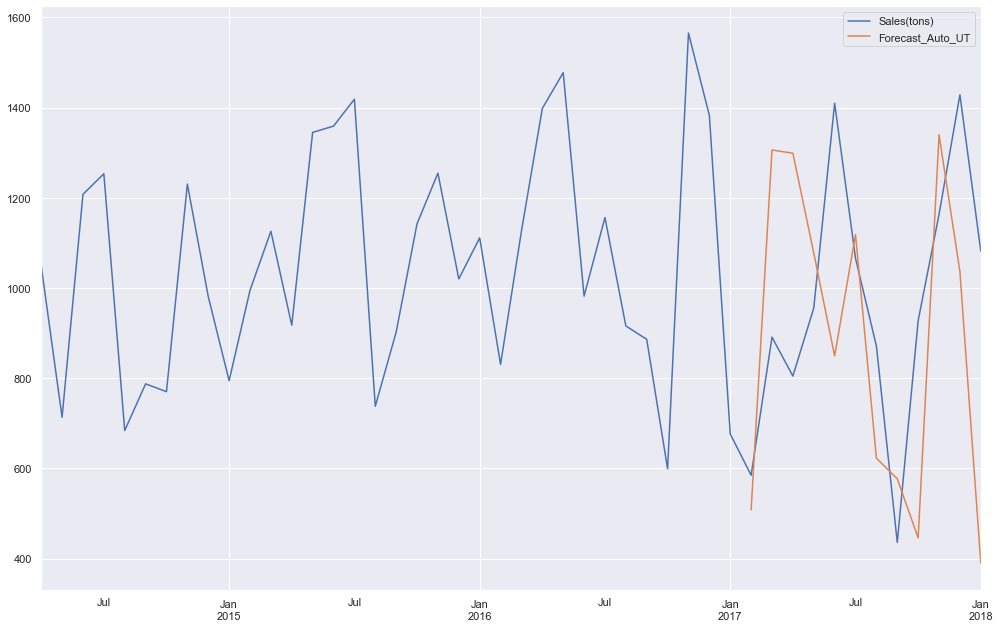

In [217]:
# Plotting the actual versus forecasted

Actual_Forecast_Df_UT.plot(figsize=(15, 10));plt.show()

In [218]:
# Checking the error (using negative indexing, separating the last 12 observations(forecasted values) and created a copy and stored as dataframe)

Validation_Df_UT=Actual_Forecast_Df_UT[-12:].copy()

# MAPE (original - forecast/original)*100 (%)

np.mean(abs(Validation_Df_UT['Sales(tons)']-Validation_Df_UT['Forecast_Auto_UT'])/Validation_Df_UT['Sales(tons)'])*100

33.1612318076506

In [219]:
# RMSE ( root of mean of square of original - forecast)

np.sqrt(np.mean((Validation_Df_UT['Sales(tons)']-Validation_Df_UT['Forecast_Auto_UT'])**2))

379.77379394271776

In [220]:
arimaModel2_UT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   34
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -143.434
Date:                             Sun, 12 Feb 2023   AIC                            296.867
Time:                                     13:01:31   BIC                            302.090
Sample:                                 04-01-2014   HQIC                           298.000
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -32.4032     12.570     -2.578      0.010     -57.039      -7.767
ar.L1         -0.3308      0.169     -1.954      0.051      -0.663       0.001
ar.L2         -0.7175      0.176     -4.065      0.000      -1.063      -0.372
ma.L1         -0.9994     36.763     -0.027      0.978     -73.054      71.055
sigma2      3.875e+04   1.43e+06      0.027      0.978   -2.76e+06    2.83e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.86   Prob(JB):                         0.55
Heteroskedasticity (H):               1.34   Skew:                            -0.11
Prob(H) (two-sided):                  0.71   Kurtosis:                         1.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [221]:
from pmdarima.arima import ARIMA

In [222]:
# We are doing grid search to find the best optimized parameters to obtain the least MAPE and best fit for our time series model
# We are creating empty lists for each parameter, and using range means (n-1). For eg., if p = range (3), it means it uses values 0,1,2

p,d,q,P,D,Q=range(3),range(1),range(3),range(3),range(1),range(3)
pList,dList,qList,PList,DList,QList=[],[],[],[],[],[]

In [223]:
# For storing the MAPE values of the different model
mapeList=[]

In [224]:
for i in p:
    for j in d:
        for k in q:
            for l in P:
                for m in D:
                    for n in Q:
                        
                        print(i,j,k,l,m,n)
                        
                        temparima_model=ARIMA((i,j,k),(l,m,n,12)).fit(train_UT)
                        
                        Forecast=pd.Series(temparima_model.predict(12)).rename('Forecast')
                        Forecast.index=test_UT.index
                        Actual_Forecast_Df=pd.concat([ABC_UT,Forecast],axis=1)
                        Validation_df_UT=Actual_Forecast_Df[-12:].copy()
                        tempMAPE=np.mean(abs(Validation_df_UT['Sales(tons)']-Validation_df_UT['Forecast'])/Validation_df_UT['Sales(tons)'])*100
                        
                        pList.append(i)
                        dList.append(j)
                        qList.append(k)
                        PList.append(l)
                        DList.append(m)
                        QList.append(n)
                        mapeList.append(tempMAPE)
    

0 0 0 0 0 0
0 0 0 0 0 1
0 0 0 0 0 2
0 0 0 1 0 0
0 0 0 1 0 1
0 0 0 1 0 2
0 0 0 2 0 0
0 0 0 2 0 1
0 0 0 2 0 2
0 0 1 0 0 0
0 0 1 0 0 1
0 0 1 0 0 2
0 0 1 1 0 0
0 0 1 1 0 1
0 0 1 1 0 2
0 0 1 2 0 0
0 0 1 2 0 1
0 0 1 2 0 2
0 0 2 0 0 0
0 0 2 0 0 1
0 0 2 0 0 2
0 0 2 1 0 0
0 0 2 1 0 1
0 0 2 1 0 2
0 0 2 2 0 0
0 0 2 2 0 1
0 0 2 2 0 2
1 0 0 0 0 0
1 0 0 0 0 1
1 0 0 0 0 2
1 0 0 1 0 0
1 0 0 1 0 1
1 0 0 1 0 2
1 0 0 2 0 0
1 0 0 2 0 1
1 0 0 2 0 2
1 0 1 0 0 0
1 0 1 0 0 1
1 0 1 0 0 2
1 0 1 1 0 0
1 0 1 1 0 1
1 0 1 1 0 2
1 0 1 2 0 0
1 0 1 2 0 1
1 0 1 2 0 2
1 0 2 0 0 0
1 0 2 0 0 1
1 0 2 0 0 2
1 0 2 1 0 0
1 0 2 1 0 1
1 0 2 1 0 2
1 0 2 2 0 0
1 0 2 2 0 1
1 0 2 2 0 2
2 0 0 0 0 0
2 0 0 0 0 1
2 0 0 0 0 2
2 0 0 1 0 0
2 0 0 1 0 1
2 0 0 1 0 2
2 0 0 2 0 0
2 0 0 2 0 1
2 0 0 2 0 2
2 0 1 0 0 0
2 0 1 0 0 1
2 0 1 0 0 2
2 0 1 1 0 0
2 0 1 1 0 1
2 0 1 1 0 2
2 0 1 2 0 0
2 0 1 2 0 1
2 0 1 2 0 2
2 0 2 0 0 0
2 0 2 0 0 1
2 0 2 0 0 2
2 0 2 1 0 0
2 0 2 1 0 1
2 0 2 1 0 2
2 0 2 2 0 0
2 0 2 2 0 1
2 0 2 2 0 2


In [225]:
# We're creating a new dataframe, using the appended lists above (since lists are mutable)

arima_Eval_df_UT=pd.DataFrame({"p":pList,"d":dList,"q":qList,
                            "P":PList,"D":DList,"Q":QList,"MAPE":mapeList})

In [226]:
# Displaying the newly created dataframe

arima_Eval_df_UT

p  d  q  P  D  Q       MAPE
0   0  0  0  0  0  0  31.659534
1   0  0  0  0  0  1  30.230374
2   0  0  0  0  0  2  31.393449
3   0  0  0  1  0  0  32.051856
4   0  0  0  1  0  1  30.319960
.. .. .. .. .. .. ..        ...
76  2  0  2  1  0  1  28.740901
77  2  0  2  1  0  2  28.084101
78  2  0  2  2  0  0  28.384566
79  2  0  2  2  0  1  29.165157
80  2  0  2  2  0  2  28.064915

[81 rows x 7 columns]

In [227]:
# Searching for minimum MAPE

arima_Eval_df_UT['MAPE'].min()

28.06491542339728

In [228]:
# Searching for the parameters which gave the minimum MAPE

arima_Eval_df_UT[arima_Eval_df_UT['MAPE']==28.06491542339728]

p  d  q  P  D  Q       MAPE
80  2  0  2  2  0  2  28.064915

In [229]:
# Building the final SARIMA model

Final_arima_Model2_UT=ARIMA((2,0,2),(2,0,2,12)).fit(train_UT)

In [230]:
# Forecasting for next 24 months using the above trained model

Forecast_Final_UT=pd.Series(Final_arima_Model2_UT.predict(24)).rename('Forecast_Final_UT');Forecast_Final_UT

2017-02-01     756.757314
2017-03-01    1288.024257
2017-04-01    1205.070907
2017-05-01     984.968778
2017-06-01    1130.767066
2017-07-01    1314.302351
2017-08-01     834.655346
2017-09-01     901.620982
2017-10-01    1099.440555
2017-11-01    1208.703762
2017-12-01    1006.839744
2018-01-01    1037.962143
2018-02-01    1004.594146
2018-03-01    1028.626164
2018-04-01    1146.728631
2018-05-01    1190.417386
2018-06-01    1021.482658
2018-07-01    1091.372803
2018-08-01    1028.914045
2018-09-01     989.171178
2018-10-01     920.533635
2018-11-01    1208.771471
2018-12-01    1135.468336
2019-01-01     937.989006
Freq: MS, Name: Forecast_Final_UT, dtype: float64

In [231]:
# Providing the index/dates for the forecasts to be done 2017 onwards

start="2017-02-01"
end="2019-01-01"

predixn_months_UT=pd.date_range(start,end,freq='MS')

Forecast_Final_UT.index=predixn_months_UT

Forecast_Final_UT

2017-02-01     756.757314
2017-03-01    1288.024257
2017-04-01    1205.070907
2017-05-01     984.968778
2017-06-01    1130.767066
2017-07-01    1314.302351
2017-08-01     834.655346
2017-09-01     901.620982
2017-10-01    1099.440555
2017-11-01    1208.703762
2017-12-01    1006.839744
2018-01-01    1037.962143
2018-02-01    1004.594146
2018-03-01    1028.626164
2018-04-01    1146.728631
2018-05-01    1190.417386
2018-06-01    1021.482658
2018-07-01    1091.372803
2018-08-01    1028.914045
2018-09-01     989.171178
2018-10-01     920.533635
2018-11-01    1208.771471
2018-12-01    1135.468336
2019-01-01     937.989006
Freq: MS, Name: Forecast_Final_UT, dtype: float64

In [232]:
# Creating a newly concatenated dataframe of original ABC_HP and final forecast model

df_with_forecast_UT=pd.concat([ABC_UT,Forecast_Final_UT],axis=1);df_with_forecast_UT

Sales(tons)  Forecast_Final_UT
2014-04-01  1049.397187                NaN
2014-05-01   713.480625                NaN
2014-06-01  1207.712813                NaN
2014-07-01  1253.363365                NaN
2014-08-01   684.125481                NaN
2014-09-01   787.587404                NaN
2014-10-01   770.273654                NaN
2014-11-01  1230.454904                NaN
2014-12-01   981.230625                NaN
2015-01-01   794.576250                NaN
2015-02-01   994.902187                NaN
2015-03-01  1125.859500                NaN
2015-04-01   917.746875                NaN
2015-05-01  1345.011136                NaN
2015-06-01  1358.988750                NaN
2015-07-01  1418.570795                NaN
2015-08-01   737.928409                NaN
2015-09-01   902.347500                NaN
2015-10-01  1142.476875                NaN
2015-11-01  1254.677727                NaN
2015-12-01  1020.119063                NaN
2016-01-01  1111.353750                NaN
2016-02-01   830.739375                NaN
2016-03-01  1126.196250                NaN
2016-04-01  1398.155625                NaN
2016-05-01  1477.495227                NaN
2016-06-01   982.082812                NaN
2016-07-01  1156.410000                NaN
2016-08-01   916.039432                NaN
2016-09-01   886.286250                NaN
2016-10-01   599.065313                NaN
2016-11-01  1565.392500                NaN
2016-12-01  1382.633438                NaN
2017-01-01   676.537159                NaN
2017-02-01   584.979545         756.757314
2017-03-01   891.149063        1288.024257
2017-04-01   804.850714        1205.070907
2017-05-01   955.569886         984.968778
2017-06-01  1409.762813        1130.767066
2017-07-01  1065.879000        1314.302351
2017-08-01   871.495875         834.655346
2017-09-01   436.002187         901.620982
2017-10-01   927.842727        1099.440555
2017-11-01  1163.289375        1208.703762
2017-12-01  1428.468750        1006.839744
2018-01-01  1081.715625        1037.962143
2018-02-01          NaN        1004.594146
2018-03-01          NaN        1028.626164
2018-04-01          NaN        1146.728631
2018-05-01          NaN        1190.417386
2018-06-01          NaN        1021.482658
2018-07-01          NaN        1091.372803
2018-08-01          NaN        1028.914045
2018-09-01          NaN         989.171178
2018-10-01          NaN         920.533635
2018-11-01          NaN        1208.771471
2018-12-01          NaN        1135.468336
2019-01-01          NaN         937.989006

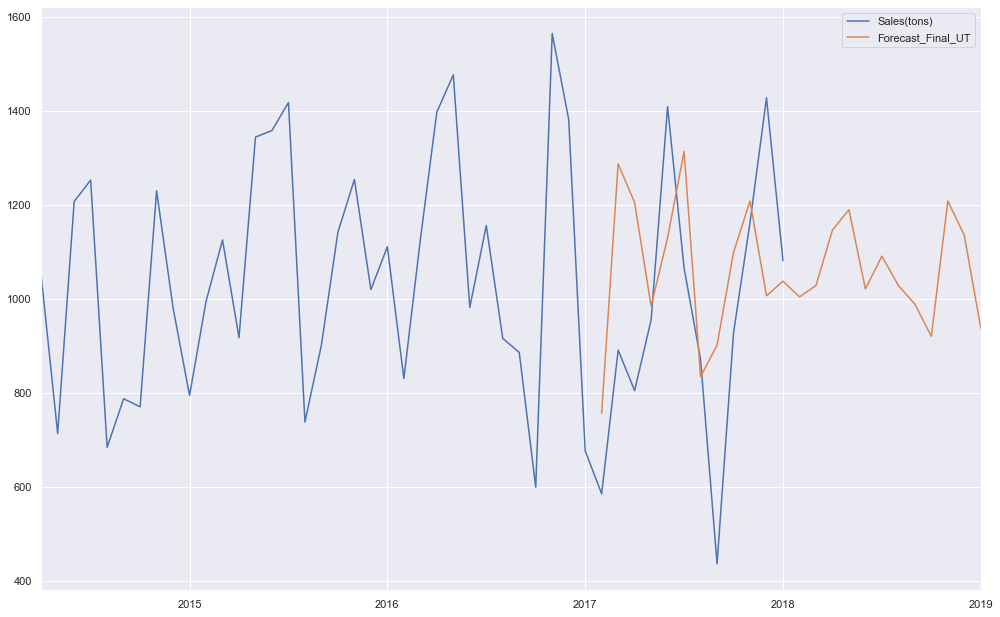

In [233]:
# Plotting the final forecasting

df_with_forecast_UT.plot(figsize=(15, 10));plt.show()

# Observations